# Setup

In [261]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run experiments

In [576]:
base_exp_info = {
    'EXPERIMENT_NAME': 'conf_matrix_feat_exp_162',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
#         'Acc',
#         'DemPar',
#         'EqOpp',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
        'FPR_Z0',
        'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
    ],
    
    # Expert demo parameters
    'DATASET': 'COMPAS',
    'TARGET_DATASET': 'Adult',
    'N_EXPERT_DEMOS': 5,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 20_000,
    'MIN_FREQ_FILL_PCT': .02,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .02,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#             'Dummy',
#         'DummyNoisy',
    ],
}

In [590]:
base_exp_info['N_TRIALS'] = 25
# base_exp_info['EPSILON'] = .06
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .12
base_exp_info['IGNORE_RESULTS_EPSILON'] = .12
base_exp_info['MAX_ITER'] = 30
base_exp_info['ALLOW_NEG_WEIGHTS'] = False
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = False
base_exp_info['IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS'] = True
base_exp_info['IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS'] = False

In [591]:
experiments = [
    {
        'EXPERT_ALGO': 'OptAcc',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtDemPar',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtEqOpp',
        'IRL_METHOD': 'FairIRL',
    },
]

In [592]:
# for exp_i, experiment in enumerate(experiments):
#     logging.info('\n\n')
#     logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
#     exp_info = dict(base_exp_info)
    
#     for k in experiment:
#         exp_info[k] = experiment[k]
        
#     run_experiment(exp_info)

In [593]:
exp_info = dict(base_exp_info)

In [594]:
source_X, source_y, source_feature_types = generate_dataset(
    exp_info['DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)
    
target_X, target_y, target_feature_types = generate_dataset(
    exp_info['TARGET_DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)

for f in source_feature_types['categoric']:
    source_X[f] = source_X[f].astype(str)
    
for f in target_feature_types['categoric']:
    target_X[f] = target_X[f].astype(str)

for exp_i, experiment in enumerate(experiments):
    logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    run_experiment(
        exp_info,
        source_X=source_X,
        source_y=source_y,
        source_feature_types=source_feature_types,
        target_X=target_X,
        target_y=target_y,
        target_feature_types=target_feature_types,
    )

INFO:root:


INFO:root:EXPERIMENT 1/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_162', 'FEAT_EXP_OBJECTIVE_NAMES': ['TPR_Z0', 'TPR_Z1', 'TNR_Z0', 'TNR_Z1', 'FPR_Z0', 'FPR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 5, 'EXPERT_ALGO': 'OptAcc', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.02, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 1, 'NON_EXPERT_ALGOS': ['OptAccNoisy'], 'N_TRIALS': 25, 'EPSILON': 0.12, 'IGNORE_RESULTS_EPSILON': 0.12, 'MAX_ITER': 30, 'ALLOW_NEG_WEIGHTS': False, 'DOT_WEIGHTS_FEAT_EXP': False, 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': True, 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.68607069 0.40340909 0.55063291 0.81784387 0.55063291 0.81784387]
 [0.70612245 0.3804878  0.51843318 0.82656827 0.51843318 0.82656827]
 [0.75536481 0.41037736 0.5

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.686,0.403,0.551,0.818,0.551,0.818,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.706,0.380,0.518,0.827,0.518,0.827,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.755,0.410,0.525,0.801,0.525,0.801,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.739,0.361,0.511,0.815,0.511,0.815,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.727,0.458,0.524,0.777,0.524,0.777,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.702,0.371,0.557,0.817,0.557,0.817,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.997,0.998,0.002,0.001,0.002,0.001,0,0.997,0.995,0.995,0.998,1.000,1.000,0.002,0.003,0.003,0.001,0.005,0.005,0.002,0.003,0.003,0.001,0.005,0.005,0.476,0.998,0.995,0.0,1.0,-0.075,0.394,-0.263,-0.003,-0.263,-0.003,0.602,0.575,0.0,0.0
7,0.436,0.248,0.777,0.914,0.777,0.914,0,0.436,0.425,0.425,0.248,0.296,0.296,0.777,0.763,0.763,0.914,0.888,0.888,0.777,0.763,0.763,0.914,0.888,0.888,0.607,0.861,0.871,0.0,2.0,0.000,0.325,0.000,0.337,0.000,0.337,0.193,0.179,0.0,0.0
8,0.499,0.248,0.731,0.914,0.731,0.914,0,0.499,0.475,0.475,0.248,0.296,0.296,0.731,0.719,0.719,0.914,0.888,0.888,0.731,0.719,0.719,0.914,0.888,0.888,0.609,0.814,0.821,0.0,3.0,0.000,0.325,0.000,0.337,0.000,0.337,0.163,0.157,0.0,0.0
9,0.595,0.248,0.654,0.914,0.654,0.914,0,0.595,0.580,0.580,0.248,0.296,0.296,0.654,0.658,0.658,0.914,0.888,0.888,0.654,0.658,0.658,0.914,0.888,0.888,0.623,0.731,0.716,0.0,4.0,0.000,0.325,0.000,0.337,0.000,0.337,0.119,0.127,0.0,0.0


INFO:root:muE_target:
[[0.48148148 0.46046512 0.84337349 0.85863874 0.84337349 0.85863874]
 [0.28571429 0.41346154 0.94594595 0.88613861 0.94594595 0.88613861]
 [0.33333333 0.38636364 0.83823529 0.85390428 0.83823529 0.85390428]
 [0.1        0.41293532 0.95294118 0.845      0.95294118 0.845     ]
 [0.44       0.52232143 0.93684211 0.88674033 0.93684211 0.88674033]]
INFO:root:target domain muL = [0.544 0.453 0.849 0.89  0.849 0.89 ]
INFO:root:target domain muE = [0.328 0.439 0.903 0.866 0.903 0.866]
INFO:root:target domain muL_hold = [0.42  0.439 0.839 0.877 0.839 0.877]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.77066116 0.4787234  0.50533049 0.8030888  0.50533049 0.8030888 ]
 [0.73304158 0.47252747 0.48043478 0.71428571 0.48043478 0.71428571]
 [0.72222222 0.41414141 0.55133929 0.77272727 0.55133929 0.77272727]
 [0.70515464 0.45505618 0.51585624 0.87452471 0.51585624 0.87452471]
 [0.74849095 0.44292237 0.52928416 0.82882883 0.52928416 0.82882883]]
INFO:root:muE_hold:
[[0.68325792 0.54    

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.771,0.479,0.505,0.803,0.505,0.803,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.733,0.473,0.480,0.714,0.480,0.714,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.722,0.414,0.551,0.773,0.551,0.773,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.705,0.455,0.516,0.875,0.516,0.875,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.748,0.443,0.529,0.829,0.529,0.829,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.720,0.542,0.509,0.687,0.509,0.687,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.997,0.000,0.000,1.000,0.000,1.000,0,0.997,0.998,0.998,0.000,0.000,0.000,0.000,0.005,0.005,1.000,1.000,1.000,0.000,0.005,0.005,1.000,1.000,1.000,0.529,0.004,0.002,0.0,1.0,0.068,-0.361,-0.146,0.139,-0.146,0.139,0.365,0.396,0.0,0.0
7,0.004,0.002,1.000,1.000,1.000,1.000,0,0.997,0.004,0.998,0.000,0.006,0.000,0.000,0.997,0.005,1.000,1.000,1.000,0.000,0.997,0.005,1.000,1.000,1.000,0.529,0.004,0.002,0.0,2.0,0.000,0.000,0.279,0.221,0.279,0.221,0.292,0.312,0.0,0.0
8,0.738,0.025,0.539,0.995,0.539,0.995,0,0.738,0.719,0.719,0.025,0.025,0.025,0.539,0.539,0.539,0.995,0.992,0.992,0.539,0.539,0.539,0.995,0.992,0.992,0.615,0.426,0.306,0.0,3.0,0.501,0.000,0.249,0.000,0.249,0.000,0.256,0.239,0.0,0.0
9,0.909,1.000,0.236,0.019,0.236,0.019,0,0.738,0.909,0.719,0.025,0.998,0.025,0.539,0.240,0.539,0.995,0.027,0.992,0.539,0.240,0.539,0.995,0.027,0.992,0.615,0.426,0.306,0.0,4.0,0.674,0.003,0.162,0.000,0.162,0.000,0.344,0.321,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.46460177 0.94666667 0.84020619 0.94666667 0.84020619]
 [0.26086957 0.36486486 0.97183099 0.89258312 0.97183099 0.89258312]
 [0.20833333 0.38429752 0.97222222 0.86684783 0.97222222 0.86684783]
 [0.23809524 0.41013825 0.90243902 0.85233161 0.90243902 0.85233161]
 [0.39130435 0.38235294 0.9        0.88174807 0.9        0.88174807]]
INFO:root:target domain muL = [0.706 0.531 0.792 0.816 0.792 0.816]
INFO:root:target domain muE = [0.286 0.401 0.939 0.867 0.939 0.867]
INFO:root:target domain muL_hold = [0.493 0.518 0.737 0.82  0.737 0.82 ]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.73535354 0.47191011 0.53463203 0.82641509 0.53463203 0.82641509]
 [0.68112798 0.41706161 0.5664488  0.79553903 0.5664488  0.79553903]
 [0.70410367 0.46524064 0.55900621 0.76029963 0.55900621 0.76029963]
 [0.71092077 0.43778802 0.55973451 0.79467681 0.55973451 0.79467681]
 [0.72746331 0.47142857 0.53571429 0.82534247 0.53571429 0.82534247]]
INFO:root:muE_hold:
[[0.64383562 0.369369

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.735,0.472,0.535,0.826,0.535,0.826,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.681,0.417,0.566,0.796,0.566,0.796,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.704,0.465,0.559,0.760,0.559,0.760,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.711,0.438,0.560,0.795,0.560,0.795,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.727,0.471,0.536,0.825,0.536,0.825,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.753,0.468,0.517,0.734,0.517,0.734,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.000,1.000,1.000,1.000,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.519,1.000,1.000,0.0,1.0,-0.256,-0.013,0.223,0.143,0.223,0.143,0.302,0.290,0.0,0.0
7,0.234,0.453,0.909,0.822,0.909,0.822,0,0.234,0.217,0.217,0.453,0.418,0.418,0.909,0.888,0.888,0.822,0.810,0.810,0.909,0.888,0.888,0.822,0.810,0.810,0.578,0.879,0.799,0.0,2.0,0.072,0.313,0.086,0.222,0.086,0.222,0.239,0.223,0.0,0.0
8,0.917,0.150,0.245,0.967,0.245,0.967,0,0.917,0.905,0.905,0.150,0.101,0.101,0.245,0.220,0.220,0.967,0.943,0.943,0.245,0.220,0.220,0.967,0.943,0.943,0.575,0.232,0.196,0.0,3.0,0.152,0.173,0.037,0.300,0.037,0.300,0.209,0.222,0.0,0.0
9,0.677,0.235,0.610,0.938,0.610,0.938,0,0.677,0.651,0.651,0.235,0.198,0.198,0.610,0.562,0.562,0.938,0.905,0.905,0.610,0.562,0.562,0.938,0.905,0.905,0.607,0.592,0.547,0.0,4.0,0.261,0.136,0.138,0.163,0.138,0.163,0.093,0.085,0.0,0.0


INFO:root:muE_target:
[[0.41666667 0.41441441 0.85714286 0.8797954  0.85714286 0.8797954 ]
 [0.53846154 0.45493562 0.94444444 0.88829787 0.94444444 0.88829787]
 [0.44444444 0.36190476 0.90540541 0.85316456 0.90540541 0.85316456]
 [0.2962963  0.42105263 0.83050847 0.84428224 0.83050847 0.84428224]
 [0.33333333 0.45833333 0.81333333 0.88746803 0.81333333 0.88746803]]
INFO:root:target domain muL = [0.656 0.386 0.72  0.903 0.72  0.903]
INFO:root:target domain muE = [0.406 0.422 0.87  0.871 0.87  0.871]
INFO:root:target domain muL_hold = [0.59  0.372 0.767 0.904 0.767 0.904]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.71399177 0.40298507 0.54684096 0.8503937  0.54684096 0.8503937 ]
 [0.69838057 0.37948718 0.55414013 0.8        0.55414013 0.8       ]
 [0.71610169 0.35869565 0.53548387 0.82795699 0.53548387 0.82795699]
 [0.74081633 0.36492891 0.56136364 0.84496124 0.56136364 0.84496124]
 [0.66806723 0.44210526 0.50315789 0.80620155 0.50315789 0.80620155]]
INFO:root:muE_hold:
[[0.66063348 0.376146

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.714,0.403,0.547,0.850,0.547,0.850,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.698,0.379,0.554,0.800,0.554,0.800,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.716,0.359,0.535,0.828,0.535,0.828,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.741,0.365,0.561,0.845,0.561,0.845,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.668,0.442,0.503,0.806,0.503,0.806,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.655,0.447,0.584,0.796,0.584,0.796,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.997,0.000,0.001,1.000,0.001,1.000,0,0.997,0.996,0.996,0.000,0.000,0.000,0.001,0.003,0.003,1.000,1.000,1.000,0.001,0.003,0.003,1.000,1.000,1.000,0.519,0.003,0.004,0.0,1.0,0.196,-0.286,-0.230,0.029,-0.230,0.029,0.288,0.300,0.0,0.0
7,0.996,0.997,0.003,0.019,0.003,0.019,0,0.997,0.996,0.996,0.000,0.998,0.000,0.001,0.004,0.003,1.000,0.027,1.000,0.001,0.004,0.003,1.000,0.027,1.000,0.519,0.003,0.004,0.0,2.0,0.529,0.471,0.000,0.000,-0.000,0.000,0.517,0.539,0.0,0.0
8,0.997,0.574,0.003,0.701,0.003,0.701,0,0.997,0.996,0.996,0.574,0.579,0.579,0.003,0.003,0.003,0.701,0.677,0.677,0.003,0.003,0.003,0.701,0.677,0.677,0.540,0.435,0.583,0.0,3.0,0.284,0.345,0.010,0.175,0.010,0.175,0.304,0.299,0.0,0.0
9,0.915,0.329,0.232,0.889,0.232,0.889,0,0.915,0.917,0.917,0.329,0.288,0.288,0.232,0.241,0.241,0.889,0.866,0.866,0.232,0.241,0.241,0.889,0.866,0.866,0.589,0.363,0.372,0.0,4.0,0.333,0.166,0.090,0.160,0.090,0.160,0.181,0.189,0.0,0.0


INFO:root:muE_target:
[[0.29166667 0.44285714 0.92941176 0.83762887 0.92941176 0.83762887]
 [0.34782609 0.5158371  0.89873418 0.85677083 0.89873418 0.85677083]
 [0.23529412 0.42410714 0.92647059 0.83123426 0.92647059 0.83123426]
 [0.125      0.47087379 0.94318182 0.88402062 0.94318182 0.88402062]
 [0.21428571 0.38028169 0.86904762 0.84303797 0.86904762 0.84303797]]
INFO:root:target domain muL = [0.647 0.605 0.809 0.77  0.809 0.77 ]
INFO:root:target domain muE = [0.243 0.447 0.913 0.851 0.913 0.851]
INFO:root:target domain muL_hold = [0.432 0.56  0.78  0.766 0.78  0.766]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.62033195 0.44102564 0.60897436 0.78039216 0.60897436 0.78039216]
 [0.69105691 0.47236181 0.53393665 0.79775281 0.53393665 0.79775281]
 [0.73068433 0.45408163 0.50208333 0.81918819 0.50208333 0.81918819]
 [0.67287785 0.38172043 0.58455115 0.8247012  0.58455115 0.8247012 ]
 [0.69934641 0.29716981 0.60850112 0.87188612 0.60850112 0.87188612]]
INFO:root:muE_hold:
[[0.67317073 0.433962

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.620,0.441,0.609,0.780,0.609,0.780,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.691,0.472,0.534,0.798,0.534,0.798,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.731,0.454,0.502,0.819,0.502,0.819,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.673,0.382,0.585,0.825,0.585,0.825,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.699,0.297,0.609,0.872,0.609,0.872,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.736,0.502,0.483,0.762,0.483,0.762,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.000,1.000,1.000,1.000,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.531,1.000,1.000,0.0,1.0,-0.092,-0.183,0.143,0.220,0.143,0.220,0.278,0.291,0.0,0.0
7,0.336,0.357,0.851,0.875,0.851,0.875,0,0.336,0.329,0.329,0.357,0.313,0.313,0.851,0.847,0.847,0.875,0.876,0.876,0.851,0.847,0.847,0.875,0.876,0.876,0.607,0.965,0.984,0.0,2.0,0.199,0.180,0.162,0.149,0.162,0.149,0.137,0.145,0.0,0.0
8,0.752,0.005,0.517,1.000,0.517,1.000,0,0.752,0.750,0.750,0.005,0.000,0.000,0.517,0.532,0.532,1.000,1.000,1.000,0.517,0.532,0.532,1.000,1.000,1.000,0.617,0.393,0.250,0.0,3.0,0.473,0.000,0.177,0.086,0.177,0.086,0.231,0.270,0.0,0.0
9,0.650,1.000,0.623,0.018,0.623,0.018,0,0.752,0.653,0.750,0.005,0.988,0.000,0.517,0.608,0.532,1.000,0.022,1.000,0.517,0.608,0.532,1.000,0.022,1.000,0.617,0.393,0.250,0.0,4.0,0.442,0.054,0.245,0.007,0.245,0.007,0.218,0.254,0.0,0.0


INFO:root:muE_target:
[[0.32       0.47004608 0.95454545 0.86206897 0.95454545 0.86206897]
 [0.38095238 0.42512077 0.92857143 0.89367089 0.92857143 0.89367089]
 [0.31578947 0.50691244 0.97402597 0.86768448 0.97402597 0.86768448]
 [0.52       0.44761905 0.9047619  0.85294118 0.9047619  0.85294118]
 [0.5        0.46190476 0.87179487 0.86479592 0.87179487 0.86479592]]
INFO:root:target domain muL = [0.638 0.595 0.823 0.793 0.823 0.793]
INFO:root:target domain muE = [0.407 0.462 0.927 0.868 0.927 0.868]
INFO:root:target domain muL_hold = [0.481 0.54  0.833 0.791 0.833 0.791]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.73638344 0.46666667 0.5443038  0.80836237 0.5443038  0.80836237]
 [0.76017131 0.36       0.50997783 0.82269504 0.50997783 0.82269504]
 [0.72765957 0.34636872 0.5106383  0.82918149 0.5106383  0.82918149]
 [0.68475992 0.39153439 0.56263736 0.80072464 0.56263736 0.80072464]
 [0.70711297 0.37885463 0.54356846 0.80188679 0.54356846 0.80188679]]
INFO:root:muE_hold:
[[0.63179916 0.443298

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.683,0.442,0.533,0.777,0.533,0.777,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.733,0.435,0.543,0.845,0.543,0.845,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.734,0.432,0.531,0.764,0.531,0.764,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.680,0.396,0.547,0.843,0.547,0.843,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.680,0.440,0.553,0.785,0.553,0.785,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.691,0.425,0.566,0.769,0.566,0.769,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.998,0.324,0.001,0.888,0.001,0.888,0,0.998,0.997,0.997,0.324,0.272,0.272,0.001,0.002,0.002,0.888,0.878,0.878,0.001,0.002,0.002,0.888,0.878,0.878,0.546,0.190,0.274,0.0,1.0,-0.023,0.184,-0.227,0.170,-0.227,0.170,0.216,0.233,0.0,0.0
7,0.997,0.995,0.002,0.015,0.002,0.015,0,0.998,0.995,0.997,0.324,0.996,0.272,0.001,0.004,0.002,0.888,0.021,0.878,0.001,0.004,0.002,0.888,0.021,0.878,0.546,0.190,0.274,0.0,2.0,0.055,0.822,0.000,0.061,0.000,0.061,0.686,0.740,0.0,0.0
8,0.907,0.651,0.253,0.615,0.253,0.615,0,0.907,0.898,0.898,0.651,0.586,0.586,0.253,0.254,0.254,0.615,0.606,0.606,0.253,0.254,0.254,0.615,0.606,0.606,0.589,0.655,0.689,0.0,3.0,0.143,0.444,0.037,0.169,0.037,0.169,0.264,0.253,0.0,0.0
9,0.002,0.470,1.000,0.797,1.000,0.797,0,0.907,0.002,0.898,0.651,0.406,0.586,0.253,1.000,0.254,0.615,0.811,0.606,0.253,1.000,0.254,0.615,0.811,0.606,0.589,0.655,0.689,0.0,4.0,0.014,0.410,0.023,0.264,0.023,0.264,0.240,0.230,0.0,0.0


INFO:root:muE_target:
[[0.3125     0.42380952 0.875      0.85574572 0.875      0.85574572]
 [0.3        0.43255814 0.8974359  0.87817259 0.8974359  0.87817259]
 [0.23076923 0.41428571 0.9047619  0.86977887 0.9047619  0.86977887]
 [0.19047619 0.40528634 0.88888889 0.90673575 0.88888889 0.90673575]
 [0.42857143 0.43564356 0.84375    0.88066826 0.84375    0.88066826]]
INFO:root:target domain muL = [0.827 0.501 0.593 0.855 0.593 0.855]
INFO:root:target domain muE = [0.292 0.422 0.882 0.878 0.882 0.878]
INFO:root:target domain muL_hold = [0.679 0.488 0.573 0.845 0.573 0.845]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.71827957 0.46919431 0.57266811 0.78707224 0.57266811 0.78707224]
 [0.70877944 0.38636364 0.53896104 0.84860558 0.53896104 0.84860558]
 [0.69471624 0.4        0.50444444 0.77868852 0.50444444 0.77868852]
 [0.69537815 0.38916256 0.54157783 0.79681275 0.54157783 0.79681275]
 [0.73346693 0.4491018  0.52307692 0.81294964 0.52307692 0.81294964]]
INFO:root:muE_hold:
[[0.67659574 0.422222

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.718,0.469,0.573,0.787,0.573,0.787,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.709,0.386,0.539,0.849,0.539,0.849,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.695,0.400,0.504,0.779,0.504,0.779,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.695,0.389,0.542,0.797,0.542,0.797,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.733,0.449,0.523,0.813,0.523,0.813,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.654,0.425,0.564,0.765,0.564,0.765,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.998,0.247,0.007,0.933,0.007,0.933,0,0.998,0.996,0.996,0.247,0.240,0.240,0.007,0.002,0.002,0.933,0.902,0.902,0.007,0.002,0.002,0.933,0.902,0.902,0.553,0.157,0.244,0.0,1.0,0.447,0.169,0.000,0.192,0.000,0.192,0.376,0.371,0.0,0.0
7,0.776,0.004,0.482,1.000,0.482,1.000,0,0.776,0.767,0.767,0.004,0.002,0.002,0.482,0.467,0.467,1.000,1.000,1.000,0.482,0.467,0.467,1.000,1.000,1.000,0.615,0.348,0.235,0.0,2.0,0.613,0.000,0.193,0.000,0.193,0.000,0.312,0.270,0.0,0.0
8,0.918,0.781,0.229,0.055,0.229,0.055,0,0.776,0.913,0.767,0.004,0.808,0.002,0.482,0.218,0.467,1.000,0.095,1.000,0.482,0.218,0.467,1.000,0.095,1.000,0.615,0.348,0.235,0.0,3.0,0.670,-0.000,0.165,-0.000,0.165,-0.000,0.340,0.295,0.0,0.0
9,0.776,0.599,0.482,0.674,0.482,0.674,0,0.776,0.767,0.767,0.599,0.592,0.592,0.482,0.467,0.467,0.674,0.668,0.668,0.482,0.467,0.467,0.674,0.668,0.668,0.626,0.783,0.825,0.0,4.0,0.467,0.142,0.138,0.057,0.138,0.057,0.138,0.175,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.32460733 0.9        0.87562189 0.9        0.87562189]
 [0.24137931 0.4600939  0.91780822 0.87244898 0.91780822 0.87244898]
 [0.33333333 0.4213198  0.87058824 0.9057072  0.87058824 0.9057072 ]
 [0.2173913  0.39795918 0.93258427 0.88693467 0.93258427 0.88693467]
 [0.45833333 0.46268657 0.79268293 0.85213033 0.79268293 0.85213033]]
INFO:root:target domain muL = [0.719 0.487 0.785 0.881 0.785 0.881]
INFO:root:target domain muE = [0.317 0.413 0.883 0.879 0.883 0.879]
INFO:root:target domain muL_hold = [0.598 0.473 0.761 0.85  0.761 0.85 ]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.66179541 0.53977273 0.57172131 0.77431907 0.57172131 0.77431907]
 [0.66734694 0.47393365 0.62149533 0.80442804 0.62149533 0.80442804]
 [0.69369369 0.5560166  0.56440281 0.72916667 0.56440281 0.72916667]
 [0.71747967 0.54857143 0.56076759 0.69961977 0.56076759 0.69961977]
 [0.66871166 0.45714286 0.57473684 0.71923077 0.57473684 0.71923077]]
INFO:root:muE_hold:
[[0.71428571 0.344827

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.662,0.540,0.572,0.774,0.572,0.774,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.667,0.474,0.621,0.804,0.621,0.804,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.694,0.556,0.564,0.729,0.564,0.729,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.717,0.549,0.561,0.700,0.561,0.700,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.669,0.457,0.575,0.719,0.575,0.719,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.685,0.394,0.514,0.790,0.514,0.790,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.998,1.000,0.000,1.000,0.000,0,0.000,0.000,0.000,0.998,0.996,0.996,1.000,1.000,1.000,0.000,0.003,0.003,1.000,1.000,1.000,0.000,0.003,0.003,0.475,0.003,0.004,0.0,1.0,-0.051,0.207,0.226,-0.145,0.226,-0.145,0.394,0.429,0.0,0.0
7,0.733,0.997,0.538,0.001,0.538,0.001,0,0.733,0.724,0.724,0.997,0.996,0.996,0.538,0.525,0.525,0.001,0.006,0.006,0.538,0.525,0.525,0.001,0.006,0.006,0.563,0.606,0.728,0.0,2.0,0.492,0.120,0.194,-0.000,0.194,-0.000,0.571,0.640,0.0,0.0
8,0.410,0.450,0.802,0.816,0.802,0.816,0,0.410,0.385,0.385,0.450,0.444,0.444,0.802,0.803,0.803,0.816,0.785,0.785,0.802,0.803,0.803,0.816,0.785,0.785,0.607,0.977,0.941,0.0,3.0,0.333,0.057,0.265,0.040,0.265,0.040,0.156,0.170,0.0,0.0
9,0.694,0.080,0.583,0.984,0.583,0.984,0,0.410,0.673,0.385,0.450,0.075,0.444,0.802,0.568,0.803,0.816,0.967,0.785,0.802,0.568,0.803,0.816,0.967,0.785,0.607,0.977,0.941,0.0,4.0,0.477,0.018,0.224,0.028,0.224,0.028,0.211,0.182,0.0,0.0


INFO:root:muE_target:
[[0.45833333 0.44052863 0.91304348 0.87338501 0.91304348 0.87338501]
 [0.42857143 0.46082949 0.92537313 0.8358209  0.92537313 0.8358209 ]
 [0.38095238 0.46017699 0.96341463 0.87002653 0.96341463 0.87002653]
 [0.15789474 0.51470588 0.90666667 0.85539216 0.90666667 0.85539216]
 [0.34782609 0.46464646 0.90909091 0.82619647 0.90909091 0.82619647]]
INFO:root:target domain muL = [0.787 0.588 0.693 0.805 0.693 0.805]
INFO:root:target domain muE = [0.355 0.468 0.924 0.852 0.924 0.852]
INFO:root:target domain muL_hold = [0.636 0.558 0.686 0.789 0.686 0.789]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.68244576 0.43386243 0.57078652 0.78764479 0.57078652 0.78764479]
 [0.70186335 0.405      0.54013015 0.7734375  0.54013015 0.7734375 ]
 [0.71238938 0.44       0.5331992  0.79282869 0.5331992  0.79282869]
 [0.67299578 0.52380952 0.53978495 0.78228782 0.53978495 0.78228782]
 [0.72       0.38536585 0.54482759 0.81877023 0.54482759 0.81877023]]
INFO:root:muE_hold:
[[0.67672414 0.387931

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.682,0.434,0.571,0.788,0.571,0.788,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.702,0.405,0.540,0.773,0.540,0.773,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.712,0.440,0.533,0.793,0.533,0.793,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.673,0.524,0.540,0.782,0.540,0.782,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.720,0.385,0.545,0.819,0.545,0.819,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.694,0.535,0.536,0.733,0.536,0.733,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.000,1.000,1.000,1.000,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.524,1.000,1.000,0.0,1.0,-0.147,-0.088,0.030,0.352,0.030,0.352,0.430,0.413,0.0,0.0
7,1.000,0.000,0.002,1.000,0.002,1.000,0,1.000,1.000,1.000,0.000,0.000,0.000,0.002,0.001,0.001,1.000,1.000,1.000,0.002,0.001,0.001,1.000,1.000,1.000,0.521,0.000,0.000,0.0,2.0,0.123,-0.021,-0.105,0.322,-0.105,0.322,0.352,0.355,0.0,0.0
8,0.706,0.028,0.561,0.997,0.561,0.997,0,0.706,0.696,0.696,0.028,0.033,0.033,0.561,0.589,0.589,0.997,0.985,0.985,0.561,0.589,0.589,0.997,0.985,0.985,0.619,0.470,0.337,0.0,3.0,0.301,0.046,0.151,0.176,0.151,0.176,0.159,0.138,0.0,0.0
9,0.918,0.858,0.229,0.325,0.229,0.325,0,0.706,0.907,0.696,0.028,0.835,0.033,0.561,0.244,0.589,0.997,0.323,0.985,0.561,0.244,0.589,0.997,0.323,0.985,0.619,0.470,0.337,0.0,4.0,0.617,0.038,0.160,0.012,0.160,0.012,0.314,0.271,0.0,0.0


INFO:root:muE_target:
[[0.31578947 0.50934579 0.86419753 0.8346056  0.86419753 0.8346056 ]
 [0.17391304 0.43062201 0.97826087 0.84334204 0.97826087 0.84334204]
 [0.26923077 0.5426009  0.95454545 0.83375959 0.95454545 0.83375959]
 [0.25       0.47982063 0.91549296 0.80729167 0.91549296 0.80729167]
 [0.33333333 0.32286996 0.94047619 0.890625   0.94047619 0.890625  ]]
INFO:root:target domain muL = [0.748 0.413 0.726 0.901 0.726 0.901]
INFO:root:target domain muE = [0.268 0.457 0.931 0.842 0.931 0.842]
INFO:root:target domain muL_hold = [0.552 0.371 0.737 0.902 0.737 0.902]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.70347648 0.42934783 0.53164557 0.80632411 0.53164557 0.80632411]
 [0.68125    0.40804598 0.50635593 0.84306569 0.50635593 0.84306569]
 [0.70752688 0.41326531 0.46985447 0.76744186 0.46985447 0.76744186]
 [0.74642127 0.3963964  0.53828306 0.82101167 0.53828306 0.82101167]
 [0.70386266 0.35135135 0.62863071 0.80075188 0.62863071 0.80075188]]
INFO:root:muE_hold:
[[0.70342205 0.53932

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.703,0.429,0.532,0.806,0.532,0.806,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.681,0.408,0.506,0.843,0.506,0.843,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.708,0.413,0.470,0.767,0.470,0.767,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.746,0.396,0.538,0.821,0.538,0.821,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.704,0.351,0.629,0.801,0.629,0.801,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.715,0.435,0.571,0.801,0.571,0.801,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.739,0.000,0.113,1.000,0.113,1.000,0,0.739,0.777,0.777,0.000,0.000,0.000,0.113,0.131,0.131,1.000,1.000,1.000,0.113,0.131,0.131,1.000,1.000,1.000,0.504,0.179,0.223,0.0,1.0,-0.166,-0.404,-0.160,0.056,-0.160,0.056,0.329,0.377,0.0,0.0
7,0.998,1.000,0.000,0.021,0.000,0.021,0,0.739,0.999,0.777,0.000,1.000,0.000,0.113,0.004,0.131,1.000,0.021,1.000,0.113,0.004,0.131,1.000,0.021,1.000,0.504,0.179,0.223,0.0,2.0,0.143,0.749,0.000,0.054,0.000,0.054,0.575,0.660,0.0,0.0
8,0.999,0.005,0.001,1.000,0.001,1.000,0,0.739,0.998,0.777,0.000,0.008,0.000,0.113,0.006,0.131,1.000,0.993,1.000,0.113,0.006,0.131,1.000,0.993,1.000,0.504,0.179,0.223,0.0,3.0,0.696,0.001,0.066,0.085,0.066,0.085,0.536,0.614,0.0,0.0
9,0.000,0.478,1.000,0.768,1.000,0.768,0,0.739,0.000,0.777,0.000,0.495,0.000,0.113,1.000,0.131,1.000,0.768,1.000,0.113,1.000,0.131,1.000,0.768,1.000,0.504,0.179,0.223,0.0,4.0,-0.000,0.496,0.000,0.252,0.000,0.252,0.382,0.438,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.46296296 0.90163934 0.84337349 0.90163934 0.84337349]
 [0.53333333 0.4822335  0.81481481 0.85507246 0.81481481 0.85507246]
 [0.25       0.48878924 0.94047619 0.85866667 0.94047619 0.85866667]
 [0.35714286 0.47395833 0.84415584 0.85819071 0.84415584 0.85819071]
 [0.23076923 0.48309179 0.95890411 0.895      0.95890411 0.895     ]]
INFO:root:target domain muL = [0.676 0.517 0.779 0.863 0.779 0.863]
INFO:root:target domain muE = [0.341 0.478 0.892 0.862 0.892 0.862]
INFO:root:target domain muL_hold = [0.579 0.478 0.726 0.846 0.726 0.846]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.67519685 0.34375    0.5950783  0.83003953 0.5950783  0.83003953]
 [0.6622807  0.45918367 0.50622407 0.78571429 0.50622407 0.78571429]
 [0.72154472 0.38888889 0.6083151  0.76752768 0.6083151  0.76752768]
 [0.70416667 0.46842105 0.56017505 0.77941176 0.56017505 0.77941176]
 [0.6970339  0.41048035 0.55506608 0.80327869 0.55506608 0.80327869]]
INFO:root:muE_hold:
[[0.70416667 0.42424

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.675,0.344,0.595,0.830,0.595,0.830,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.662,0.459,0.506,0.786,0.506,0.786,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.722,0.389,0.608,0.768,0.608,0.768,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.704,0.468,0.560,0.779,0.560,0.779,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.697,0.410,0.555,0.803,0.555,0.803,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.746,0.538,0.474,0.755,0.474,0.755,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.000,1.000,1.000,1.000,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.525,1.000,1.000,0.0,1.0,-0.263,-0.262,0.136,0.101,0.136,0.101,0.337,0.329,0.0,0.0
7,1.000,0.000,0.001,1.000,0.001,1.000,0,1.000,0.998,0.998,0.000,0.000,0.000,0.001,0.001,0.001,1.000,1.000,1.000,0.001,0.001,0.001,1.000,1.000,1.000,0.523,0.001,0.002,0.0,2.0,0.281,-0.464,-0.066,0.061,-0.066,0.061,0.492,0.505,0.0,0.0
8,0.687,0.707,0.581,0.105,0.581,0.105,0,1.000,0.686,0.998,0.000,0.756,0.000,0.001,0.595,0.001,1.000,0.116,1.000,0.001,0.595,0.001,1.000,0.116,1.000,0.523,0.001,0.002,0.0,3.0,0.063,-0.293,0.031,-0.291,0.031,-0.291,0.343,0.349,0.0,0.0
9,0.687,0.005,0.581,1.000,0.581,1.000,0,0.687,0.686,0.686,0.005,0.004,0.004,0.581,0.595,0.595,1.000,1.000,1.000,0.581,0.595,0.595,1.000,1.000,1.000,0.618,0.456,0.318,0.0,4.0,0.500,-0.000,0.250,0.000,0.250,0.000,0.252,0.253,0.0,0.0


INFO:root:muE_target:
[[0.47826087 0.41293532 0.84415584 0.87438424 0.84415584 0.87438424]
 [0.46428571 0.48356808 0.96       0.84398977 0.96       0.84398977]
 [0.31578947 0.47342995 0.8452381  0.87373737 0.8452381  0.87373737]
 [0.33333333 0.49756098 0.92753623 0.86374696 0.92753623 0.86374696]
 [0.41666667 0.34061135 0.88636364 0.88493151 0.88636364 0.88493151]]
INFO:root:target domain muL = [0.678 0.68  0.819 0.706 0.819 0.706]
INFO:root:target domain muE = [0.402 0.442 0.893 0.868 0.893 0.868]
INFO:root:target domain muL_hold = [0.469 0.659 0.787 0.699 0.787 0.699]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.6502947  0.55329949 0.58920188 0.73134328 0.58920188 0.73134328]
 [0.74734607 0.41752577 0.50724638 0.79761905 0.50724638 0.79761905]
 [0.70440252 0.50697674 0.56291391 0.76078431 0.56291391 0.76078431]
 [0.66737288 0.47643979 0.58139535 0.72243346 0.58139535 0.72243346]
 [0.64270613 0.4619883  0.55959596 0.74615385 0.55959596 0.74615385]]
INFO:root:muE_hold:
[[0.7112069  0.56302

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.650,0.553,0.589,0.731,0.589,0.731,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.747,0.418,0.507,0.798,0.507,0.798,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.704,0.507,0.563,0.761,0.563,0.761,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.667,0.476,0.581,0.722,0.581,0.722,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.643,0.462,0.560,0.746,0.560,0.746,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.689,0.407,0.582,0.812,0.582,0.812,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.999,1.000,0.001,0.006,0.001,0.006,0,0.999,0.998,0.998,1.000,0.995,0.995,0.001,0.003,0.003,0.006,0.006,0.006,0.001,0.003,0.003,0.006,0.006,0.006,0.487,0.996,0.996,0.0,1.0,0.025,0.154,-0.224,-0.187,-0.224,-0.187,0.374,0.368,0.0,0.0
7,0.731,0.523,0.531,0.740,0.531,0.740,0,0.731,0.726,0.726,0.523,0.531,0.531,0.531,0.519,0.519,0.740,0.718,0.718,0.531,0.519,0.519,0.740,0.718,0.718,0.626,0.792,0.806,0.0,2.0,0.000,0.457,0.000,0.272,0.000,0.272,0.035,0.037,0.0,0.0


INFO:root:muE_target:
[[0.30434783 0.45283019 0.93333333 0.85390428 0.93333333 0.85390428]
 [0.56521739 0.47887324 0.9047619  0.88630491 0.9047619  0.88630491]
 [0.18518519 0.40930233 0.8974359  0.89119171 0.8974359  0.89119171]
 [0.42857143 0.45258621 0.87951807 0.87567568 0.87951807 0.87567568]
 [0.36842105 0.5049505  0.92857143 0.8313253  0.92857143 0.8313253 ]]
INFO:root:target domain muL = [0.257 0.554 0.985 0.832 0.985 0.832]
INFO:root:target domain muE = [0.37  0.46  0.909 0.868 0.909 0.868]
INFO:root:target domain muL_hold = [0.173 0.557 0.966 0.809 0.966 0.809]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.7309322  0.53768844 0.50790068 0.6958042  0.50790068 0.6958042 ]
 [0.73248408 0.45045045 0.54072398 0.75471698 0.54072398 0.75471698]
 [0.70833333 0.43783784 0.53275109 0.76679842 0.53275109 0.76679842]
 [0.72463768 0.47150259 0.49457701 0.73664122 0.49457701 0.73664122]
 [0.74020619 0.33497537 0.54923414 0.83464567 0.54923414 0.83464567]]
INFO:root:muE_hold:
[[0.69124424 0.56410

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.731,0.538,0.508,0.696,0.508,0.696,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.732,0.450,0.541,0.755,0.541,0.755,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.708,0.438,0.533,0.767,0.533,0.767,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.725,0.472,0.495,0.737,0.495,0.737,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.740,0.335,0.549,0.835,0.549,0.835,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.667,0.449,0.548,0.811,0.548,0.811,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.716,0.001,0.103,0.001,0.103,0,1.000,0.999,0.999,0.716,0.717,0.717,0.001,0.003,0.003,0.103,0.110,0.110,0.001,0.003,0.003,0.103,0.110,0.110,0.454,0.814,0.718,0.0,1.0,0.289,-0.184,-0.074,-0.189,-0.074,-0.189,0.393,0.417,0.0,0.0
7,0.755,0.987,0.514,0.005,0.514,0.005,0,0.755,0.757,0.757,0.987,0.990,0.990,0.514,0.508,0.508,0.005,0.011,0.011,0.514,0.508,0.508,0.005,0.011,0.011,0.569,0.632,0.767,0.0,2.0,0.569,-0.000,0.216,-0.000,0.216,-0.000,0.680,0.674,0.0,0.0
8,0.909,0.000,0.252,1.000,0.252,1.000,0,0.909,0.908,0.908,0.000,0.000,0.000,0.252,0.232,0.232,1.000,1.000,1.000,0.252,0.232,0.232,1.000,1.000,1.000,0.560,0.164,0.092,0.0,3.0,0.636,-0.000,0.161,0.021,0.161,0.021,0.450,0.533,0.0,0.0
9,0.909,0.572,0.252,0.704,0.252,0.704,0,0.909,0.908,0.908,0.572,0.548,0.548,0.252,0.232,0.232,0.704,0.729,0.729,0.252,0.232,0.232,0.704,0.729,0.729,0.592,0.558,0.640,0.0,4.0,0.467,0.140,0.129,0.067,0.129,0.067,0.226,0.296,0.0,0.0


INFO:root:muE_target:
[[0.14285714 0.39090909 0.92307692 0.87628866 0.92307692 0.87628866]
 [0.22222222 0.45412844 0.92424242 0.85925926 0.92424242 0.85925926]
 [0.21428571 0.55348837 0.94805195 0.89378238 0.94805195 0.89378238]
 [0.20833333 0.3952381  0.98387097 0.83658537 0.98387097 0.83658537]
 [0.29411765 0.35483871 0.89795918 0.87165775 0.89795918 0.87165775]]
INFO:root:target domain muL = [0.676 0.448 0.714 0.889 0.714 0.889]
INFO:root:target domain muE = [0.216 0.43  0.935 0.868 0.935 0.868]
INFO:root:target domain muL_hold = [0.52  0.417 0.778 0.891 0.778 0.891]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.73137698 0.425      0.5268595  0.76556777 0.5268595  0.76556777]
 [0.70867769 0.3880597  0.52173913 0.86690647 0.52173913 0.86690647]
 [0.65833333 0.3681592  0.56415929 0.8164794  0.56415929 0.8164794 ]
 [0.68067227 0.3989899  0.56521739 0.83773585 0.56521739 0.83773585]
 [0.62343096 0.42723005 0.58888889 0.79457364 0.58888889 0.79457364]]
INFO:root:muE_hold:
[[0.70292887 0.53846

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.731,0.425,0.527,0.766,0.527,0.766,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.709,0.388,0.522,0.867,0.522,0.867,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.658,0.368,0.564,0.816,0.564,0.816,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.681,0.399,0.565,0.838,0.565,0.838,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.623,0.427,0.589,0.795,0.589,0.795,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.728,0.433,0.542,0.778,0.542,0.778,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.565,0.000,0.230,0.982,0.230,0.982,0,0.565,0.538,0.538,0.000,0.000,0.000,0.230,0.245,0.245,0.982,0.987,0.987,0.230,0.245,0.245,0.982,0.987,0.987,0.442,0.360,0.462,0.0,1.0,-0.244,-0.306,-0.182,-0.044,-0.182,-0.044,0.216,0.257,0.0,0.0
7,0.003,0.003,1.000,1.000,1.000,1.000,0,0.565,0.000,0.538,0.000,0.002,0.000,0.230,1.000,0.245,0.982,1.000,0.987,0.230,1.000,0.245,0.982,1.000,0.987,0.442,0.360,0.462,0.0,2.0,0.084,-0.000,0.239,0.219,0.239,0.219,0.181,0.216,0.0,0.0
8,0.715,0.583,0.548,0.688,0.548,0.688,0,0.715,0.726,0.726,0.583,0.597,0.597,0.548,0.525,0.525,0.688,0.708,0.708,0.548,0.525,0.525,0.688,0.708,0.708,0.636,0.826,0.871,0.0,3.0,0.000,0.511,0.000,0.245,0.000,0.245,0.132,0.058,0.0,0.0
9,0.000,0.369,1.000,0.867,1.000,0.867,0,0.715,0.000,0.726,0.583,0.388,0.597,0.548,1.000,0.525,0.688,0.848,0.708,0.548,1.000,0.525,0.688,0.848,0.708,0.636,0.826,0.871,0.0,4.0,-0.000,0.399,0.000,0.301,0.000,0.301,0.106,0.047,0.0,0.0


INFO:root:muE_target:
[[0.10714286 0.35096154 0.96296296 0.86666667 0.96296296 0.86666667]
 [0.29411765 0.4185022  0.87142857 0.86259542 0.87142857 0.86259542]
 [0.47058824 0.47867299 0.86666667 0.87096774 0.86666667 0.87096774]
 [0.09090909 0.456621   0.92857143 0.87848101 0.92857143 0.87848101]
 [0.26315789 0.41588785 0.91111111 0.87989556 0.91111111 0.87989556]]
INFO:root:target domain muL = [0.    0.469 1.    0.867 1.    0.867]
INFO:root:target domain muE = [0.245 0.424 0.908 0.872 0.908 0.872]
INFO:root:target domain muL_hold = [0.    0.429 1.    0.866 1.    0.866]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.6433121  0.49246231 0.57594937 0.703125   0.57594937 0.703125  ]
 [0.69333333 0.58201058 0.54054054 0.74380165 0.54054054 0.74380165]
 [0.71581197 0.54639175 0.55187638 0.72280702 0.55187638 0.72280702]
 [0.73614191 0.44278607 0.51552795 0.76136364 0.51552795 0.76136364]
 [0.72522523 0.48603352 0.55983773 0.73498233 0.55983773 0.73498233]]
INFO:root:muE_hold:
[[0.65       0.27906

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.643,0.492,0.576,0.703,0.576,0.703,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.693,0.582,0.541,0.744,0.541,0.744,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.716,0.546,0.552,0.723,0.552,0.723,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.736,0.443,0.516,0.761,0.516,0.761,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.725,0.486,0.560,0.735,0.560,0.735,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.660,0.518,0.567,0.762,0.567,0.762,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.998,1.000,0.000,0.002,0.000,0.002,0,0.998,1.000,1.000,1.000,1.000,1.000,0.000,0.002,0.002,0.002,0.010,0.010,0.000,0.002,0.002,0.002,0.010,0.010,0.483,0.995,1.000,0.0,1.0,0.173,0.035,-0.134,-0.262,-0.134,-0.262,0.420,0.461,0.0,0.0
7,0.731,0.900,0.539,0.025,0.539,0.025,0,0.731,0.723,0.723,0.900,0.905,0.905,0.539,0.540,0.540,0.025,0.039,0.039,0.539,0.540,0.540,0.025,0.039,0.039,0.554,0.658,0.818,0.0,2.0,0.510,-0.000,0.245,-0.000,0.245,-0.000,0.549,0.627,0.0,0.0
8,0.909,0.425,0.239,0.826,0.239,0.826,0,0.909,0.895,0.895,0.425,0.441,0.441,0.239,0.253,0.253,0.826,0.802,0.802,0.239,0.253,0.253,0.826,0.802,0.802,0.608,0.474,0.546,0.0,3.0,0.593,0.041,0.148,0.035,0.148,0.035,0.313,0.290,0.0,0.0
9,0.758,0.584,0.507,0.716,0.507,0.716,0,0.758,0.755,0.755,0.584,0.566,0.566,0.507,0.506,0.506,0.716,0.689,0.689,0.507,0.506,0.506,0.716,0.689,0.689,0.636,0.786,0.811,0.0,4.0,0.466,0.097,0.176,0.043,0.176,0.043,0.055,0.140,0.0,0.0


INFO:root:muE_target:
[[0.29166667 0.47747748 0.94805195 0.90885417 0.94805195 0.90885417]
 [0.23076923 0.41346154 0.93150685 0.8425     0.93150685 0.8425    ]
 [0.5        0.38834951 0.86075949 0.87714988 0.86075949 0.87714988]
 [0.23076923 0.44075829 0.93333333 0.90609137 0.93333333 0.90609137]
 [0.375      0.47663551 0.88505747 0.84776903 0.88505747 0.84776903]]
INFO:root:target domain muL = [0.798 0.674 0.68  0.699 0.68  0.699]
INFO:root:target domain muE = [0.326 0.439 0.912 0.876 0.912 0.876]
INFO:root:target domain muL_hold = [0.616 0.655 0.642 0.684 0.642 0.684]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.69076305 0.40659341 0.53448276 0.83984375 0.53448276 0.83984375]
 [0.73894737 0.43269231 0.53899083 0.83629893 0.53899083 0.83629893]
 [0.72903226 0.37096774 0.54661017 0.83032491 0.54661017 0.83032491]
 [0.66666667 0.43434343 0.55907173 0.79704797 0.55907173 0.79704797]
 [0.72651357 0.39572193 0.56570156 0.81690141 0.56570156 0.81690141]]
INFO:root:muE_hold:
[[0.71244635 0.33980

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.691,0.407,0.534,0.840,0.534,0.840,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.739,0.433,0.539,0.836,0.539,0.836,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.729,0.371,0.547,0.830,0.547,0.830,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.667,0.434,0.559,0.797,0.559,0.797,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.727,0.396,0.566,0.817,0.566,0.817,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.685,0.417,0.539,0.762,0.539,0.762,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.001,0.001,1.000,1.000,1.000,1.000,0,0.001,0.000,0.000,0.001,0.004,0.004,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.510,0.998,0.996,0.0,1.0,0.00,0.044,0.165,0.313,0.165,0.313,0.365,0.379,0.0,0.0
7,0.386,0.379,0.820,0.866,0.820,0.866,0,0.386,0.384,0.384,0.379,0.364,0.364,0.820,0.809,0.809,0.866,0.859,0.859,0.820,0.809,0.809,0.866,0.859,0.859,0.607,0.948,0.980,0.0,2.0,0.05,0.321,0.040,0.275,0.040,0.275,0.179,0.182,0.0,0.0
8,0.996,0.237,0.004,0.930,0.004,0.930,0,0.386,0.997,0.384,0.379,0.221,0.364,0.820,0.006,0.809,0.866,0.912,0.859,0.820,0.006,0.809,0.866,0.912,0.859,0.607,0.948,0.980,0.0,3.0,0.03,0.261,0.000,0.355,0.000,0.355,0.197,0.199,0.0,0.0
9,0.783,0.532,0.483,0.742,0.483,0.742,0,0.783,0.770,0.770,0.532,0.523,0.523,0.483,0.486,0.486,0.742,0.727,0.727,0.483,0.486,0.486,0.742,0.727,0.727,0.634,0.737,0.753,0.0,4.0,0.18,0.350,0.051,0.184,0.051,0.184,0.077,0.053,0.0,0.0


INFO:root:muE_target:
[[0.61111111 0.4516129  0.93103448 0.83636364 0.93103448 0.83636364]
 [0.375      0.47641509 0.8902439  0.8790932  0.8902439  0.8790932 ]
 [0.30769231 0.49568966 0.92063492 0.88831169 0.92063492 0.88831169]
 [0.33333333 0.5        0.87951807 0.85121951 0.87951807 0.85121951]
 [0.27272727 0.48372093 0.8961039  0.88265306 0.8961039  0.88265306]]
INFO:root:target domain muL = [0.804 0.579 0.717 0.818 0.717 0.818]
INFO:root:target domain muE = [0.38  0.481 0.904 0.868 0.904 0.868]
INFO:root:target domain muL_hold = [0.59  0.53  0.709 0.804 0.709 0.804]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.69776876 0.48148148 0.54237288 0.7601626  0.54237288 0.7601626 ]
 [0.72520661 0.41545894 0.53167421 0.76404494 0.53167421 0.76404494]
 [0.68710359 0.39366516 0.53968254 0.75849057 0.53968254 0.75849057]
 [0.68453608 0.53658537 0.57758621 0.8122449  0.57758621 0.8122449 ]
 [0.72767857 0.46116505 0.5        0.76842105 0.5        0.76842105]]
INFO:root:muE_hold:
[[0.77826087 0.38383

INFO:root:		 weights[16] 	= [ 0.429 -0.     0.279  0.006  0.279  0.006]
INFO:root:	IRL Loop iteration 18/30 ...
INFO:root:		 muL[17] = [0.003 0.489 1.    0.776 1.    0.776]
INFO:root:		 Best mu_delta[17] 	= [-0.058  0.321  0.041 -0.189  0.041 -0.189]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.021  0.229  0.019 -0.149  0.019 -0.149]
INFO:root:		 t[17] 		= 0.18597
INFO:root:		 t_hold[i] 	= 0.13677
INFO:root:		 weights[17] 	= [0.008 0.43  0.011 0.27  0.011 0.27 ]
INFO:root:	IRL Loop iteration 19/30 ...
INFO:root:		 muL[18] = [0.692 0.489 0.573 0.776 0.573 0.776]
INFO:root:		 Best mu_delta[18] 	= [ 0.013 -0.032 -0.035 -0.003 -0.035 -0.003]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.047 -0.114 -0.04   0.041 -0.04   0.041]
INFO:root:		 t[18] 		= 0.01997
INFO:root:		 t_hold[i] 	= 0.04857
INFO:root:		 weights[18] 	= [0.164 0.299 0.088 0.18  0.088 0.18 ]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.488
INFO:root:best weight:	 [0.164 0.299 0.088 0.18  0.088 0.18 ]

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.698,0.481,0.542,0.760,0.542,0.760,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.725,0.415,0.532,0.764,0.532,0.764,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.687,0.394,0.540,0.758,0.540,0.758,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.685,0.537,0.578,0.812,0.578,0.812,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.728,0.461,0.500,0.768,0.500,0.768,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.722,0.467,0.535,0.780,0.535,0.780,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.750,0.998,0.085,0.998,0.085,0,0.000,0.001,0.001,0.750,0.764,0.764,0.998,0.999,0.999,0.085,0.098,0.098,0.998,0.999,0.999,0.085,0.098,0.098,0.450,0.155,0.237,0.0,1.0,-0.790,-0.041,-0.042,-0.043,-0.042,-0.043,1.150,1.202,0.0,0.0
7,0.519,0.000,0.254,1.000,0.254,1.000,0,0.519,0.536,0.536,0.000,0.000,0.000,0.254,0.271,0.271,1.000,1.000,1.000,0.254,0.271,0.271,1.000,1.000,1.000,0.467,0.370,0.464,0.0,2.0,-0.000,-0.000,-0.000,0.500,-0.000,0.500,0.389,0.330,0.0,0.0
8,1.000,0.999,0.001,0.015,0.001,0.015,0,0.519,1.000,0.536,0.000,0.998,0.000,0.254,0.001,0.271,1.000,0.015,1.000,0.254,0.001,0.271,1.000,0.015,1.000,0.467,0.370,0.464,0.0,3.0,0.735,0.265,-0.000,0.000,0.000,0.000,0.525,0.446,0.0,0.0
9,0.002,0.005,1.000,1.000,1.000,1.000,0,0.519,0.001,0.536,0.000,0.002,0.000,0.254,1.000,0.271,1.000,1.000,1.000,0.254,1.000,0.271,1.000,1.000,1.000,0.467,0.370,0.464,0.0,4.0,0.000,0.052,0.222,0.252,0.222,0.252,0.204,0.173,0.0,0.0


INFO:root:muE_target:
[[0.26923077 0.42857143 0.92405063 0.87244898 0.92405063 0.87244898]
 [0.25       0.43778802 0.83098592 0.87088608 0.83098592 0.87088608]
 [0.34782609 0.54146341 0.8902439  0.85606061 0.8902439  0.85606061]
 [0.26666667 0.49356223 0.83333333 0.875      0.83333333 0.875     ]
 [0.1875     0.42079208 0.96428571 0.84405941 0.96428571 0.84405941]]
INFO:root:target domain muL = [0.721 0.545 0.754 0.845 0.754 0.845]
INFO:root:target domain muE = [0.264 0.464 0.889 0.864 0.889 0.864]
INFO:root:target domain muL_hold = [0.55  0.503 0.783 0.823 0.783 0.823]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.73165138 0.37727273 0.51646091 0.8372093  0.51646091 0.8372093 ]
 [0.71244635 0.36868687 0.56929638 0.73782772 0.56929638 0.73782772]
 [0.69871795 0.47524752 0.5827957  0.73584906 0.5827957  0.73584906]
 [0.62393162 0.42156863 0.57009346 0.7826087  0.57009346 0.7826087 ]
 [0.69709544 0.47979798 0.52421053 0.68442623 0.52421053 0.68442623]]
INFO:root:muE_hold:
[[0.69396552 0.33663

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.732,0.377,0.516,0.837,0.516,0.837,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.712,0.369,0.569,0.738,0.569,0.738,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.699,0.475,0.583,0.736,0.583,0.736,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.624,0.422,0.570,0.783,0.570,0.783,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.697,0.480,0.524,0.684,0.524,0.684,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.692,0.419,0.565,0.828,0.565,0.828,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.998,0.849,0.000,0.047,0.000,0.047,0,0.998,0.998,0.998,0.849,0.840,0.840,0.000,0.001,0.001,0.047,0.054,0.054,0.000,0.001,0.001,0.047,0.054,0.054,0.478,0.904,0.841,0.0,1.0,-0.066,-0.149,-0.200,-0.192,-0.200,-0.192,0.345,0.346,0.0,0.0
7,0.044,0.202,0.987,0.587,0.987,0.587,0,0.044,0.027,0.027,0.202,0.180,0.180,0.987,0.986,0.986,0.587,0.600,0.600,0.987,0.986,0.986,0.587,0.600,0.600,0.464,0.710,0.847,0.0,2.0,0.063,-0.427,0.086,-0.169,0.086,-0.169,0.434,0.453,0.0,0.0
8,0.494,0.995,0.750,0.005,0.750,0.005,0,0.044,0.477,0.027,0.202,0.996,0.180,0.987,0.739,0.986,0.587,0.008,0.600,0.987,0.739,0.986,0.587,0.008,0.600,0.464,0.710,0.847,0.0,3.0,0.423,0.033,0.272,-0.000,0.272,-0.000,0.405,0.423,0.0,0.0
9,0.752,0.984,0.514,0.006,0.514,0.006,0,0.044,0.729,0.027,0.202,0.985,0.180,0.987,0.519,0.986,0.587,0.006,0.600,0.987,0.519,0.986,0.587,0.006,0.600,0.464,0.710,0.847,0.0,4.0,0.556,-0.000,0.222,-0.000,0.222,-0.000,0.529,0.553,0.0,0.0


INFO:root:muE_target:
[[0.16666667 0.45192308 0.94444444 0.85359801 0.94444444 0.85359801]
 [0.05555556 0.46376812 0.8        0.84951456 0.8        0.84951456]
 [0.13333333 0.41871921 0.90410959 0.8746988  0.90410959 0.8746988 ]
 [0.33333333 0.48039216 0.95402299 0.87405542 0.95402299 0.87405542]
 [0.27777778 0.42924528 0.95402299 0.89203085 0.95402299 0.89203085]]
INFO:root:target domain muL = [0.849 0.588 0.535 0.814 0.535 0.814]
INFO:root:target domain muE = [0.193 0.449 0.911 0.869 0.911 0.869]
INFO:root:target domain muL_hold = [0.719 0.549 0.555 0.798 0.555 0.798]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.73596674 0.425      0.5199115  0.76404494 0.5199115  0.76404494]
 [0.7063655  0.42857143 0.49460043 0.77777778 0.49460043 0.77777778]
 [0.69722814 0.45145631 0.5545657  0.72826087 0.5545657  0.72826087]
 [0.7192623  0.38341969 0.5660793  0.81060606 0.5660793  0.81060606]
 [0.72874494 0.36413043 0.52267819 0.8255814  0.52267819 0.8255814 ]]
INFO:root:muE_hold:
[[0.64822134 0.36538

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.736,0.425,0.520,0.764,0.520,0.764,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.706,0.429,0.495,0.778,0.495,0.778,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.697,0.451,0.555,0.728,0.555,0.728,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.719,0.383,0.566,0.811,0.566,0.811,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.729,0.364,0.523,0.826,0.523,0.826,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.684,0.453,0.539,0.756,0.539,0.756,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.999,0.475,0.001,0.251,0.001,0.251,0,0.999,0.996,0.996,0.475,0.473,0.473,0.001,0.003,0.003,0.251,0.280,0.280,0.001,0.003,0.003,0.251,0.280,0.280,0.460,0.612,0.477,0.0,1.0,0.361,-0.254,-0.046,-0.146,-0.046,-0.146,0.419,0.414,0.0,0.0
7,0.914,0.000,0.231,1.000,0.231,1.000,0,0.914,0.920,0.920,0.000,0.000,0.000,0.231,0.234,0.234,1.000,1.000,1.000,0.231,0.234,0.234,1.000,1.000,1.000,0.571,0.156,0.080,0.0,2.0,0.407,-0.370,0.107,0.005,0.107,0.005,0.298,0.325,0.0,0.0
8,0.999,0.656,0.004,0.604,0.004,0.604,0,0.914,0.994,0.920,0.000,0.664,0.000,0.231,0.004,0.234,1.000,0.579,1.000,0.231,0.004,0.234,1.000,0.579,1.000,0.571,0.156,0.080,0.0,3.0,0.389,0.322,0.013,0.131,0.013,0.131,0.281,0.306,0.0,0.0
9,0.786,0.359,0.463,0.867,0.463,0.867,0,0.786,0.789,0.789,0.359,0.320,0.320,0.463,0.501,0.501,0.867,0.849,0.849,0.463,0.501,0.501,0.867,0.849,0.849,0.635,0.582,0.531,0.0,4.0,0.319,0.201,0.090,0.150,0.090,0.150,0.062,0.076,0.0,0.0


INFO:root:muE_target:
[[0.6875     0.48325359 0.91666667 0.82160804 0.91666667 0.82160804]
 [0.47826087 0.46       0.83333333 0.89086294 0.83333333 0.89086294]
 [0.36       0.41818182 0.82857143 0.86956522 0.82857143 0.86956522]
 [0.42105263 0.45539906 0.92771084 0.84654731 0.92771084 0.84654731]
 [0.36666667 0.46601942 0.9047619  0.85492228 0.9047619  0.85492228]]
INFO:root:target domain muL = [0.885 0.562 0.681 0.831 0.681 0.831]
INFO:root:target domain muE = [0.463 0.457 0.882 0.857 0.882 0.857]
INFO:root:target domain muL_hold = [0.555 0.536 0.68  0.809 0.68  0.809]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.69214437 0.47263682 0.63876652 0.71532847 0.63876652 0.71532847]
 [0.68267223 0.39800995 0.5504386  0.81439394 0.5504386  0.81439394]
 [0.72727273 0.50276243 0.52277657 0.70342205 0.52277657 0.70342205]
 [0.73084886 0.47643979 0.48504274 0.71206226 0.48504274 0.71206226]
 [0.72478992 0.46464646 0.54405286 0.76383764 0.54405286 0.76383764]]
INFO:root:muE_hold:
[[0.664      0.40909

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.692,0.473,0.639,0.715,0.639,0.715,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.683,0.398,0.550,0.814,0.550,0.814,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.727,0.503,0.523,0.703,0.523,0.703,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.731,0.476,0.485,0.712,0.485,0.712,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.725,0.465,0.544,0.764,0.544,0.764,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.646,0.460,0.609,0.809,0.609,0.809,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.740,0.002,0.091,0.002,0.091,0,1.000,0.999,0.999,0.740,0.734,0.734,0.002,0.003,0.003,0.091,0.119,0.119,0.002,0.003,0.003,0.091,0.119,0.119,0.472,0.818,0.735,0.0,1.0,0.215,-0.175,-0.132,-0.173,-0.132,-0.173,0.332,0.352,0.0,0.0
7,0.995,0.004,0.034,1.000,0.034,1.000,0,0.995,0.993,0.993,0.004,0.004,0.004,0.034,0.024,0.024,1.000,1.000,1.000,0.034,0.024,0.024,1.000,1.000,1.000,0.531,0.017,0.011,0.0,2.0,0.680,0.000,0.084,0.076,0.084,0.076,0.664,0.670,0.0,0.0
8,0.676,0.891,0.605,0.023,0.605,0.023,0,0.995,0.665,0.993,0.004,0.878,0.004,0.034,0.567,0.024,1.000,0.032,1.000,0.034,0.567,0.024,1.000,0.032,1.000,0.531,0.017,0.011,0.0,3.0,0.485,-0.000,0.258,-0.000,0.258,-0.000,0.474,0.478,0.0,0.0
9,0.966,0.678,0.135,0.588,0.135,0.588,0,0.966,0.959,0.959,0.678,0.654,0.654,0.135,0.106,0.106,0.588,0.587,0.587,0.135,0.106,0.106,0.588,0.587,0.587,0.565,0.592,0.695,0.0,4.0,0.559,0.088,0.144,0.033,0.144,0.033,0.408,0.469,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.47393365 0.93243243 0.88613861 0.93243243 0.88613861]
 [0.57142857 0.42857143 0.83098592 0.85677749 0.83098592 0.85677749]
 [0.23333333 0.45631068 0.92957746 0.90225564 0.92957746 0.90225564]
 [0.42105263 0.39655172 0.87096774 0.90330789 0.87096774 0.90330789]
 [0.45454545 0.42051282 0.82222222 0.86716792 0.82222222 0.86716792]]
INFO:root:target domain muL = [0.835 0.701 0.685 0.688 0.685 0.688]
INFO:root:target domain muE = [0.403 0.435 0.877 0.883 0.877 0.883]
INFO:root:target domain muL_hold = [0.548 0.684 0.708 0.671 0.708 0.671]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.7457265  0.52657005 0.53991597 0.74297189 0.53991597 0.74297189]
 [0.70883534 0.5        0.54342984 0.73333333 0.54342984 0.73333333]
 [0.74672489 0.37563452 0.53488372 0.8125     0.53488372 0.8125    ]
 [0.68627451 0.44444444 0.54343434 0.74137931 0.54343434 0.74137931]
 [0.67418033 0.48130841 0.59259259 0.71698113 0.59259259 0.71698113]]
INFO:root:muE_hold:
[[0.70909091 0.39215

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.746,0.527,0.540,0.743,0.540,0.743,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.709,0.500,0.543,0.733,0.543,0.733,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.747,0.376,0.535,0.812,0.535,0.812,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.686,0.444,0.543,0.741,0.543,0.741,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.674,0.481,0.593,0.717,0.593,0.717,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.689,0.419,0.570,0.807,0.570,0.807,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.959,0.000,0.012,0.000,0.012,0,1.000,1.000,1.000,0.959,0.960,0.960,0.000,0.002,0.002,0.012,0.014,0.014,0.000,0.002,0.002,0.012,0.014,0.014,0.471,0.976,0.960,0.0,1.0,0.263,-0.061,-0.127,-0.211,-0.127,-0.211,0.413,0.460,0.0,0.0
7,0.269,0.004,0.890,1.000,0.890,1.000,0,0.269,0.266,0.266,0.004,0.004,0.004,0.890,0.880,0.880,1.000,1.000,1.000,0.890,0.880,0.880,1.000,1.000,1.000,0.576,0.808,0.737,0.0,2.0,0.332,-0.000,0.334,0.000,0.334,0.000,0.335,0.278,0.0,0.0
8,0.440,0.926,0.785,0.021,0.785,0.021,0,0.269,0.423,0.266,0.004,0.935,0.004,0.890,0.778,0.880,1.000,0.025,1.000,0.890,0.778,0.880,1.000,0.025,1.000,0.576,0.808,0.737,0.0,3.0,0.425,-0.000,0.287,-0.000,0.287,-0.000,0.376,0.313,0.0,0.0
9,0.787,0.503,0.476,0.748,0.476,0.748,0,0.787,0.766,0.766,0.503,0.450,0.450,0.476,0.487,0.487,0.748,0.775,0.775,0.476,0.487,0.487,0.748,0.775,0.775,0.632,0.678,0.684,0.0,4.0,0.594,0.000,0.203,0.000,0.203,0.000,0.080,0.121,0.0,0.0


INFO:root:muE_target:
[[0.3125     0.47031963 0.91764706 0.88630491 0.91764706 0.88630491]
 [0.28       0.4279476  0.875      0.87926509 0.875      0.87926509]
 [0.27777778 0.46919431 0.94202899 0.88480392 0.94202899 0.88480392]
 [0.45454545 0.4952381  0.94666667 0.86967419 0.94666667 0.86967419]
 [0.2        0.43069307 0.89705882 0.86460808 0.89705882 0.86460808]]
INFO:root:target domain muL = [0.812 0.486 0.604 0.786 0.604 0.786]
INFO:root:target domain muE = [0.305 0.459 0.916 0.877 0.916 0.877]
INFO:root:target domain muL_hold = [0.684 0.475 0.582 0.801 0.582 0.801]
INFO:root:

TRIAL 22

INFO:root:muE:
[[0.75403226 0.36734694 0.53318584 0.82421875 0.53318584 0.82421875]
 [0.77041943 0.41509434 0.52653928 0.81060606 0.52653928 0.81060606]
 [0.76315789 0.375      0.51476793 0.82442748 0.51476793 0.82442748]
 [0.73752711 0.37755102 0.52643172 0.79513889 0.52643172 0.79513889]
 [0.73009709 0.41081081 0.52834467 0.73643411 0.52834467 0.73643411]]
INFO:root:muE_hold:
[[0.65938865 0.38383

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.754,0.367,0.533,0.824,0.533,0.824,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.770,0.415,0.527,0.811,0.527,0.811,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.763,0.375,0.515,0.824,0.515,0.824,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.738,0.378,0.526,0.795,0.526,0.795,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.730,0.411,0.528,0.736,0.528,0.736,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.659,0.484,0.541,0.789,0.541,0.789,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.147,0.001,0.681,0.001,0.681,0,1.000,0.998,0.998,0.147,0.170,0.170,0.001,0.003,0.003,0.681,0.678,0.678,0.001,0.003,0.003,0.681,0.678,0.678,0.489,0.260,0.171,0.0,1.0,0.382,-0.311,-0.058,-0.096,-0.058,-0.096,0.346,0.366,0.0,0.0
7,0.002,0.002,1.000,1.000,1.000,1.000,0,1.000,0.003,0.998,0.147,0.004,0.170,0.001,0.999,0.003,0.681,1.000,0.678,0.001,0.999,0.003,0.681,1.000,0.678,0.489,0.260,0.171,0.0,2.0,0.081,0.000,0.433,0.027,0.433,0.027,0.395,0.417,0.0,0.0
8,0.749,0.033,0.537,0.995,0.537,0.995,0,0.749,0.738,0.738,0.033,0.029,0.029,0.537,0.525,0.525,0.995,0.991,0.991,0.537,0.525,0.525,0.995,0.991,0.991,0.616,0.411,0.291,0.0,3.0,0.488,0.000,0.256,0.000,0.256,0.000,0.221,0.260,0.0,0.0
9,0.761,0.964,0.525,0.008,0.525,0.008,0,0.749,0.753,0.738,0.033,0.969,0.029,0.537,0.511,0.525,0.995,0.012,0.991,0.537,0.511,0.525,0.995,0.012,0.991,0.616,0.411,0.291,0.0,4.0,0.560,-0.000,0.220,-0.000,0.220,-0.000,0.253,0.298,0.0,0.0


INFO:root:muE_target:
[[0.40740741 0.48868778 0.86075949 0.85526316 0.86075949 0.85526316]
 [0.27777778 0.43612335 0.88888889 0.83989501 0.88888889 0.83989501]
 [0.33333333 0.46017699 0.89285714 0.83248731 0.89285714 0.83248731]
 [0.40740741 0.40358744 0.8630137  0.88772846 0.8630137  0.88772846]
 [0.35714286 0.39732143 0.88405797 0.87969925 0.88405797 0.87969925]]
INFO:root:target domain muL = [0.853 0.491 0.567 0.857 0.567 0.857]
INFO:root:target domain muE = [0.357 0.437 0.878 0.859 0.878 0.859]
INFO:root:target domain muL_hold = [0.651 0.478 0.546 0.845 0.546 0.845]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.6835443  0.43684211 0.57235421 0.79120879 0.57235421 0.79120879]
 [0.74509804 0.51785714 0.51801802 0.71062271 0.51801802 0.71062271]
 [0.72015656 0.39344262 0.5978022  0.80478088 0.5978022  0.80478088]
 [0.70807453 0.36868687 0.59414226 0.8625     0.59414226 0.8625    ]
 [0.71175166 0.49489796 0.54158215 0.77606178 0.54158215 0.77606178]]
INFO:root:muE_hold:
[[0.76777251 0.36974

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.684,0.437,0.572,0.791,0.572,0.791,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.745,0.518,0.518,0.711,0.518,0.711,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.720,0.393,0.598,0.805,0.598,0.805,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.708,0.369,0.594,0.862,0.594,0.862,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.712,0.495,0.542,0.776,0.542,0.776,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.711,0.508,0.554,0.692,0.554,0.692,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.000,0.001,1.000,0.001,1.000,0,1.000,0.999,0.999,0.000,0.000,0.000,0.001,0.003,0.003,1.000,1.000,1.000,0.001,0.003,0.003,1.000,1.000,1.000,0.531,0.002,0.001,0.0,1.0,0.182,-0.009,-0.202,0.202,-0.202,0.202,0.246,0.235,0.0,0.0
7,0.996,0.438,0.026,0.815,0.026,0.815,0,0.996,0.994,0.994,0.438,0.417,0.417,0.026,0.028,0.028,0.815,0.832,0.832,0.026,0.028,0.028,0.815,0.832,0.832,0.567,0.294,0.423,0.0,2.0,0.190,0.324,0.023,0.220,0.023,0.220,0.273,0.256,0.0,0.0
8,0.755,0.450,0.528,0.806,0.528,0.806,0,0.755,0.754,0.754,0.450,0.430,0.430,0.528,0.507,0.507,0.806,0.818,0.818,0.528,0.507,0.507,0.806,0.818,0.818,0.639,0.663,0.676,0.0,3.0,0.227,0.272,0.082,0.168,0.082,0.168,0.022,0.016,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.40434783 0.88311688 0.92084433 0.88311688 0.92084433]
 [0.13636364 0.43333333 0.92771084 0.89030612 0.92771084 0.89030612]
 [0.55555556 0.44186047 0.8630137  0.91       0.8630137  0.91      ]
 [0.45454545 0.47945205 0.84126984 0.8880597  0.84126984 0.8880597 ]
 [0.52       0.37198068 0.89855072 0.88148148 0.89855072 0.88148148]]
INFO:root:target domain muL = [0.935 0.549 0.595 0.833 0.595 0.833]
INFO:root:target domain muE = [0.4   0.426 0.883 0.898 0.883 0.898]
INFO:root:target domain muL_hold = [0.751 0.522 0.562 0.833 0.562 0.833]
INFO:root:

TRIAL 24

INFO:root:muE:
[[0.70425532 0.53694581 0.49681529 0.6953125  0.49681529 0.6953125 ]
 [0.73052632 0.54807692 0.57079646 0.69811321 0.57079646 0.69811321]
 [0.68399168 0.39593909 0.55723542 0.7953668  0.55723542 0.7953668 ]
 [0.74159664 0.57894737 0.51648352 0.71428571 0.51648352 0.71428571]
 [0.73505976 0.46632124 0.56387665 0.78       0.56387665 0.78      ]]
INFO:root:muE_hold:
[[0.7167382  0.28723

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.704,0.537,0.497,0.695,0.497,0.695,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.731,0.548,0.571,0.698,0.571,0.698,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.684,0.396,0.557,0.795,0.557,0.795,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.742,0.579,0.516,0.714,0.516,0.714,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.735,0.466,0.564,0.780,0.564,0.780,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.693,0.428,0.550,0.795,0.550,0.795,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.039,0.772,0.986,0.073,0.986,0.073,0,0.039,0.040,0.040,0.772,0.803,0.803,0.986,0.984,0.984,0.073,0.106,0.106,0.986,0.984,0.984,0.073,0.106,0.106,0.471,0.172,0.237,0.0,1.0,0.099,-0.180,0.127,-0.233,0.127,-0.233,0.383,0.414,0.0,0.0
7,0.998,0.749,0.001,0.082,0.001,0.082,0,0.998,0.997,0.997,0.749,0.786,0.786,0.001,0.003,0.003,0.082,0.112,0.112,0.001,0.003,0.003,0.082,0.112,0.112,0.466,0.849,0.789,0.0,2.0,1.000,-0.000,-0.000,-0.000,-0.000,-0.000,1.256,1.403,0.0,0.0
8,0.743,1.000,0.533,0.026,0.533,0.026,0,0.743,0.727,0.727,1.000,0.998,0.998,0.533,0.514,0.514,0.026,0.016,0.016,0.533,0.514,0.514,0.026,0.016,0.016,0.555,0.617,0.729,0.0,3.0,0.290,0.359,0.138,0.038,0.138,0.038,0.427,0.514,0.0,0.0
9,0.743,0.000,0.533,1.000,0.533,1.000,0,0.743,0.727,0.727,0.000,0.000,0.000,0.533,0.514,0.514,1.000,1.000,1.000,0.533,0.514,0.514,1.000,1.000,1.000,0.610,0.393,0.273,0.0,4.0,0.502,-0.000,0.249,0.000,0.249,0.000,0.316,0.207,0.0,0.0


INFO:root:muE_target:
[[0.3        0.45531915 0.89156627 0.85907859 0.89156627 0.85907859]
 [0.38461538 0.49339207 0.91304348 0.85929648 0.91304348 0.85929648]
 [0.05882353 0.42533937 0.98611111 0.87878788 0.98611111 0.87878788]
 [0.41176471 0.50724638 0.91891892 0.85294118 0.91891892 0.85294118]
 [0.2        0.49246231 0.97849462 0.84575835 0.97849462 0.84575835]]
INFO:root:target domain muL = [0.641 0.711 0.839 0.681 0.839 0.681]
INFO:root:target domain muE = [0.271 0.475 0.938 0.859 0.938 0.859]
INFO:root:target domain muL_hold = [0.448 0.686 0.793 0.665 0.793 0.665]
INFO:root:


INFO:root:EXPERIMENT 2/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_162', 'FEAT_EXP_OBJECTIVE_NAMES': ['TPR_Z0', 'TPR_Z1', 'TNR_Z0', 'TNR_Z1', 'FPR_Z0', 'FPR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 5, 'EXPERT_ALGO': 'HardtDemPar', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.02, 'RESTRICT_Y_ACTI

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.672,0.650,0.559,0.483,0.559,0.483,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.663,0.589,0.563,0.461,0.563,0.461,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.647,0.626,0.593,0.456,0.593,0.456,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.692,0.652,0.568,0.487,0.568,0.487,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.703,0.684,0.551,0.495,0.551,0.495,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.641,0.340,0.570,0.826,0.570,0.826,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.999,0.996,0.001,0.002,0.001,0.002,0,0.999,0.994,0.994,0.996,1.000,1.000,0.001,0.003,0.003,0.002,0.006,0.006,0.001,0.003,0.003,0.002,0.006,0.006,0.475,0.999,0.994,0.0,1.0,0.034,0.269,-0.004,-0.344,-0.004,-0.344,0.437,0.422,0.0,0.0
7,0.000,0.996,1.000,0.002,1.000,0.002,0,0.999,0.000,0.994,0.996,1.000,1.000,0.001,1.000,0.003,0.002,0.006,0.006,0.001,1.000,0.003,0.002,0.006,0.006,0.475,0.999,0.994,0.0,2.0,-0.087,0.184,0.248,-0.117,0.248,-0.117,0.342,0.330,0.0,0.0
8,0.633,0.993,0.637,0.021,0.637,0.021,0,0.633,0.650,0.650,0.993,0.996,0.996,0.637,0.624,0.624,0.021,0.018,0.018,0.637,0.624,0.624,0.021,0.018,0.018,0.569,0.525,0.654,0.0,3.0,0.498,0.003,0.249,0.000,0.249,0.000,0.370,0.358,0.0,0.0
9,0.914,0.990,0.239,0.027,0.239,0.027,0,0.633,0.912,0.650,0.993,0.994,0.996,0.637,0.224,0.624,0.021,0.025,0.018,0.637,0.224,0.624,0.021,0.025,0.018,0.569,0.525,0.654,0.0,4.0,0.638,0.000,0.181,0.000,0.181,0.000,0.473,0.458,0.0,0.0


INFO:root:muE_target:
[[0.42105263 0.3923445  0.81012658 0.89       0.81012658 0.89      ]
 [0.36       0.45575221 0.68253968 0.84732824 0.68253968 0.84732824]
 [0.375      0.36018957 0.76404494 0.87434555 0.76404494 0.87434555]
 [0.18518519 0.46666667 0.8313253  0.90566038 0.8313253  0.90566038]
 [0.54545455 0.38862559 0.75362319 0.87376238 0.75362319 0.87376238]]
INFO:root:target domain muL = [0.675 0.63  0.702 0.737 0.702 0.737]
INFO:root:target domain muE = [0.377 0.413 0.768 0.878 0.768 0.878]
INFO:root:target domain muL_hold = [0.6   0.613 0.736 0.723 0.736 0.723]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.68473896 0.67015707 0.55294118 0.49300699 0.55294118 0.49300699]
 [0.73265306 0.68911917 0.5720524  0.49034749 0.5720524  0.49034749]
 [0.7289916  0.6080402  0.54020619 0.40416667 0.54020619 0.40416667]
 [0.69264069 0.74210526 0.5619469  0.4779661  0.5619469  0.4779661 ]
 [0.73085339 0.72727273 0.54618474 0.45528455 0.54618474 0.45528455]]
INFO:root:muE_hold:
[[0.6359447  0.663265

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.685,0.670,0.553,0.493,0.553,0.493,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.733,0.689,0.572,0.490,0.572,0.490,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.729,0.608,0.540,0.404,0.540,0.404,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.693,0.742,0.562,0.478,0.562,0.478,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.731,0.727,0.546,0.455,0.546,0.455,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.736,0.449,0.523,0.794,0.523,0.794,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.000,1.000,0.000,0,0.000,0.000,0.000,1.000,0.996,0.996,1.000,1.000,1.000,0.000,0.007,0.007,1.000,1.000,1.000,0.000,0.007,0.007,0.479,0.006,0.004,0.0,1.0,-0.055,0.237,0.032,-0.322,0.032,-0.322,0.437,0.443,0.0,0.0
7,0.997,1.000,0.001,0.000,0.001,0.000,0,0.997,0.999,0.999,1.000,0.996,0.996,0.001,0.003,0.003,0.000,0.007,0.007,0.001,0.003,0.003,0.000,0.007,0.007,0.480,0.996,0.997,0.0,2.0,0.235,0.131,-0.158,-0.159,-0.158,-0.159,0.306,0.334,0.0,0.0
8,0.713,0.996,0.566,0.017,0.566,0.017,0,0.713,0.676,0.676,0.996,0.994,0.994,0.566,0.563,0.563,0.017,0.028,0.028,0.566,0.563,0.563,0.017,0.028,0.028,0.561,0.575,0.682,0.0,3.0,0.447,0.107,0.223,0.000,0.223,0.000,0.315,0.360,0.0,0.0
9,0.362,0.076,0.836,0.986,0.836,0.986,0,0.713,0.342,0.676,0.996,0.080,0.994,0.566,0.831,0.563,0.017,0.975,0.028,0.566,0.831,0.563,0.017,0.975,0.028,0.561,0.575,0.682,0.0,4.0,0.359,0.017,0.276,0.036,0.276,0.036,0.264,0.302,0.0,0.0


INFO:root:muE_target:
[[0.39130435 0.47596154 0.76744186 0.87179487 0.76744186 0.87179487]
 [0.35294118 0.50209205 0.87719298 0.90101523 0.87719298 0.90101523]
 [0.61111111 0.42533937 0.86046512 0.84514436 0.86046512 0.84514436]
 [0.13043478 0.35436893 0.75294118 0.89540816 0.75294118 0.89540816]
 [0.46428571 0.50243902 0.76712329 0.85       0.76712329 0.85      ]]
INFO:root:target domain muL = [0.606 0.859 0.84  0.453 0.84  0.453]
INFO:root:target domain muE = [0.39  0.452 0.805 0.873 0.805 0.873]
INFO:root:target domain muL_hold = [0.476 0.827 0.841 0.472 0.841 0.472]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.72570194 0.66137566 0.50515464 0.39923954 0.50515464 0.39923954]
 [0.69213974 0.62311558 0.58884298 0.48648649 0.58884298 0.48648649]
 [0.70574713 0.71100917 0.51605996 0.50714286 0.51605996 0.50714286]
 [0.73858921 0.65803109 0.55723542 0.45977011 0.55723542 0.45977011]
 [0.67728238 0.61       0.56433409 0.53684211 0.56433409 0.53684211]]
INFO:root:muE_hold:
[[0.76923077 0.681818

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.726,0.661,0.505,0.399,0.505,0.399,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.692,0.623,0.589,0.486,0.589,0.486,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.706,0.711,0.516,0.507,0.516,0.507,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.739,0.658,0.557,0.460,0.557,0.460,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.677,0.610,0.564,0.537,0.564,0.537,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.696,0.406,0.526,0.829,0.526,0.829,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.001,0.002,0.002,1.000,1.000,1.000,0.001,0.002,0.002,0.476,0.001,0.000,0.0,1.0,-0.021,0.230,0.044,-0.330,0.044,-0.330,0.451,0.450,0.0,0.0
7,1.000,1.000,0.000,0.001,0.000,0.001,0,1.000,0.997,0.997,1.000,1.000,1.000,0.000,0.002,0.002,0.001,0.002,0.002,0.000,0.002,0.002,0.001,0.002,0.002,0.482,0.998,0.997,0.0,2.0,0.281,0.106,-0.144,-0.163,-0.144,-0.163,0.354,0.360,0.0,0.0
8,0.740,0.996,0.532,0.025,0.532,0.025,0,0.740,0.751,0.751,0.996,0.992,0.992,0.532,0.540,0.540,0.025,0.024,0.024,0.532,0.540,0.540,0.025,0.024,0.024,0.580,0.624,0.759,0.0,3.0,0.465,0.069,0.233,0.000,0.233,0.000,0.339,0.344,0.0,0.0
9,0.378,0.592,0.826,0.690,0.826,0.690,0,0.378,0.364,0.364,0.592,0.611,0.611,0.826,0.821,0.821,0.690,0.677,0.677,0.826,0.821,0.821,0.690,0.677,0.677,0.609,0.823,0.753,0.0,4.0,0.249,0.197,0.197,0.080,0.197,0.080,0.170,0.162,0.0,0.0


INFO:root:muE_target:
[[0.5        0.39224138 0.82432432 0.86058981 0.82432432 0.86058981]
 [0.34782609 0.44897959 0.81578947 0.8592233  0.81578947 0.8592233 ]
 [0.20588235 0.42009132 0.8        0.86413043 0.8        0.86413043]
 [0.56       0.49308756 0.82432432 0.84615385 0.82432432 0.84615385]
 [0.44       0.40092166 0.81012658 0.85454545 0.81012658 0.85454545]]
INFO:root:target domain muL = [0.689 0.874 0.714 0.432 0.714 0.432]
INFO:root:target domain muE = [0.411 0.431 0.815 0.857 0.815 0.857]
INFO:root:target domain muL_hold = [0.581 0.84  0.735 0.447 0.735 0.447]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.68292683 0.64646465 0.55257271 0.43346008 0.55257271 0.43346008]
 [0.6744186  0.62686567 0.60481928 0.57835821 0.60481928 0.57835821]
 [0.69214437 0.71502591 0.60084926 0.49433962 0.60084926 0.49433962]
 [0.70087336 0.66834171 0.58085106 0.48897059 0.58085106 0.48897059]
 [0.69052632 0.60747664 0.58597285 0.55597015 0.58597285 0.55597015]]
INFO:root:muE_hold:
[[0.71244635 0.714285

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.683,0.646,0.553,0.433,0.553,0.433,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.674,0.627,0.605,0.578,0.605,0.578,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.692,0.715,0.601,0.494,0.601,0.494,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.701,0.668,0.581,0.489,0.581,0.489,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.691,0.607,0.586,0.556,0.586,0.556,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.693,0.549,0.496,0.727,0.496,0.727,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.001,0.001,0.001,1.000,1.000,1.000,0.001,0.001,0.001,0.470,0.001,0.000,0.0,1.0,-0.030,0.127,0.179,-0.243,0.179,-0.243,0.333,0.340,0.0,0.0
7,0.911,1.000,0.247,0.001,0.247,0.001,0,0.911,0.914,0.914,1.000,1.000,1.000,0.247,0.227,0.227,0.001,0.001,0.001,0.247,0.227,0.227,0.001,0.001,0.001,0.529,0.846,0.914,0.0,2.0,0.470,0.014,0.123,-0.134,0.123,-0.134,0.457,0.449,0.0,0.0
8,0.602,0.544,0.677,0.204,0.677,0.204,0,0.602,0.581,0.581,0.544,0.578,0.578,0.677,0.658,0.658,0.204,0.214,0.214,0.677,0.658,0.658,0.204,0.214,0.214,0.534,0.768,0.997,0.0,3.0,0.452,-0.000,0.274,-0.000,0.274,-0.000,0.215,0.198,0.0,0.0
9,0.597,0.974,0.681,0.088,0.681,0.088,0,0.602,0.572,0.581,0.544,0.971,0.578,0.677,0.667,0.658,0.204,0.078,0.214,0.677,0.667,0.658,0.204,0.078,0.214,0.534,0.768,0.997,0.0,4.0,0.331,0.189,0.200,0.040,0.200,0.040,0.164,0.151,0.0,0.0


INFO:root:muE_target:
[[0.38095238 0.47321429 0.70886076 0.82245431 0.70886076 0.82245431]
 [0.64285714 0.51485149 0.79518072 0.84771574 0.79518072 0.84771574]
 [0.76190476 0.40191388 0.75714286 0.85714286 0.75714286 0.85714286]
 [0.26923077 0.4784689  0.84337349 0.87113402 0.84337349 0.87113402]
 [0.40625    0.36607143 0.80555556 0.88888889 0.80555556 0.88888889]]
INFO:root:target domain muL = [0.672 0.707 0.786 0.696 0.786 0.696]
INFO:root:target domain muE = [0.492 0.447 0.782 0.857 0.782 0.857]
INFO:root:target domain muL_hold = [0.525 0.668 0.729 0.676 0.729 0.676]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.67479675 0.61881188 0.59314775 0.55230126 0.59314775 0.55230126]
 [0.70934959 0.63333333 0.54065934 0.48559671 0.54065934 0.48559671]
 [0.68421053 0.71428571 0.50971922 0.51712329 0.50971922 0.51712329]
 [0.66740088 0.647343   0.59704641 0.53787879 0.59704641 0.53787879]
 [0.71266968 0.65128205 0.58085106 0.45547945 0.58085106 0.45547945]]
INFO:root:muE_hold:
[[0.67256637 0.724489

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.675,0.619,0.593,0.552,0.593,0.552,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.709,0.633,0.541,0.486,0.541,0.486,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.684,0.714,0.510,0.517,0.510,0.517,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.667,0.647,0.597,0.538,0.597,0.538,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.713,0.651,0.581,0.455,0.581,0.455,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.639,0.492,0.608,0.719,0.608,0.719,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.999,0.001,0.003,0.001,0.003,0,1.000,1.000,1.000,0.999,0.998,0.998,0.001,0.001,0.001,0.003,0.001,0.001,0.001,0.001,0.001,0.003,0.001,0.001,0.485,0.999,0.998,0.0,1.0,0.068,0.241,-0.027,-0.318,-0.027,-0.318,0.419,0.390,0.0,0.0
7,0.000,0.999,1.000,0.004,1.000,0.004,0,1.000,0.000,1.000,0.999,0.998,0.998,0.001,1.000,0.001,0.003,0.001,0.001,0.001,1.000,0.001,0.003,0.001,0.001,0.485,0.999,0.998,0.0,2.0,-0.112,0.222,0.208,-0.126,0.208,-0.126,0.322,0.299,0.0,0.0
8,0.693,0.999,0.582,0.015,0.582,0.015,0,0.693,0.665,0.665,0.999,0.998,0.998,0.582,0.578,0.578,0.015,0.018,0.018,0.582,0.578,0.578,0.015,0.018,0.018,0.559,0.558,0.667,0.0,3.0,0.362,0.235,0.181,0.021,0.181,0.021,0.290,0.263,0.0,0.0
9,0.795,0.610,0.452,0.684,0.452,0.684,0,0.795,0.780,0.780,0.610,0.600,0.600,0.452,0.469,0.469,0.684,0.645,0.645,0.452,0.469,0.469,0.684,0.645,0.645,0.629,0.799,0.820,0.0,4.0,0.446,0.172,0.117,0.074,0.117,0.074,0.151,0.145,0.0,0.0


INFO:root:muE_target:
[[0.35714286 0.40375587 0.71232877 0.84478372 0.71232877 0.84478372]
 [0.52380952 0.47247706 0.77272727 0.83333333 0.77272727 0.83333333]
 [0.5        0.43946188 0.86486486 0.84935065 0.86486486 0.84935065]
 [0.25       0.42512077 0.87628866 0.87958115 0.87628866 0.87958115]
 [0.36842105 0.49268293 0.80555556 0.86341463 0.80555556 0.86341463]]
INFO:root:target domain muL = [0.75  0.538 0.751 0.839 0.751 0.839]
INFO:root:target domain muE = [0.4   0.447 0.806 0.854 0.806 0.854]
INFO:root:target domain muL_hold = [0.567 0.507 0.748 0.825 0.748 0.825]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.72058824 0.66666667 0.49367089 0.4627451  0.49367089 0.4627451 ]
 [0.75492341 0.70048309 0.51552795 0.43478261 0.51552795 0.43478261]
 [0.6899384  0.63451777 0.57174393 0.51330798 0.57174393 0.51330798]
 [0.76530612 0.69822485 0.52653928 0.42007435 0.52653928 0.42007435]
 [0.7464503  0.64646465 0.5194508  0.46494465 0.5194508  0.46494465]]
INFO:root:muE_hold:
[[0.68951613 0.642857

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.721,0.667,0.494,0.463,0.494,0.463,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.755,0.700,0.516,0.435,0.516,0.435,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.690,0.635,0.572,0.513,0.572,0.513,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.765,0.698,0.527,0.420,0.527,0.420,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.746,0.646,0.519,0.465,0.519,0.465,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.666,0.552,0.549,0.723,0.549,0.723,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.228,1.000,0.903,0.001,0.903,0.001,0,0.228,0.222,0.222,1.000,1.000,1.000,0.903,0.893,0.893,0.001,0.003,0.003,0.903,0.893,0.893,0.001,0.003,0.003,0.507,0.168,0.222,0.0,1.0,0.042,0.145,0.040,-0.367,0.040,-0.367,0.431,0.416,0.0,0.0
7,0.996,0.993,0.000,0.001,0.000,0.001,0,0.228,0.996,0.222,1.000,1.000,1.000,0.903,0.002,0.893,0.001,0.004,0.003,0.903,0.002,0.893,0.001,0.004,0.003,0.507,0.168,0.222,0.0,2.0,0.329,-0.025,-0.144,-0.179,-0.144,-0.179,0.351,0.338,0.0,0.0
8,0.770,0.391,0.512,0.330,0.512,0.330,0,0.770,0.738,0.738,0.391,0.409,0.409,0.512,0.496,0.496,0.330,0.355,0.355,0.512,0.496,0.496,0.330,0.355,0.355,0.539,0.918,0.671,0.0,3.0,0.285,-0.257,0.122,-0.106,0.122,-0.106,0.112,0.103,0.0,0.0
9,0.770,1.000,0.512,0.018,0.512,0.018,0,0.770,0.738,0.738,0.391,0.996,0.409,0.512,0.496,0.496,0.330,0.021,0.355,0.512,0.496,0.496,0.330,0.021,0.355,0.539,0.918,0.671,0.0,4.0,0.445,0.162,0.188,0.008,0.188,0.008,0.150,0.138,0.0,0.0


INFO:root:muE_target:
[[0.55555556 0.54228856 0.76404494 0.85714286 0.76404494 0.85714286]
 [0.61904762 0.49763033 0.828125   0.86374696 0.828125   0.86374696]
 [0.30769231 0.45248869 0.68055556 0.85271318 0.68055556 0.85271318]
 [0.36842105 0.42857143 0.84615385 0.8828125  0.84615385 0.8828125 ]
 [0.33333333 0.43497758 0.83098592 0.85642317 0.83098592 0.85642317]]
INFO:root:target domain muL = [0.384 0.51  0.945 0.867 0.945 0.867]
INFO:root:target domain muE = [0.437 0.471 0.79  0.863 0.79  0.863]
INFO:root:target domain muL_hold = [0.288 0.451 0.925 0.854 0.925 0.854]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.70842333 0.71782178 0.55458515 0.45487365 0.55458515 0.45487365]
 [0.73175966 0.75242718 0.49779736 0.4379562  0.49779736 0.4379562 ]
 [0.75213675 0.65346535 0.53333333 0.42264151 0.53333333 0.42264151]
 [0.68635438 0.69897959 0.50812065 0.43772242 0.50812065 0.43772242]
 [0.76095618 0.70048309 0.48156682 0.4140625  0.48156682 0.4140625 ]]
INFO:root:muE_hold:
[[0.65531915 0.647727

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.708,0.718,0.555,0.455,0.555,0.455,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.732,0.752,0.498,0.438,0.498,0.438,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.752,0.653,0.533,0.423,0.533,0.423,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.686,0.699,0.508,0.438,0.508,0.438,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.761,0.700,0.482,0.414,0.482,0.414,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.675,0.385,0.540,0.832,0.540,0.832,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.737,1.000,0.522,0.004,0.522,0.004,0,0.737,0.747,0.747,1.000,0.996,0.996,0.522,0.528,0.528,0.004,0.005,0.005,0.522,0.528,0.528,0.004,0.005,0.005,0.566,0.616,0.751,0.0,1.0,0.029,0.290,0.013,-0.328,0.013,-0.328,0.250,0.287,0.0,0.0
7,0.998,0.596,0.000,0.694,0.000,0.694,0,0.737,1.000,0.747,1.000,0.585,0.996,0.522,0.005,0.528,0.004,0.667,0.005,0.522,0.005,0.528,0.004,0.667,0.005,0.566,0.616,0.751,0.0,2.0,0.450,0.290,-0.000,0.130,-0.000,0.130,0.305,0.350,0.0,0.0
8,0.771,0.596,0.483,0.694,0.483,0.694,0,0.771,0.787,0.787,0.596,0.585,0.585,0.483,0.495,0.495,0.694,0.667,0.667,0.483,0.495,0.495,0.694,0.667,0.667,0.640,0.789,0.798,0.0,3.0,0.346,0.202,0.130,0.095,0.130,0.095,0.149,0.112,0.0,0.0
9,0.956,0.997,0.140,0.007,0.140,0.007,0,0.771,0.950,0.787,0.596,0.991,0.585,0.483,0.153,0.495,0.694,0.006,0.667,0.483,0.153,0.495,0.694,0.006,0.667,0.640,0.789,0.798,0.0,4.0,0.693,0.013,0.147,-0.000,0.147,-0.000,0.270,0.201,0.0,0.0


INFO:root:muE_target:
[[0.42857143 0.44186047 0.85365854 0.9040404  0.85365854 0.9040404 ]
 [0.3        0.49038462 0.80952381 0.83544304 0.80952381 0.83544304]
 [0.26315789 0.5        0.87323944 0.85952381 0.87323944 0.85952381]
 [0.5625     0.39069767 0.84285714 0.87901235 0.84285714 0.87901235]
 [0.44444444 0.3652968  0.88059701 0.89058524 0.88059701 0.89058524]]
INFO:root:target domain muL = [0.708 0.907 0.775 0.369 0.775 0.369]
INFO:root:target domain muE = [0.4   0.438 0.852 0.874 0.852 0.874]
INFO:root:target domain muL_hold = [0.564 0.879 0.776 0.38  0.776 0.38 ]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.8004158  0.64248705 0.49342105 0.38888889 0.49342105 0.38888889]
 [0.73012552 0.6372549  0.49770642 0.43262411 0.49770642 0.43262411]
 [0.77035491 0.73232323 0.54054054 0.40860215 0.54054054 0.40860215]
 [0.73553719 0.67525773 0.54485777 0.48106061 0.54485777 0.48106061]
 [0.78361345 0.70466321 0.50206612 0.3902439  0.50206612 0.3902439 ]]
INFO:root:muE_hold:
[[0.62447257 0.66    

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.688,0.641,0.547,0.466,0.547,0.466,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.685,0.623,0.551,0.451,0.551,0.451,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.695,0.675,0.543,0.416,0.543,0.416,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.683,0.634,0.554,0.522,0.554,0.522,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.771,0.744,0.556,0.486,0.556,0.486,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.735,0.422,0.533,0.737,0.533,0.737,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.999,1.000,0.000,1.000,0.000,0,0.000,0.000,0.000,0.999,0.996,0.996,1.000,1.000,1.000,0.000,0.003,0.003,1.000,1.000,1.000,0.000,0.003,0.003,0.455,0.003,0.004,0.0,1.0,-0.070,0.287,0.028,-0.293,0.028,-0.293,0.415,0.417,0.0,0.0
7,1.000,1.000,0.002,0.000,0.002,0.000,0,1.000,1.000,1.000,1.000,0.996,0.996,0.002,0.002,0.002,0.000,0.001,0.001,0.002,0.002,0.002,0.000,0.001,0.001,0.495,0.998,0.996,0.0,2.0,0.215,0.195,-0.162,-0.133,-0.162,-0.133,0.295,0.281,0.0,0.0
8,0.722,0.997,0.552,0.005,0.552,0.005,0,0.722,0.711,0.711,0.997,0.994,0.994,0.552,0.530,0.530,0.005,0.006,0.006,0.552,0.530,0.530,0.005,0.006,0.006,0.559,0.604,0.717,0.0,3.0,0.424,0.151,0.212,0.000,0.212,0.000,0.312,0.300,0.0,0.0
9,0.125,0.669,0.948,0.583,0.948,0.583,0,0.722,0.129,0.711,0.997,0.651,0.994,0.552,0.927,0.530,0.005,0.615,0.006,0.552,0.927,0.530,0.005,0.615,0.006,0.559,0.604,0.717,0.0,4.0,0.012,0.542,0.013,0.210,0.013,0.210,0.403,0.388,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.34975369 0.86486486 0.88585608 0.86486486 0.88585608]
 [0.46666667 0.47692308 0.88461538 0.88305489 0.88461538 0.88305489]
 [0.38461538 0.44104803 0.78082192 0.85714286 0.78082192 0.85714286]
 [0.32142857 0.38812785 0.83076923 0.88832487 0.83076923 0.88832487]
 [0.28       0.36666667 0.80246914 0.90512821 0.80246914 0.90512821]]
INFO:root:target domain muL = [0.719 0.707 0.712 0.647 0.712 0.647]
INFO:root:target domain muE = [0.357 0.405 0.833 0.884 0.833 0.884]
INFO:root:target domain muL_hold = [0.608 0.713 0.675 0.625 0.675 0.625]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.69148936 0.69186047 0.56262834 0.4095941  0.56262834 0.4095941 ]
 [0.73333333 0.62376238 0.49438202 0.46520147 0.49438202 0.46520147]
 [0.71516393 0.68648649 0.50666667 0.50180505 0.50666667 0.50180505]
 [0.65800866 0.67553191 0.53863135 0.41554054 0.53863135 0.41554054]
 [0.71459227 0.61650485 0.48878924 0.46263345 0.48878924 0.46263345]]
INFO:root:muE_hold:
[[0.64344262 0.678571

INFO:root:		 t[9] 		= 0.22940
INFO:root:		 t_hold[i] 	= 0.18421
INFO:root:		 weights[9] 	= [ 0.649 -0.     0.176 -0.     0.176 -0.   ]
INFO:root:	IRL Loop iteration 11/30 ...
INFO:root:		 muL[10] = [0.763 0.002 0.515 1.    0.515 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.035  0.09   0.031 -0.239  0.031 -0.239]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.066  0.041  0.033 -0.191  0.033 -0.191]
INFO:root:		 t[10] 		= 0.19027
INFO:root:		 t_hold[i] 	= 0.15279
INFO:root:		 weights[10] 	= [0.538 0.    0.219 0.012 0.219 0.012]
INFO:root:	IRL Loop iteration 12/30 ...
INFO:root:		 muL[11] = [0.966 0.284 0.136 0.901 0.136 0.901]
INFO:root:		 Best mu_delta[11] 	= [-0.035  0.09   0.031 -0.239  0.031 -0.239]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.066  0.041  0.033 -0.191  0.033 -0.191]
INFO:root:		 t[11] 		= 0.19035
INFO:root:		 t_hold[i] 	= 0.15285
INFO:root:		 weights[11] 	= [0.484 0.113 0.101 0.101 0.101 0.101]
INFO:root:	IRL Loop iteration 13/30 ...
INFO:root:		 muL[12] = [0.784 0.862 0.488

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.758,0.675,0.483,0.462,0.483,0.462,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.721,0.710,0.565,0.416,0.565,0.416,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.728,0.574,0.534,0.498,0.534,0.498,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.775,0.700,0.515,0.414,0.515,0.414,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.759,0.674,0.496,0.416,0.496,0.416,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.619,0.460,0.632,0.796,0.632,0.796,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.998,1.000,0.000,0.000,0.000,0.000,0,0.998,1.000,1.000,1.000,0.998,0.998,0.000,0.003,0.003,0.000,0.006,0.006,0.000,0.003,0.003,0.000,0.006,0.006,0.472,0.997,0.998,0.0,1.0,0.108,0.112,-0.097,-0.294,-0.097,-0.294,0.372,0.384,0.0,0.0
7,0.001,1.000,1.000,0.000,1.000,0.000,0,0.998,0.000,1.000,1.000,0.998,0.998,0.000,1.000,0.003,0.000,0.006,0.006,0.000,1.000,0.003,0.000,0.006,0.006,0.472,0.997,0.998,0.0,2.0,0.014,0.080,0.270,-0.183,0.270,-0.183,0.314,0.325,0.0,0.0
8,0.756,0.978,0.522,0.003,0.522,0.003,0,0.756,0.732,0.732,0.978,0.975,0.975,0.522,0.506,0.506,0.003,0.019,0.019,0.522,0.506,0.506,0.003,0.019,0.019,0.551,0.634,0.757,0.0,3.0,0.410,-0.031,0.205,-0.075,0.205,-0.075,0.294,0.307,0.0,0.0
9,0.921,0.002,0.244,1.000,0.244,1.000,0,0.756,0.890,0.732,0.978,0.002,0.975,0.522,0.210,0.506,0.003,1.000,0.019,0.522,0.210,0.506,0.003,1.000,0.019,0.551,0.634,0.757,0.0,4.0,0.634,0.002,0.146,0.036,0.146,0.036,0.441,0.460,0.0,0.0


INFO:root:muE_target:
[[0.68421053 0.4573991  0.72527473 0.89304813 0.72527473 0.89304813]
 [0.39130435 0.41346154 0.81609195 0.88431877 0.81609195 0.88431877]
 [0.47619048 0.51046025 0.79411765 0.86507937 0.79411765 0.86507937]
 [0.1875     0.48181818 0.85294118 0.87064677 0.85294118 0.87064677]
 [0.52       0.44230769 0.82278481 0.89086294 0.82278481 0.89086294]]
INFO:root:target domain muL = [0.731 0.676 0.799 0.722 0.799 0.722]
INFO:root:target domain muE = [0.452 0.461 0.802 0.881 0.802 0.881]
INFO:root:target domain muL_hold = [0.479 0.626 0.761 0.716 0.761 0.716]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.71789474 0.62702703 0.52903226 0.50545455 0.52903226 0.50545455]
 [0.74120083 0.65238095 0.53389831 0.41276596 0.53389831 0.41276596]
 [0.65625    0.6763285  0.61556604 0.54085603 0.61556604 0.54085603]
 [0.74537988 0.73626374 0.52954048 0.49450549 0.52954048 0.49450549]
 [0.70107527 0.67336683 0.58558559 0.50515464 0.58558559 0.50515464]]
INFO:root:muE_hold:
[[0.70416667 0.76595

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.718,0.627,0.529,0.505,0.529,0.505,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.741,0.652,0.534,0.413,0.534,0.413,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.656,0.676,0.616,0.541,0.616,0.541,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.745,0.736,0.530,0.495,0.530,0.495,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.701,0.673,0.586,0.505,0.586,0.505,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.700,0.354,0.528,0.801,0.528,0.801,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.999,1.000,0.004,1.000,0.004,0,0.000,0.000,0.000,0.999,0.998,0.998,1.000,1.000,1.000,0.004,0.005,0.005,1.000,1.000,1.000,0.004,0.005,0.005,0.482,0.003,0.002,0.0,1.0,-0.004,0.314,0.034,-0.306,0.034,-0.306,0.433,0.435,0.0,0.0
7,1.000,0.999,0.000,0.005,0.000,0.005,0,1.000,0.999,0.999,0.999,0.998,0.998,0.000,0.001,0.001,0.005,0.005,0.005,0.000,0.001,0.001,0.005,0.005,0.005,0.489,0.997,0.999,0.0,2.0,0.334,0.309,-0.099,-0.080,-0.099,-0.080,0.435,0.411,0.0,0.0
8,0.697,0.998,0.597,0.032,0.597,0.032,0,0.697,0.654,0.654,0.998,0.994,0.994,0.597,0.568,0.568,0.032,0.019,0.019,0.597,0.568,0.568,0.032,0.019,0.019,0.562,0.557,0.660,0.0,3.0,0.394,0.179,0.197,0.016,0.197,0.016,0.292,0.287,0.0,0.0
9,0.906,0.588,0.253,0.693,0.253,0.693,0,0.906,0.895,0.895,0.588,0.597,0.597,0.253,0.237,0.237,0.693,0.680,0.680,0.253,0.237,0.237,0.693,0.680,0.680,0.593,0.616,0.702,0.0,4.0,0.477,0.147,0.115,0.073,0.115,0.073,0.288,0.278,0.0,0.0


INFO:root:muE_target:
[[0.45454545 0.38073394 0.83098592 0.87878788 0.83098592 0.87878788]
 [0.65217391 0.44444444 0.75324675 0.85933504 0.75324675 0.85933504]
 [0.48275862 0.44131455 0.86666667 0.84061697 0.86666667 0.84061697]
 [0.4        0.48598131 0.83076923 0.86397985 0.83076923 0.86397985]
 [0.42857143 0.39593909 0.83783784 0.86231884 0.83783784 0.86231884]]
INFO:root:target domain muL = [0.568 0.218 0.884 0.97  0.884 0.97 ]
INFO:root:target domain muE = [0.484 0.43  0.824 0.861 0.824 0.861]
INFO:root:target domain muL_hold = [0.386 0.194 0.869 0.963 0.869 0.963]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.74698795 0.68811881 0.53964758 0.44308943 0.53964758 0.44308943]
 [0.68548387 0.66666667 0.51304348 0.49593496 0.51304348 0.49593496]
 [0.72844828 0.65641026 0.55072464 0.42248062 0.55072464 0.42248062]
 [0.73101952 0.66315789 0.53232759 0.52112676 0.53232759 0.52112676]
 [0.73062016 0.69473684 0.55220418 0.45038168 0.55220418 0.45038168]]
INFO:root:muE_hold:
[[0.65811966 0.55421

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.747,0.688,0.540,0.443,0.540,0.443,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.685,0.667,0.513,0.496,0.513,0.496,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.728,0.656,0.551,0.422,0.551,0.422,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.731,0.663,0.532,0.521,0.532,0.521,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.731,0.695,0.552,0.450,0.552,0.450,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.713,0.434,0.520,0.798,0.520,0.798,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.546,0.998,0.702,0.004,0.702,0.004,0,0.546,0.534,0.534,0.998,1.000,1.000,0.702,0.685,0.685,0.004,0.002,0.002,0.702,0.685,0.685,0.004,0.002,0.002,0.546,0.427,0.534,0.0,1.0,0.021,0.278,0.015,-0.335,0.015,-0.335,0.296,0.306,0.0,0.0
7,1.000,0.998,0.000,0.004,0.000,0.004,0,0.546,0.998,0.534,0.998,1.000,1.000,0.702,0.002,0.685,0.004,0.002,0.002,0.702,0.002,0.685,0.004,0.002,0.002,0.546,0.427,0.534,0.0,2.0,0.284,0.096,-0.255,-0.055,-0.255,-0.055,0.256,0.264,0.0,0.0
8,0.783,0.611,0.482,0.674,0.482,0.674,0,0.783,0.766,0.766,0.611,0.574,0.574,0.482,0.476,0.476,0.674,0.661,0.661,0.482,0.476,0.476,0.674,0.661,0.661,0.624,0.789,0.808,0.0,3.0,0.163,0.432,0.052,0.151,0.052,0.151,0.144,0.145,0.0,0.0
9,0.972,0.528,0.111,0.200,0.111,0.200,0,0.783,0.961,0.766,0.611,0.583,0.574,0.482,0.095,0.476,0.674,0.211,0.661,0.482,0.095,0.476,0.674,0.211,0.661,0.624,0.789,0.808,0.0,4.0,0.750,-0.000,0.125,-0.000,0.125,-0.000,0.237,0.238,0.0,0.0


INFO:root:muE_target:
[[0.51612903 0.45045045 0.80722892 0.84366577 0.80722892 0.84366577]
 [0.42105263 0.4600939  0.84210526 0.86716792 0.84210526 0.86716792]
 [0.5        0.47555556 0.75714286 0.84073107 0.75714286 0.84073107]
 [0.375      0.36       0.88505747 0.87566138 0.88505747 0.87566138]
 [0.43333333 0.43478261 0.81818182 0.8877551  0.81818182 0.8877551 ]]
INFO:root:target domain muL = [0.419 0.973 0.934 0.188 0.934 0.188]
INFO:root:target domain muE = [0.449 0.436 0.822 0.863 0.822 0.863]
INFO:root:target domain muL_hold = [0.333 0.948 0.889 0.192 0.889 0.192]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.69181034 0.67368421 0.53617021 0.47101449 0.53617021 0.47101449]
 [0.6875     0.69953052 0.56026786 0.48       0.56026786 0.48      ]
 [0.68669528 0.69       0.58752515 0.51898734 0.58752515 0.51898734]
 [0.68162393 0.67307692 0.56595745 0.5770751  0.56595745 0.5770751 ]
 [0.69565217 0.56353591 0.55965293 0.4006734  0.55965293 0.4006734 ]]
INFO:root:muE_hold:
[[0.66666667 0.54736

INFO:root:		 t_hold[i] 	= 0.14009
INFO:root:		 weights[16] 	= [0.474 0.068 0.198 0.03  0.198 0.03 ]
INFO:root:	IRL Loop iteration 18/30 ...
INFO:root:		 muL[17] = [0.452 0.997 0.775 0.023 0.775 0.023]
INFO:root:		 Best mu_delta[17] 	= [-0.045  0.075  0.026 -0.212  0.026 -0.212]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.073  0.031  0.043 -0.19   0.043 -0.19 ]
INFO:root:		 t[17] 		= 0.12956
INFO:root:		 t_hold[i] 	= 0.11778
INFO:root:		 weights[17] 	= [0.403 0.001 0.298 0.    0.298 0.   ]
INFO:root:	IRL Loop iteration 19/30 ...
INFO:root:		 muL[18] = [0.6   0.034 0.661 0.997 0.661 0.997]
INFO:root:		 Best mu_delta[18] 	= [-0.045  0.075  0.026 -0.212  0.026 -0.212]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.073  0.031  0.043 -0.19   0.043 -0.19 ]
INFO:root:		 t[18] 		= 0.13881
INFO:root:		 t_hold[i] 	= 0.12619
INFO:root:		 weights[18] 	= [0.437 0.004 0.271 0.008 0.271 0.008]
INFO:root:	IRL Loop iteration 20/30 ...
INFO:root:		 muL[19] = [0.734 0.97  0.536 0.09  0.536 0.09 ]
INFO:root:		 Be

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.692,0.674,0.536,0.471,0.536,0.471,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.688,0.700,0.560,0.480,0.560,0.480,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.687,0.690,0.588,0.519,0.588,0.519,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.682,0.673,0.566,0.577,0.566,0.577,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.696,0.564,0.560,0.401,0.560,0.401,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.719,0.446,0.490,0.785,0.490,0.785,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.997,1.000,0.007,1.000,0.007,0,0.000,0.000,0.000,0.997,0.996,0.996,1.000,1.000,1.000,0.007,0.011,0.011,1.000,1.000,1.000,0.007,0.011,0.011,0.469,0.008,0.004,0.0,1.0,-0.045,0.273,0.092,-0.249,0.092,-0.249,0.373,0.370,0.0,0.0
7,1.000,0.997,0.000,0.007,0.000,0.007,0,1.000,0.998,0.998,0.997,0.998,0.998,0.000,0.001,0.001,0.007,0.011,0.011,0.000,0.001,0.001,0.007,0.011,0.011,0.488,0.994,1.000,0.0,2.0,0.318,0.289,-0.092,-0.105,-0.092,-0.105,0.420,0.423,0.0,0.0
8,0.688,0.994,0.586,0.027,0.586,0.027,0,0.688,0.672,0.672,0.994,0.996,0.996,0.586,0.560,0.560,0.027,0.020,0.020,0.586,0.560,0.560,0.027,0.020,0.020,0.559,0.572,0.676,0.0,3.0,0.472,0.056,0.236,0.000,0.236,0.000,0.347,0.358,0.0,0.0
9,0.402,0.542,0.808,0.746,0.808,0.746,0,0.402,0.382,0.382,0.542,0.546,0.546,0.808,0.790,0.790,0.746,0.715,0.715,0.808,0.790,0.790,0.746,0.715,0.715,0.601,0.902,0.836,0.0,4.0,0.308,0.081,0.256,0.049,0.256,0.049,0.201,0.185,0.0,0.0


INFO:root:muE_target:
[[0.56       0.40930233 0.88059701 0.84       0.88059701 0.84      ]
 [0.3125     0.43981481 0.73611111 0.87096774 0.73611111 0.87096774]
 [0.5        0.49514563 0.78205128 0.8475     0.78205128 0.8475    ]
 [0.45833333 0.45631068 0.86666667 0.86783042 0.86666667 0.86783042]
 [0.52173913 0.44497608 0.8125     0.87055838 0.8125     0.87055838]]
INFO:root:target domain muL = [0.636 0.856 0.866 0.449 0.866 0.449]
INFO:root:target domain muE = [0.471 0.449 0.816 0.859 0.816 0.859]
INFO:root:target domain muL_hold = [0.45  0.832 0.835 0.459 0.835 0.459]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.69739479 0.62311558 0.54147465 0.4738806  0.54147465 0.4738806 ]
 [0.67509728 0.63372093 0.55       0.45985401 0.55       0.45985401]
 [0.70788913 0.69587629 0.53348214 0.50519031 0.53348214 0.50519031]
 [0.74784483 0.69711538 0.51368421 0.48412698 0.51368421 0.48412698]
 [0.69957082 0.75806452 0.53894737 0.44852941 0.53894737 0.44852941]]
INFO:root:muE_hold:
[[0.68825911 0.62831

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.697,0.623,0.541,0.474,0.541,0.474,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.675,0.634,0.550,0.460,0.550,0.460,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.708,0.696,0.533,0.505,0.533,0.505,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.748,0.697,0.514,0.484,0.514,0.484,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.700,0.758,0.539,0.449,0.539,0.449,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.731,0.464,0.527,0.756,0.527,0.756,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.002,1.000,0.002,0,0.000,0.000,0.000,1.000,0.998,0.998,1.000,1.000,1.000,0.002,0.008,0.008,1.000,1.000,1.000,0.002,0.008,0.008,0.471,0.005,0.002,0.0,1.0,-0.032,0.290,0.010,-0.329,0.010,-0.329,0.450,0.459,0.0,0.0
7,1.000,1.000,0.002,0.002,0.002,0.002,0,1.000,0.999,0.999,1.000,0.998,0.998,0.002,0.002,0.002,0.002,0.008,0.008,0.002,0.002,0.002,0.002,0.008,0.008,0.486,0.996,0.999,0.0,2.0,0.222,0.069,-0.167,-0.188,-0.167,-0.188,0.280,0.301,0.0,0.0
8,0.704,0.534,0.555,0.190,0.555,0.190,0,0.704,0.720,0.720,0.534,0.575,0.575,0.555,0.523,0.523,0.190,0.227,0.227,0.555,0.523,0.523,0.190,0.227,0.227,0.544,0.913,0.855,0.0,3.0,0.500,-0.000,0.250,-0.000,0.250,-0.000,0.215,0.208,0.0,0.0
9,0.704,0.999,0.555,0.021,0.555,0.021,0,0.704,0.720,0.720,0.534,0.996,0.575,0.555,0.523,0.523,0.190,0.023,0.227,0.555,0.523,0.523,0.190,0.023,0.227,0.544,0.913,0.855,0.0,4.0,0.376,0.220,0.188,0.014,0.188,0.014,0.164,0.159,0.0,0.0


INFO:root:muE_target:
[[0.375      0.50877193 0.81690141 0.86734694 0.81690141 0.86734694]
 [0.21052632 0.48113208 0.75294118 0.85933504 0.75294118 0.85933504]
 [0.36363636 0.39705882 0.74683544 0.88029925 0.74683544 0.88029925]
 [0.33333333 0.46464646 0.75862069 0.8488665  0.75862069 0.8488665 ]
 [0.5        0.4009434  0.7755102  0.85638298 0.7755102  0.85638298]]
INFO:root:target domain muL = [0.644 0.7   0.848 0.693 0.848 0.693]
INFO:root:target domain muE = [0.356 0.451 0.77  0.862 0.77  0.862]
INFO:root:target domain muL_hold = [0.493 0.671 0.817 0.699 0.817 0.699]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.72767857 0.67942584 0.56326531 0.50197628 0.56326531 0.50197628]
 [0.71991701 0.69072165 0.51046025 0.43495935 0.51046025 0.43495935]
 [0.72591006 0.66331658 0.5077951  0.5122807  0.5077951  0.5122807 ]
 [0.68979592 0.61111111 0.56984479 0.46153846 0.56984479 0.46153846]
 [0.71578947 0.67647059 0.51434426 0.46240602 0.51434426 0.46240602]]
INFO:root:muE_hold:
[[0.656      0.67708

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.728,0.679,0.563,0.502,0.563,0.502,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.720,0.691,0.510,0.435,0.510,0.435,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.726,0.663,0.508,0.512,0.508,0.512,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.690,0.611,0.570,0.462,0.570,0.462,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.716,0.676,0.514,0.462,0.514,0.462,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.715,0.538,0.516,0.704,0.516,0.704,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.999,0.001,0.000,0.001,0.000,0,1.000,0.998,0.998,0.999,1.000,1.000,0.001,0.002,0.002,0.000,0.002,0.002,0.001,0.002,0.002,0.000,0.002,0.002,0.490,0.999,0.998,0.0,1.0,0.021,0.234,-0.015,-0.358,-0.015,-0.358,0.436,0.447,0.0,0.0
7,0.000,0.999,1.000,0.000,1.000,0.000,0,1.000,0.000,0.998,0.999,1.000,1.000,0.001,1.000,0.002,0.000,0.002,0.002,0.001,1.000,0.002,0.000,0.002,0.002,0.490,0.999,0.998,0.0,2.0,-0.111,0.104,0.233,-0.159,0.233,-0.159,0.314,0.322,0.0,0.0
8,0.698,0.407,0.573,0.303,0.573,0.303,0,0.698,0.695,0.695,0.407,0.447,0.447,0.573,0.558,0.558,0.303,0.313,0.313,0.573,0.558,0.558,0.303,0.313,0.313,0.541,0.992,0.752,0.0,3.0,0.500,-0.000,0.250,-0.000,0.250,-0.000,0.179,0.160,0.0,0.0
9,0.698,0.999,0.573,0.003,0.573,0.003,0,0.698,0.695,0.695,0.407,1.000,0.447,0.573,0.558,0.558,0.303,0.002,0.313,0.573,0.558,0.558,0.303,0.002,0.313,0.541,0.992,0.752,0.0,4.0,0.410,0.179,0.205,-0.000,0.205,-0.000,0.147,0.132,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.44444444 0.78571429 0.87313433 0.78571429 0.87313433]
 [0.41304348 0.49751244 0.80263158 0.87239583 0.80263158 0.87239583]
 [0.5        0.48847926 0.88157895 0.86422977 0.88157895 0.86422977]
 [0.68421053 0.4120603  0.86206897 0.8553616  0.86206897 0.8553616 ]
 [0.35714286 0.43119266 0.86111111 0.88557214 0.86111111 0.88557214]]
INFO:root:target domain muL = [0.684 0.837 0.785 0.492 0.785 0.492]
INFO:root:target domain muE = [0.458 0.455 0.839 0.87  0.839 0.87 ]
INFO:root:target domain muL_hold = [0.552 0.807 0.743 0.478 0.743 0.478]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.70183486 0.66137566 0.53305785 0.50515464 0.53305785 0.50515464]
 [0.68602151 0.60869565 0.51059322 0.49820789 0.51059322 0.49820789]
 [0.73535792 0.65989848 0.53052632 0.43820225 0.53052632 0.43820225]
 [0.70043103 0.64       0.53958333 0.51764706 0.53958333 0.51764706]
 [0.72881356 0.70044053 0.54853273 0.47470817 0.54853273 0.47470817]]
INFO:root:muE_hold:
[[0.80478088 0.73831

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.702,0.661,0.533,0.505,0.533,0.505,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.686,0.609,0.511,0.498,0.511,0.498,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.735,0.660,0.531,0.438,0.531,0.438,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.700,0.640,0.540,0.518,0.540,0.518,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.729,0.700,0.549,0.475,0.549,0.475,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.663,0.376,0.563,0.792,0.563,0.792,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,1.000,0.004,0.001,0.004,0.001,0,1.000,0.999,0.999,1.000,1.000,1.000,0.004,0.004,0.004,0.001,0.007,0.007,0.004,0.004,0.004,0.001,0.007,0.007,0.495,0.998,0.999,0.0,1.0,0.042,0.294,-0.026,-0.306,-0.026,-0.306,0.395,0.392,0.0,0.0
7,0.000,1.000,1.000,0.004,1.000,0.004,0,1.000,0.000,0.999,1.000,1.000,1.000,0.004,1.000,0.004,0.001,0.009,0.007,0.004,1.000,0.004,0.001,0.009,0.007,0.495,0.998,0.999,0.0,2.0,-0.152,0.115,0.222,-0.144,0.222,-0.144,0.306,0.303,0.0,0.0
8,0.742,1.000,0.527,0.001,0.527,0.001,0,0.742,0.760,0.760,1.000,1.000,1.000,0.527,0.523,0.523,0.001,0.007,0.007,0.527,0.523,0.523,0.001,0.007,0.007,0.577,0.629,0.760,0.0,3.0,0.496,0.005,0.249,-0.000,0.249,-0.000,0.382,0.364,0.0,0.0
9,0.000,0.590,1.000,0.666,1.000,0.666,0,0.742,0.000,0.760,1.000,0.592,1.000,0.527,1.000,0.523,0.001,0.692,0.007,0.527,1.000,0.523,0.001,0.692,0.007,0.577,0.629,0.760,0.0,4.0,-0.000,0.554,0.001,0.222,0.001,0.222,0.426,0.407,0.0,0.0


INFO:root:muE_target:
[[0.375      0.40358744 0.76470588 0.85286104 0.76470588 0.85286104]
 [0.29411765 0.45412844 0.72222222 0.88       0.72222222 0.88      ]
 [0.375      0.43127962 0.82432432 0.85925926 0.82432432 0.85925926]
 [0.33333333 0.46766169 0.76829268 0.87562189 0.76829268 0.87562189]
 [0.33333333 0.4600939  0.9        0.89203085 0.9        0.89203085]]
INFO:root:target domain muL = [0.882 0.534 0.56  0.832 0.56  0.832]
INFO:root:target domain muE = [0.342 0.443 0.796 0.872 0.796 0.872]
INFO:root:target domain muL_hold = [0.745 0.498 0.542 0.825 0.542 0.825]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.71974522 0.6318408  0.54643629 0.51320755 0.54643629 0.51320755]
 [0.63676149 0.6453202  0.56502242 0.48979592 0.56502242 0.48979592]
 [0.72651357 0.65463918 0.57053942 0.45306122 0.57053942 0.45306122]
 [0.6835443  0.65128205 0.5408805  0.46640316 0.5408805  0.46640316]
 [0.72745902 0.63207547 0.52164009 0.48461538 0.52164009 0.48461538]]
INFO:root:muE_hold:
[[0.71875    0.65517

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.720,0.632,0.546,0.513,0.546,0.513,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.637,0.645,0.565,0.490,0.565,0.490,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.727,0.655,0.571,0.453,0.571,0.453,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.684,0.651,0.541,0.466,0.541,0.466,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.727,0.632,0.522,0.485,0.522,0.485,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.675,0.473,0.544,0.771,0.544,0.771,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,1.000,0.005,0.002,0.005,0.002,0,1.000,0.997,0.997,1.000,1.000,1.000,0.005,0.006,0.006,0.002,0.009,0.009,0.005,0.006,0.006,0.002,0.009,0.009,0.474,1.000,0.997,0.0,1.0,0.062,0.220,0.003,-0.357,0.003,-0.357,0.440,0.456,0.0,0.0
7,0.000,1.000,1.000,0.002,1.000,0.002,0,1.000,0.000,0.997,1.000,1.000,1.000,0.005,1.000,0.006,0.002,0.009,0.009,0.005,1.000,0.006,0.002,0.009,0.009,0.474,1.000,0.997,0.0,2.0,-0.072,0.044,0.260,-0.182,0.260,-0.182,0.336,0.348,0.0,0.0
8,0.697,0.611,0.570,0.169,0.570,0.169,0,0.697,0.663,0.663,0.611,0.589,0.589,0.570,0.575,0.575,0.169,0.179,0.179,0.570,0.575,0.575,0.169,0.179,0.179,0.530,0.819,0.927,0.0,3.0,0.349,-0.119,0.175,-0.090,0.175,-0.090,0.170,0.188,0.0,0.0
9,0.697,1.000,0.570,0.028,0.570,0.028,0,0.697,0.663,0.663,0.611,0.992,0.589,0.570,0.575,0.575,0.169,0.021,0.179,0.570,0.575,0.575,0.169,0.021,0.179,0.530,0.819,0.927,0.0,4.0,0.327,0.260,0.164,0.043,0.164,0.043,0.154,0.170,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.54726368 0.75510204 0.85788114 0.75510204 0.85788114]
 [0.56521739 0.46305419 0.75362319 0.87621359 0.75362319 0.87621359]
 [0.5        0.46902655 0.88235294 0.88140162 0.88235294 0.88140162]
 [0.4137931  0.42523364 0.74666667 0.8814433  0.74666667 0.8814433 ]
 [0.47058824 0.46190476 0.7804878  0.84130982 0.7804878  0.84130982]]
INFO:root:target domain muL = [0.553 0.952 0.87  0.295 0.87  0.295]
INFO:root:target domain muE = [0.457 0.473 0.784 0.868 0.784 0.868]
INFO:root:target domain muL_hold = [0.353 0.918 0.847 0.273 0.847 0.273]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.77155172 0.74146341 0.5161987  0.4141791  0.5161987  0.4141791 ]
 [0.67634855 0.62566845 0.55349794 0.47755102 0.55349794 0.47755102]
 [0.72435897 0.68361582 0.52173913 0.46987952 0.52173913 0.46987952]
 [0.76229508 0.6281407  0.52017937 0.44736842 0.52017937 0.44736842]
 [0.73868313 0.74489796 0.49230769 0.42366412 0.49230769 0.42366412]]
INFO:root:muE_hold:
[[0.65677966 0.64864

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.772,0.741,0.516,0.414,0.516,0.414,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.676,0.626,0.553,0.478,0.553,0.478,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.724,0.684,0.522,0.470,0.522,0.470,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.762,0.628,0.520,0.447,0.520,0.447,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.739,0.745,0.492,0.424,0.492,0.424,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.714,0.443,0.549,0.800,0.549,0.800,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.998,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,0.998,0.998,0.998,1.000,1.000,1.000,0.001,0.002,0.002,1.000,1.000,1.000,0.001,0.002,0.002,0.479,0.002,0.002,0.0,1.0,-0.043,0.209,0.005,-0.369,0.005,-0.369,0.494,0.491,0.0,0.0
7,0.999,0.998,0.001,0.001,0.001,0.001,0,0.999,0.996,0.996,0.998,0.998,0.998,0.001,0.003,0.003,0.001,0.002,0.002,0.001,0.003,0.003,0.001,0.002,0.002,0.484,0.998,0.998,0.0,2.0,0.229,0.061,-0.175,-0.180,-0.175,-0.180,0.270,0.312,0.0,0.0
8,0.757,0.536,0.517,0.181,0.517,0.181,0,0.757,0.738,0.738,0.536,0.545,0.545,0.517,0.518,0.518,0.181,0.234,0.234,0.517,0.518,0.518,0.181,0.234,0.234,0.543,0.943,0.807,0.0,3.0,0.500,-0.000,0.250,-0.000,0.250,-0.000,0.203,0.217,0.0,0.0
9,0.757,0.998,0.517,0.018,0.517,0.018,0,0.757,0.738,0.738,0.536,0.992,0.545,0.517,0.518,0.518,0.181,0.020,0.234,0.517,0.518,0.518,0.181,0.020,0.234,0.543,0.943,0.807,0.0,4.0,0.363,0.232,0.182,0.021,0.182,0.021,0.151,0.161,0.0,0.0


INFO:root:muE_target:
[[0.375      0.46948357 0.76744186 0.8671875  0.76744186 0.8671875 ]
 [0.5        0.43303571 0.79746835 0.86787565 0.79746835 0.86787565]
 [0.31034483 0.37142857 0.89855072 0.90201005 0.89855072 0.90201005]
 [0.57692308 0.5047619  0.7752809  0.85301837 0.7752809  0.85301837]
 [0.4        0.44186047 0.79452055 0.87531807 0.79452055 0.87531807]]
INFO:root:target domain muL = [0.59  0.442 0.861 0.902 0.861 0.902]
INFO:root:target domain muE = [0.432 0.444 0.807 0.873 0.807 0.873]
INFO:root:target domain muL_hold = [0.495 0.43  0.834 0.878 0.834 0.878]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.6872428  0.64467005 0.60775862 0.49011858 0.60775862 0.49011858]
 [0.66029724 0.73232323 0.57505285 0.4379845  0.57505285 0.4379845 ]
 [0.68662675 0.59278351 0.52764977 0.53136531 0.52764977 0.53136531]
 [0.69480519 0.6372093  0.46840959 0.47528517 0.46840959 0.47528517]
 [0.68134172 0.62777778 0.62472406 0.52595156 0.62472406 0.52595156]]
INFO:root:muE_hold:
[[0.64609053 0.63829

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.687,0.645,0.608,0.490,0.608,0.490,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.660,0.732,0.575,0.438,0.575,0.438,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.687,0.593,0.528,0.531,0.528,0.531,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.695,0.637,0.468,0.475,0.468,0.475,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.681,0.628,0.625,0.526,0.625,0.526,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.677,0.415,0.563,0.789,0.563,0.789,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.998,0.983,0.001,0.001,0.001,0.001,0,0.998,0.997,0.997,0.983,0.984,0.984,0.001,0.003,0.003,0.001,0.010,0.010,0.001,0.003,0.003,0.001,0.010,0.010,0.481,0.990,0.987,0.0,1.0,0.012,0.230,-0.046,-0.333,-0.046,-0.333,0.424,0.411,0.0,0.0
7,0.000,0.984,1.000,0.003,1.000,0.003,0,0.998,0.000,0.997,0.983,0.980,0.984,0.001,1.000,0.003,0.001,0.013,0.010,0.001,1.000,0.003,0.001,0.013,0.010,0.481,0.990,0.987,0.0,2.0,-0.201,0.099,0.201,-0.149,0.201,-0.149,0.296,0.287,0.0,0.0
8,0.673,0.587,0.590,0.154,0.590,0.154,0,0.673,0.637,0.637,0.587,0.644,0.644,0.590,0.587,0.587,0.154,0.162,0.162,0.590,0.587,0.587,0.154,0.162,0.162,0.536,0.773,0.994,0.0,3.0,0.499,-0.000,0.250,-0.000,0.250,-0.000,0.242,0.237,0.0,0.0
9,0.674,0.984,0.590,0.019,0.590,0.019,0,0.673,0.639,0.637,0.587,0.978,0.644,0.590,0.587,0.587,0.154,0.024,0.162,0.590,0.587,0.587,0.154,0.024,0.162,0.536,0.773,0.994,0.0,4.0,0.333,0.253,0.166,0.040,0.166,0.040,0.170,0.167,0.0,0.0


INFO:root:muE_target:
[[0.35       0.38834951 0.82352941 0.87893462 0.82352941 0.87893462]
 [0.58823529 0.4372093  0.81481481 0.89086294 0.81481481 0.89086294]
 [0.36363636 0.34821429 0.84375    0.88383838 0.84375    0.88383838]
 [0.36       0.36458333 0.75949367 0.84878049 0.75949367 0.84878049]
 [0.42857143 0.42857143 0.95774648 0.88974359 0.95774648 0.88974359]]
INFO:root:target domain muL = [0.695 0.876 0.749 0.459 0.749 0.459]
INFO:root:target domain muE = [0.418 0.393 0.84  0.878 0.84  0.878]
INFO:root:target domain muL_hold = [0.574 0.865 0.736 0.43  0.736 0.43 ]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.74946004 0.67759563 0.54870775 0.47808765 0.54870775 0.47808765]
 [0.69230769 0.7        0.60344828 0.44964029 0.60344828 0.44964029]
 [0.72532189 0.68396226 0.54248366 0.4486692  0.54248366 0.4486692 ]
 [0.72336066 0.62019231 0.55798687 0.49186992 0.55798687 0.49186992]
 [0.71314741 0.64       0.52115813 0.45421245 0.52115813 0.45421245]]
INFO:root:muE_hold:
[[0.60080645 0.62886

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.763,0.704,0.477,0.430,0.477,0.430,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.713,0.676,0.502,0.478,0.502,0.478,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.735,0.731,0.508,0.527,0.508,0.527,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.759,0.705,0.527,0.471,0.527,0.471,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.725,0.741,0.546,0.401,0.546,0.401,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.682,0.420,0.568,0.834,0.568,0.834,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.997,1.000,0.002,0.001,0.002,0.001,0,0.997,0.997,0.997,1.000,1.000,1.000,0.002,0.005,0.005,0.001,0.002,0.002,0.002,0.005,0.005,0.001,0.002,0.002,0.477,0.997,0.997,0.0,1.0,0.048,0.283,-0.055,-0.280,-0.055,-0.280,0.354,0.391,0.0,0.0
7,0.000,1.000,1.000,0.001,1.000,0.001,0,0.997,0.000,0.997,1.000,1.000,1.000,0.002,1.000,0.005,0.001,0.002,0.002,0.002,1.000,0.005,0.001,0.002,0.002,0.477,0.997,0.997,0.0,2.0,-0.089,0.190,0.244,-0.116,0.244,-0.116,0.308,0.340,0.0,0.0
8,0.746,0.997,0.520,0.021,0.520,0.021,0,0.746,0.737,0.737,0.997,0.991,0.991,0.520,0.509,0.509,0.021,0.023,0.023,0.520,0.509,0.509,0.021,0.023,0.023,0.562,0.633,0.746,0.0,3.0,0.462,0.077,0.231,0.000,0.231,0.000,0.317,0.346,0.0,0.0
9,0.961,0.602,0.117,0.693,0.117,0.693,0,0.746,0.957,0.737,0.997,0.605,0.991,0.520,0.121,0.509,0.021,0.662,0.023,0.520,0.121,0.509,0.021,0.662,0.023,0.562,0.633,0.746,0.0,4.0,0.277,0.337,0.055,0.138,0.055,0.138,0.251,0.270,0.0,0.0


INFO:root:muE_target:
[[0.45454545 0.48660714 0.8        0.84251969 0.8        0.84251969]
 [0.52631579 0.4744186  0.82022472 0.8359375  0.82022472 0.8359375 ]
 [0.5        0.44131455 0.88461538 0.84130982 0.88461538 0.84130982]
 [0.40909091 0.4729064  0.76       0.81280788 0.76       0.81280788]
 [0.45454545 0.43644068 0.74157303 0.88378378 0.74157303 0.88378378]]
INFO:root:target domain muL = [0.587 0.989 0.903 0.053 0.903 0.053]
INFO:root:target domain muE = [0.469 0.462 0.801 0.843 0.801 0.843]
INFO:root:target domain muL_hold = [0.399 0.978 0.851 0.061 0.851 0.061]
INFO:root:

TRIAL 22

INFO:root:muE:
[[0.70021882 0.65363128 0.53939394 0.4795539  0.53939394 0.4795539 ]
 [0.70348837 0.68062827 0.57918552 0.43426295 0.57918552 0.43426295]
 [0.66003976 0.61165049 0.56347439 0.49586777 0.56347439 0.49586777]
 [0.68115942 0.61375661 0.56512605 0.46613546 0.56512605 0.46613546]
 [0.69565217 0.61290323 0.60310421 0.5125448  0.60310421 0.5125448 ]]
INFO:root:muE_hold:
[[0.6460177  0.58878

INFO:root:		 t_hold[i] 	= 0.15153
INFO:root:		 weights[9] 	= [0.317 0.09  0.252 0.045 0.252 0.045]
INFO:root:	IRL Loop iteration 11/30 ...
INFO:root:		 muL[10] = [0.757 0.664 0.525 0.582 0.525 0.582]
INFO:root:		 Best mu_delta[10] 	= [-0.03   0.014  0.015 -0.114  0.015 -0.114]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.08  -0.086  0.081 -0.131  0.081 -0.131]
INFO:root:		 t[10] 		= 0.07262
INFO:root:		 t_hold[i] 	= 0.10818
INFO:root:		 weights[10] 	= [0.169 0.407 0.068 0.144 0.068 0.144]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.587
INFO:root:best weight:	 [0.169 0.407 0.068 0.144 0.068 0.144]


,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.719,0.719,0.556,0.410,0.556,0.410,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.762,0.675,0.536,0.456,0.536,0.456,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.724,0.613,0.532,0.459,0.532,0.459,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.715,0.716,0.536,0.475,0.536,0.475,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.715,0.669,0.543,0.539,0.543,0.539,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.718,0.410,0.505,0.808,0.505,0.808,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.999,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,0.999,1.000,1.000,1.000,1.000,1.000,0.001,0.006,0.006,1.000,1.000,1.000,0.001,0.006,0.006,0.474,0.003,0.000,0.0,1.0,-0.004,0.295,0.044,-0.306,0.044,-0.306,0.426,0.403,0.0,0.0
7,1.000,0.999,0.000,0.001,0.000,0.001,0,1.000,1.000,1.000,0.999,1.000,1.000,0.000,0.001,0.001,0.001,0.006,0.006,0.000,0.001,0.001,0.001,0.006,0.006,0.477,0.997,1.000,0.0,2.0,0.277,0.200,-0.131,-0.131,-0.131,-0.131,0.352,0.371,0.0,0.0
8,0.728,0.999,0.558,0.001,0.558,0.001,0,0.728,0.702,0.702,0.999,1.000,1.000,0.558,0.534,0.534,0.001,0.006,0.006,0.558,0.534,0.534,0.001,0.006,0.006,0.555,0.588,0.702,0.0,3.0,0.460,0.081,0.230,-0.000,0.230,-0.000,0.338,0.344,0.0,0.0
9,0.430,0.060,0.799,0.992,0.799,0.992,0,0.728,0.426,0.702,0.999,0.033,1.000,0.558,0.784,0.534,0.001,0.980,0.006,0.558,0.784,0.534,0.001,0.980,0.006,0.555,0.588,0.702,0.0,4.0,0.357,0.012,0.291,0.025,0.291,0.025,0.277,0.282,0.0,0.0


INFO:root:muE_target:
[[0.42857143 0.44390244 0.80882353 0.86198547 0.80882353 0.86198547]
 [0.42307692 0.42982456 0.92105263 0.92307692 0.92105263 0.92307692]
 [0.56       0.46634615 0.82191781 0.88       0.82191781 0.88      ]
 [0.41176471 0.41588785 0.89333333 0.895      0.89333333 0.895     ]
 [0.39130435 0.41545894 0.81707317 0.84771574 0.81707317 0.84771574]]
INFO:root:target domain muL = [0.732 0.749 0.722 0.631 0.722 0.631]
INFO:root:target domain muE = [0.443 0.434 0.852 0.882 0.852 0.882]
INFO:root:target domain muL_hold = [0.545 0.701 0.715 0.628 0.715 0.628]
INFO:root:

TRIAL 24

INFO:root:muE:
[[0.7223382  0.67676768 0.50326797 0.43560606 0.50326797 0.43560606]
 [0.69547325 0.69863014 0.52643678 0.49230769 0.52643678 0.49230769]
 [0.7228145  0.70466321 0.49353448 0.45255474 0.49353448 0.45255474]
 [0.70696721 0.62436548 0.51271186 0.47520661 0.51271186 0.47520661]
 [0.70793037 0.70857143 0.5744186  0.45487365 0.5744186  0.45487365]]
INFO:root:muE_hold:
[[0.73417722 0.70652

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.722,0.677,0.503,0.436,0.503,0.436,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.695,0.699,0.526,0.492,0.526,0.492,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.723,0.705,0.494,0.453,0.494,0.453,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.707,0.624,0.513,0.475,0.513,0.475,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.708,0.709,0.574,0.455,0.574,0.455,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.615,0.572,0.600,0.698,0.600,0.698,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.999,1.000,0.000,0.001,0.000,0.001,0,0.999,0.998,0.998,1.000,1.000,1.000,0.000,0.003,0.003,0.001,0.004,0.004,0.000,0.003,0.003,0.001,0.004,0.004,0.477,1.000,0.998,0.0,1.0,0.105,0.165,-0.096,-0.269,-0.096,-0.269,0.349,0.333,0.0,0.0
7,0.000,1.000,1.000,0.001,1.000,0.001,0,0.999,0.000,0.998,1.000,1.000,1.000,0.000,1.000,0.003,0.001,0.004,0.004,0.000,1.000,0.003,0.001,0.004,0.004,0.477,1.000,0.998,0.0,2.0,-0.016,0.006,0.262,-0.228,0.262,-0.228,0.320,0.305,0.0,0.0
8,0.681,1.000,0.578,0.001,0.578,0.001,0,0.681,0.709,0.709,1.000,1.000,1.000,0.578,0.562,0.562,0.001,0.004,0.004,0.578,0.562,0.562,0.001,0.004,0.004,0.566,0.577,0.709,0.0,3.0,0.431,0.015,0.215,-0.062,0.215,-0.062,0.320,0.281,0.0,0.0
9,0.911,0.000,0.237,1.000,0.237,1.000,0,0.681,0.917,0.709,1.000,0.000,1.000,0.578,0.229,0.562,0.001,1.000,0.004,0.578,0.229,0.562,0.001,1.000,0.004,0.566,0.577,0.709,0.0,4.0,0.611,-0.013,0.168,0.020,0.168,0.020,0.452,0.398,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.43349754 0.8028169  0.87530562 0.8028169  0.87530562]
 [0.76       0.39698492 0.79775281 0.88071066 0.79775281 0.88071066]
 [0.35294118 0.44927536 0.81176471 0.86397985 0.81176471 0.86397985]
 [0.45833333 0.42718447 0.83544304 0.87657431 0.83544304 0.87657431]
 [0.2962963  0.44387755 0.81176471 0.8718593  0.81176471 0.8718593 ]]
INFO:root:target domain muL = [0.906 0.457 0.279 0.887 0.279 0.887]
INFO:root:target domain muE = [0.44  0.43  0.812 0.874 0.812 0.874]
INFO:root:target domain muL_hold = [0.706 0.431 0.31  0.885 0.31  0.885]
INFO:root:


INFO:root:EXPERIMENT 3/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_162', 'FEAT_EXP_OBJECTIVE_NAMES': ['TPR_Z0', 'TPR_Z1', 'TNR_Z0', 'TNR_Z1', 'FPR_Z0', 'FPR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 5, 'EXPERT_ALGO': 'HardtEqOpp', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.02, 'RESTRICT_Y_ACTIO

INFO:root:		 t_hold[i] 	= 0.16058
INFO:root:		 weights[14] 	= [0.444 0.009 0.261 0.012 0.261 0.012]
INFO:root:	IRL Loop iteration 16/30 ...
INFO:root:		 muL[15] = [0.493 0.593 0.737 0.682 0.737 0.682]
INFO:root:		 Best mu_delta[15] 	= [ 0.074 -0.051 -0.11  -0.061 -0.11  -0.061]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.064 -0.007 -0.096 -0.072 -0.096 -0.072]
INFO:root:		 t[15] 		= 0.09566
INFO:root:		 t_hold[i] 	= 0.08702
INFO:root:		 weights[15] 	= [0.013 0.475 0.008 0.248 0.008 0.248]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.399
INFO:root:best weight:	 [0.013 0.475 0.008 0.248 0.008 0.248]


,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.416,0.415,0.668,0.779,0.668,0.779,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.733,0.725,0.530,0.385,0.530,0.385,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.676,0.691,0.577,0.466,0.577,0.466,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.447,0.455,0.720,0.806,0.720,0.806,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.558,0.423,0.640,0.664,0.640,0.664,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.693,0.393,0.561,0.801,0.561,0.801,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.999,1.000,0.005,1.000,0.005,0,0.000,0.000,0.000,0.999,0.994,0.994,1.000,1.000,1.000,0.005,0.012,0.012,1.000,1.000,1.000,0.005,0.012,0.012,0.466,0.009,0.006,0.0,1.0,-0.254,0.059,0.152,-0.191,0.152,-0.191,0.347,0.344,0.0,0.0
7,0.000,0.876,1.000,0.288,1.000,0.288,0,0.000,0.000,0.000,0.876,0.864,0.864,1.000,1.000,1.000,0.288,0.331,0.331,1.000,1.000,1.000,0.288,0.331,0.331,0.509,0.248,0.136,0.0,2.0,-0.000,0.609,0.000,0.195,0.000,0.195,0.588,0.565,0.0,0.0
8,0.022,0.004,0.993,0.999,0.993,0.999,0,0.000,0.013,0.000,0.876,0.004,0.864,1.000,0.985,1.000,0.288,1.000,0.331,1.000,0.985,1.000,0.288,1.000,0.331,0.509,0.248,0.136,0.0,3.0,0.305,0.000,0.347,0.000,0.347,0.000,0.373,0.358,0.0,0.0
9,0.001,0.453,1.000,0.809,1.000,0.809,0,0.001,0.002,0.002,0.453,0.452,0.452,1.000,1.000,1.000,0.809,0.801,0.801,1.000,1.000,1.000,0.809,0.801,0.801,0.541,0.695,0.550,0.0,4.0,0.000,0.388,0.073,0.233,0.073,0.233,0.321,0.322,0.0,0.0


INFO:root:muE_target:
[[0.30769231 0.44292237 0.76388889 0.84871795 0.76388889 0.84871795]
 [0.32       0.45217391 0.74358974 0.86898396 0.74358974 0.86898396]
 [0.16666667 0.47807018 0.70238095 0.83510638 0.70238095 0.83510638]
 [0.47826087 0.41509434 0.6625     0.86700767 0.6625     0.86700767]
 [0.34482759 0.48387097 0.84883721 0.85925926 0.84883721 0.85925926]]
INFO:root:target domain muL = [0.595 0.673 0.825 0.718 0.825 0.718]
INFO:root:target domain muE = [0.323 0.454 0.744 0.856 0.744 0.856]
INFO:root:target domain muL_hold = [0.486 0.626 0.822 0.709 0.822 0.709]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.41472868 0.42156863 0.76008969 0.81623932 0.76008969 0.81623932]
 [0.69957082 0.69832402 0.562249   0.38132296 0.562249   0.38132296]
 [0.7309417  0.71014493 0.53586498 0.38095238 0.53586498 0.38095238]
 [0.44123711 0.43085106 0.69074492 0.74911661 0.69074492 0.74911661]
 [0.49578059 0.43842365 0.70045045 0.82374101 0.70045045 0.82374101]]
INFO:root:muE_hold:
[[0.33469388 0.412280

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.415,0.422,0.760,0.816,0.760,0.816,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.700,0.698,0.562,0.381,0.562,0.381,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.731,0.710,0.536,0.381,0.536,0.381,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.441,0.431,0.691,0.749,0.691,0.749,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.496,0.438,0.700,0.824,0.700,0.824,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.683,0.526,0.571,0.693,0.571,0.693,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.999,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,0.999,0.996,0.996,1.000,1.000,1.000,0.001,0.001,0.001,1.000,1.000,1.000,0.001,0.001,0.001,0.475,0.003,0.004,0.0,1.0,-0.287,0.059,0.196,-0.131,0.196,-0.131,0.385,0.438,0.0,0.0
7,0.254,0.136,0.876,0.706,0.876,0.706,0,0.254,0.275,0.275,0.136,0.116,0.116,0.876,0.879,0.879,0.706,0.672,0.672,0.876,0.879,0.879,0.706,0.672,0.672,0.530,0.960,0.841,0.0,2.0,0.102,-0.428,0.096,-0.139,0.096,-0.139,0.287,0.233,0.0,0.0
8,0.395,0.976,0.795,0.091,0.795,0.091,0,0.254,0.425,0.275,0.136,0.968,0.116,0.876,0.794,0.879,0.706,0.105,0.672,0.876,0.794,0.879,0.706,0.105,0.672,0.530,0.960,0.841,0.0,3.0,0.372,0.039,0.287,0.008,0.287,0.008,0.234,0.190,0.0,0.0
9,0.095,0.457,0.958,0.795,0.958,0.795,0,0.254,0.093,0.275,0.136,0.460,0.116,0.876,0.955,0.879,0.706,0.805,0.672,0.876,0.955,0.879,0.706,0.805,0.672,0.530,0.960,0.841,0.0,4.0,0.234,0.117,0.250,0.074,0.250,0.074,0.185,0.150,0.0,0.0


INFO:root:muE_target:
[[0.29411765 0.46363636 0.796875   0.87438424 0.796875   0.87438424]
 [0.41176471 0.46428571 0.74117647 0.83163265 0.74117647 0.83163265]
 [0.25       0.38139535 0.90909091 0.89487179 0.90909091 0.89487179]
 [0.31818182 0.44711538 0.82352941 0.8797954  0.82352941 0.8797954 ]
 [0.33333333 0.41414141 0.67164179 0.86428571 0.67164179 0.86428571]]
INFO:root:target domain muL = [0.686 0.548 0.775 0.831 0.775 0.831]
INFO:root:target domain muE = [0.321 0.434 0.788 0.869 0.788 0.869]
INFO:root:target domain muL_hold = [0.548 0.515 0.779 0.819 0.779 0.819]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.38947368 0.37037037 0.72103004 0.83703704 0.72103004 0.83703704]
 [0.40652174 0.43654822 0.734375   0.80677966 0.734375   0.80677966]
 [0.38347458 0.39795918 0.72186837 0.81992337 0.72186837 0.81992337]
 [0.41341991 0.43055556 0.77192982 0.82641509 0.77192982 0.82641509]
 [0.44608879 0.3968254  0.69456067 0.7992278  0.69456067 0.7992278 ]]
INFO:root:muE_hold:
[[0.66806723 0.724489

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.389,0.370,0.721,0.837,0.721,0.837,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.407,0.437,0.734,0.807,0.734,0.807,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.383,0.398,0.722,0.820,0.722,0.820,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.413,0.431,0.772,0.826,0.772,0.826,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.446,0.397,0.695,0.799,0.695,0.799,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.748,0.388,0.533,0.803,0.533,0.803,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.997,1.000,0.002,1.000,0.002,0,0.000,0.000,0.000,0.997,1.000,1.000,1.000,1.000,1.000,0.002,0.014,0.014,1.000,1.000,1.000,0.002,0.014,0.014,0.483,0.008,0.000,0.0,1.0,-0.470,0.015,0.251,-0.006,0.251,-0.006,0.669,0.583,0.0,0.0
7,0.000,0.000,1.000,1.000,1.000,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.523,1.000,1.000,0.0,2.0,-0.281,-0.117,0.136,0.166,0.136,0.166,0.236,0.334,0.0,0.0
8,0.003,0.594,0.999,0.681,0.999,0.681,0,0.003,0.003,0.003,0.594,0.608,0.608,0.999,0.999,0.999,0.681,0.673,0.673,0.999,0.999,0.999,0.681,0.673,0.673,0.549,0.553,0.395,0.0,3.0,0.000,0.500,0.000,0.250,0.000,0.250,0.310,0.367,0.0,0.0
9,0.997,0.350,0.000,0.871,0.000,0.871,0,0.003,0.997,0.003,0.594,0.339,0.608,0.999,0.001,0.999,0.681,0.848,0.673,0.999,0.001,0.999,0.681,0.848,0.673,0.549,0.553,0.395,0.0,4.0,-0.000,0.350,-0.000,0.325,-0.000,0.325,0.238,0.281,0.0,0.0


INFO:root:muE_target:
[[0.4        0.47727273 0.9        0.85642317 0.9        0.85642317]
 [0.31034483 0.40191388 0.92682927 0.87855297 0.92682927 0.87855297]
 [0.36363636 0.44206009 0.95       0.89757412 0.95       0.89757412]
 [0.57142857 0.4573991  0.92405063 0.86923077 0.92405063 0.86923077]
 [0.31578947 0.38073394 0.93650794 0.82758621 0.93650794 0.82758621]]
INFO:root:target domain muL = [0.587 0.442 0.88  0.902 0.88  0.902]
INFO:root:target domain muE = [0.392 0.432 0.927 0.866 0.927 0.866]
INFO:root:target domain muL_hold = [0.381 0.427 0.848 0.89  0.848 0.89 ]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.70474138 0.70707071 0.53974895 0.33461538 0.53974895 0.33461538]
 [0.4781746  0.51020408 0.68445476 0.72862454 0.68445476 0.72862454]
 [0.7        0.65753425 0.59952038 0.51408451 0.59952038 0.51408451]
 [0.6991342  0.71568627 0.542      0.41201717 0.542      0.41201717]
 [0.63578947 0.64       0.54797441 0.44705882 0.54797441 0.44705882]]
INFO:root:muE_hold:
[[0.46296296 0.423529

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.705,0.707,0.540,0.335,0.540,0.335,1,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.478,0.510,0.684,0.729,0.684,0.729,1,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.700,0.658,0.600,0.514,0.600,0.514,1,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.699,0.716,0.542,0.412,0.542,0.412,1,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.636,0.640,0.548,0.447,0.548,0.447,1,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.700,0.490,0.566,0.725,0.566,0.725,0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.999,1.000,0.000,1.000,0.000,0,0.000,0.000,0.000,0.999,1.000,1.0,1.000,1.000,1.000,0.000,0.006,0.006,1.000,1.000,1.000,0.000,0.006,0.006,0.479,0.004,0.000,0.0,1.0,-0.253,0.140,0.158,-0.145,0.158,-0.145,0.347,0.419,0.0,0.0
7,0.542,0.857,0.230,0.304,0.230,0.304,0,0.542,0.550,0.550,0.857,0.900,0.9,0.230,0.236,0.236,0.304,0.315,0.315,0.230,0.236,0.236,0.304,0.315,0.315,0.445,0.884,0.651,0.0,2.0,-0.000,0.636,-0.000,0.182,-0.000,0.182,0.388,0.718,0.0,0.0
8,0.756,0.857,0.519,0.304,0.519,0.304,0,0.756,0.738,0.738,0.857,0.900,0.9,0.519,0.493,0.493,0.304,0.315,0.315,0.519,0.493,0.493,0.304,0.315,0.315,0.596,0.847,0.838,0.0,3.0,0.130,0.475,0.058,0.139,0.058,0.139,0.184,0.499,0.0,0.0
9,0.003,0.601,1.000,0.675,1.000,0.675,0,0.756,0.002,0.738,0.857,0.588,0.9,0.519,1.000,0.493,0.304,0.662,0.315,0.519,1.000,0.493,0.304,0.662,0.315,0.596,0.847,0.838,0.0,4.0,0.000,0.462,0.054,0.215,0.054,0.215,0.169,0.295,0.0,0.0


INFO:root:muE_target:
[[0.26315789 0.40298507 0.87058824 0.88557214 0.87058824 0.88557214]
 [0.1        0.44339623 0.91139241 0.8510101  0.91139241 0.8510101 ]
 [0.5        0.4587156  0.61971831 0.86901763 0.61971831 0.86901763]
 [0.31578947 0.47887324 0.8961039  0.88161209 0.8961039  0.88161209]
 [0.57142857 0.51886792 0.6        0.85121951 0.6        0.85121951]]
INFO:root:target domain muL = [0.554 0.874 0.838 0.431 0.838 0.431]
INFO:root:target domain muE = [0.35  0.461 0.78  0.868 0.78  0.868]
INFO:root:target domain muL_hold = [0.431 0.849 0.811 0.437 0.811 0.437]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.74568966 0.72361809 0.50313152 0.41472868 0.50313152 0.41472868]
 [0.69105691 0.66183575 0.56222222 0.41434263 0.56222222 0.41434263]
 [0.63516484 0.65550239 0.58695652 0.43478261 0.58695652 0.43478261]
 [0.64214712 0.66120219 0.595186   0.50390625 0.595186   0.50390625]
 [0.66309013 0.67346939 0.56919643 0.46366782 0.56919643 0.46366782]]
INFO:root:muE_hold:
[[0.69736842 0.745283

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.746,0.724,0.503,0.415,0.503,0.415,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.691,0.662,0.562,0.414,0.562,0.414,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.635,0.656,0.587,0.435,0.587,0.435,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.642,0.661,0.595,0.504,0.595,0.504,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.663,0.673,0.569,0.464,0.569,0.464,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.633,0.426,0.622,0.812,0.622,0.812,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.998,1.000,0.000,0.005,0.000,0.005,0,0.998,0.997,0.997,1.000,1.000,1.000,0.000,0.003,0.003,0.005,0.008,0.008,0.000,0.003,0.003,0.005,0.008,0.008,0.483,0.999,0.997,0.0,1.0,0.010,0.257,-0.030,-0.337,-0.030,-0.337,0.415,0.396,0.0,0.0
7,0.000,1.000,1.000,0.003,1.000,0.003,0,0.998,0.000,0.997,1.000,1.000,1.000,0.000,1.000,0.003,0.005,0.006,0.008,0.000,1.000,0.003,0.005,0.006,0.008,0.483,0.999,0.997,0.0,2.0,-0.061,0.139,0.246,-0.154,0.246,-0.154,0.318,0.304,0.0,0.0
8,0.668,0.996,0.593,0.025,0.593,0.025,0,0.668,0.663,0.663,0.996,1.000,1.000,0.593,0.605,0.605,0.025,0.032,0.032,0.593,0.605,0.605,0.025,0.032,0.032,0.577,0.547,0.663,0.0,3.0,0.472,0.058,0.235,0.000,0.235,0.000,0.320,0.278,0.0,0.0
9,0.917,0.662,0.233,0.586,0.233,0.586,0,0.917,0.906,0.906,0.662,0.630,0.630,0.233,0.234,0.234,0.586,0.584,0.584,0.233,0.234,0.234,0.586,0.584,0.584,0.582,0.674,0.724,0.0,4.0,0.490,0.157,0.120,0.057,0.120,0.057,0.292,0.306,0.0,0.0


INFO:root:muE_target:
[[0.14285714 0.37946429 0.8852459  0.87281796 0.8852459  0.87281796]
 [0.25       0.4        0.725      0.86104218 0.725      0.86104218]
 [0.22580645 0.42982456 0.73076923 0.83468835 0.73076923 0.83468835]
 [0.34782609 0.39069767 0.76923077 0.88328912 0.76923077 0.88328912]
 [0.23529412 0.42396313 0.86516854 0.85900783 0.86516854 0.85900783]]
INFO:root:target domain muL = [0.414 0.9   0.917 0.402 0.917 0.402]
INFO:root:target domain muE = [0.24  0.405 0.795 0.862 0.795 0.862]
INFO:root:target domain muL_hold = [0.394 0.879 0.897 0.384 0.897 0.384]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.54248366 0.4600939  0.66210046 0.6862069  0.66210046 0.6862069 ]
 [0.73695198 0.82887701 0.48993289 0.37630662 0.48993289 0.37630662]
 [0.7311609  0.65989848 0.58940397 0.45173745 0.58940397 0.45173745]
 [0.70505051 0.65608466 0.49234136 0.37596899 0.49234136 0.37596899]
 [0.67835052 0.74358974 0.60277136 0.33566434 0.60277136 0.33566434]]
INFO:root:muE_hold:
[[0.5042735  0.533980

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.542,0.460,0.662,0.686,0.662,0.686,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.737,0.829,0.490,0.376,0.490,0.376,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.731,0.660,0.589,0.452,0.589,0.452,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.705,0.656,0.492,0.376,0.492,0.376,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.678,0.744,0.603,0.336,0.603,0.336,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.721,0.429,0.494,0.834,0.494,0.834,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.998,1.000,0.001,1.000,0.001,0,0.00,0.000,0.000,0.998,1.000,1.000,1.000,1.000,1.00,0.001,0.000,0.000,1.000,1.000,1.00,0.001,0.000,0.000,0.467,0.000,0.000,0.0,1.0,-0.212,0.036,0.200,-0.176,0.200,-0.176,0.288,0.346,0.0,0.0
7,0.740,0.418,0.542,0.307,0.542,0.307,0,0.74,0.744,0.744,0.418,0.406,0.406,0.542,0.520,0.52,0.307,0.299,0.299,0.542,0.520,0.52,0.307,0.299,0.299,0.540,0.962,0.662,0.0,2.0,0.267,-0.242,0.119,-0.126,0.119,-0.126,0.104,0.241,0.0,0.0
8,0.639,0.997,0.640,0.025,0.640,0.025,0,0.74,0.615,0.744,0.418,0.996,0.406,0.542,0.612,0.52,0.307,0.011,0.299,0.542,0.612,0.52,0.307,0.011,0.299,0.540,0.962,0.662,0.0,3.0,0.368,0.166,0.209,0.024,0.209,0.024,0.124,0.287,0.0,0.0
9,0.638,0.001,0.640,1.000,0.640,1.000,0,0.74,0.615,0.744,0.418,0.004,0.406,0.542,0.613,0.52,0.307,1.000,0.299,0.542,0.613,0.52,0.307,1.000,0.299,0.540,0.962,0.662,0.0,4.0,0.414,0.010,0.235,0.053,0.235,0.053,0.137,0.241,0.0,0.0


INFO:root:muE_target:
[[0.4375     0.4109589  0.95774648 0.86783042 0.95774648 0.86783042]
 [0.19047619 0.4223301  0.91358025 0.86967419 0.91358025 0.86967419]
 [0.43333333 0.48663102 0.80232558 0.86600496 0.80232558 0.86600496]
 [0.34782609 0.39240506 0.91666667 0.89304813 0.91666667 0.89304813]
 [0.5        0.45971564 0.88607595 0.86       0.88607595 0.86      ]]
INFO:root:target domain muL = [0.575 0.91  0.874 0.358 0.874 0.358]
INFO:root:target domain muE = [0.382 0.434 0.895 0.871 0.895 0.871]
INFO:root:target domain muL_hold = [0.373 0.892 0.872 0.375 0.872 0.375]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.55414013 0.52791878 0.6345733  0.70181818 0.6345733  0.70181818]
 [0.69650655 0.7        0.54185022 0.42635659 0.54185022 0.42635659]
 [0.56835938 0.52604167 0.65384615 0.67982456 0.65384615 0.67982456]
 [0.54526316 0.495      0.62610619 0.69117647 0.62610619 0.69117647]
 [0.72885033 0.77248677 0.52060738 0.36111111 0.52060738 0.36111111]]
INFO:root:muE_hold:
[[0.6536965  0.745098

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.554,0.528,0.635,0.702,0.635,0.702,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.697,0.700,0.542,0.426,0.542,0.426,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.568,0.526,0.654,0.680,0.654,0.680,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.545,0.495,0.626,0.691,0.626,0.691,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.729,0.772,0.521,0.361,0.521,0.361,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.702,0.459,0.557,0.705,0.557,0.705,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.998,1.000,0.002,1.000,0.002,0,0.000,0.000,0.000,0.998,0.998,0.998,1.000,1.000,1.000,0.002,0.006,0.006,1.000,1.000,1.000,0.002,0.006,0.006,0.468,0.004,0.002,0.0,1.0,-0.359,0.140,0.153,-0.097,0.153,-0.097,0.490,0.457,0.0,0.0
7,0.419,0.814,0.342,0.399,0.342,0.399,0,0.419,0.401,0.401,0.814,0.781,0.781,0.342,0.373,0.373,0.399,0.388,0.388,0.342,0.373,0.373,0.399,0.388,0.388,0.445,0.825,0.620,0.0,2.0,-0.000,0.569,-0.000,0.216,-0.000,0.216,0.297,0.236,0.0,0.0
8,0.302,0.814,0.856,0.399,0.856,0.399,0,0.419,0.309,0.401,0.814,0.781,0.781,0.342,0.859,0.373,0.399,0.388,0.388,0.342,0.859,0.373,0.399,0.388,0.388,0.445,0.825,0.620,0.0,3.0,0.082,0.440,0.068,0.171,0.068,0.171,0.246,0.196,0.0,0.0
9,0.179,0.562,0.925,0.709,0.925,0.709,0,0.419,0.185,0.401,0.814,0.550,0.781,0.342,0.909,0.373,0.399,0.713,0.388,0.342,0.909,0.373,0.399,0.713,0.388,0.445,0.825,0.620,0.0,4.0,0.293,0.060,0.287,0.036,0.287,0.036,0.179,0.143,0.0,0.0


INFO:root:muE_target:
[[0.27777778 0.53645833 0.91764706 0.84466019 0.91764706 0.84466019]
 [0.41666667 0.45798319 0.953125   0.85826772 0.953125   0.85826772]
 [0.51851852 0.47659574 0.95652174 0.832      0.95652174 0.832     ]
 [0.22727273 0.4841629  0.8974359  0.86753247 0.8974359  0.86753247]
 [0.53846154 0.47236181 0.88732394 0.8392435  0.88732394 0.8392435 ]]
INFO:root:target domain muL = [0.74  0.57  0.79  0.826 0.79  0.826]
INFO:root:target domain muE = [0.396 0.486 0.922 0.848 0.922 0.848]
INFO:root:target domain muL_hold = [0.465 0.52  0.779 0.818 0.779 0.818]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.66083151 0.665      0.54375    0.39543726 0.54375    0.39543726]
 [0.68410042 0.67179487 0.57082452 0.44488189 0.57082452 0.44488189]
 [0.47058824 0.4097561  0.7278481  0.77862595 0.7278481  0.77862595]
 [0.60759494 0.591133   0.61822126 0.57854406 0.61822126 0.57854406]
 [0.50865801 0.4822335  0.65750529 0.73033708 0.65750529 0.73033708]]
INFO:root:muE_hold:
[[0.69915254 0.740740

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.661,0.665,0.544,0.395,0.544,0.395,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.684,0.672,0.571,0.445,0.571,0.445,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.471,0.410,0.728,0.779,0.728,0.779,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.608,0.591,0.618,0.579,0.618,0.579,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.509,0.482,0.658,0.730,0.658,0.730,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.712,0.381,0.550,0.842,0.550,0.842,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.003,1.000,0.003,0,0.000,0.000,0.000,1.000,0.998,0.998,1.000,1.000,1.000,0.003,0.002,0.002,1.000,1.000,1.000,0.003,0.002,0.002,0.471,0.002,0.002,0.0,1.0,-0.274,0.137,0.145,-0.150,0.145,-0.150,0.389,0.371,0.0,0.0
7,0.466,0.000,0.772,1.000,0.772,1.000,0,0.466,0.447,0.447,0.000,0.000,0.000,0.772,0.753,0.753,1.000,1.000,1.000,0.772,0.753,0.753,1.000,1.000,1.000,0.580,0.649,0.553,0.0,2.0,0.391,-0.000,0.304,0.000,0.304,0.000,0.342,0.465,0.0,0.0
8,0.406,0.809,0.809,0.389,0.809,0.389,0,0.406,0.388,0.388,0.809,0.777,0.777,0.809,0.802,0.802,0.389,0.402,0.402,0.809,0.802,0.802,0.389,0.402,0.402,0.582,0.618,0.611,0.0,3.0,0.307,0.118,0.245,0.043,0.245,0.043,0.163,0.165,0.0,0.0
9,0.321,0.566,0.858,0.188,0.858,0.188,0,0.406,0.308,0.388,0.809,0.592,0.777,0.809,0.851,0.802,0.389,0.187,0.402,0.809,0.851,0.802,0.389,0.187,0.402,0.582,0.618,0.611,0.0,4.0,0.324,-0.000,0.338,-0.000,0.338,-0.000,0.187,0.190,0.0,0.0


INFO:root:muE_target:
[[0.29411765 0.41509434 0.9047619  0.88071066 0.9047619  0.88071066]
 [0.31578947 0.44221106 0.7037037  0.87009804 0.7037037  0.87009804]
 [0.21428571 0.45333333 0.95945946 0.88040712 0.95945946 0.88040712]
 [0.40740741 0.37837838 0.86666667 0.86649215 0.86666667 0.86649215]
 [0.29166667 0.46829268 0.91566265 0.85279188 0.91566265 0.85279188]]
INFO:root:target domain muL = [0.564 0.574 0.887 0.796 0.887 0.796]
INFO:root:target domain muE = [0.305 0.431 0.87  0.87  0.87  0.87 ]
INFO:root:target domain muL_hold = [0.355 0.542 0.861 0.793 0.861 0.793]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.38562092 0.38693467 0.72       0.86142322 0.72       0.86142322]
 [0.4        0.4244186  0.75       0.85172414 0.75       0.85172414]
 [0.39211618 0.3        0.7505618  0.83150183 0.7505618  0.83150183]
 [0.41598361 0.39175258 0.69284065 0.80985915 0.69284065 0.80985915]
 [0.40604752 0.44670051 0.75630252 0.80988593 0.75630252 0.80988593]]
INFO:root:muE_hold:
[[0.66666667 0.714285

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.386,0.387,0.720,0.861,0.720,0.861,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.400,0.424,0.750,0.852,0.750,0.852,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.392,0.300,0.751,0.832,0.751,0.832,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.416,0.392,0.693,0.810,0.693,0.810,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.406,0.447,0.756,0.810,0.756,0.810,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.707,0.432,0.542,0.763,0.542,0.763,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.000,1.000,1.000,1.000,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.518,1.000,1.000,0.0,1.0,-0.400,-0.055,0.208,0.065,0.208,0.065,0.303,0.512,0.0,0.0
7,0.000,1.000,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.003,1.000,1.000,1.000,1.000,1.000,0.003,1.000,0.518,1.000,1.000,0.0,2.0,-0.136,0.278,0.117,-0.176,0.117,-0.176,0.226,0.376,0.0,0.0
8,0.003,0.543,1.000,0.718,1.000,0.718,0,0.003,0.000,0.000,0.543,0.532,0.532,1.000,1.000,1.000,0.718,0.722,0.722,1.000,1.000,1.000,0.718,0.722,0.722,0.544,0.609,0.468,0.0,3.0,0.024,0.387,0.101,0.194,0.101,0.194,0.234,0.341,0.0,0.0
9,0.005,0.320,1.000,0.893,1.000,0.893,0,0.005,0.001,0.001,0.320,0.271,0.271,1.000,0.998,0.998,0.893,0.882,0.882,1.000,0.998,0.998,0.893,0.882,0.882,0.535,0.815,0.730,0.0,4.0,0.038,0.284,0.050,0.289,0.050,0.289,0.191,0.294,0.0,0.0


INFO:root:muE_target:
[[0.23333333 0.42328042 0.91463415 0.87438424 0.91463415 0.87438424]
 [0.57142857 0.43367347 0.84722222 0.8923445  0.84722222 0.8923445 ]
 [0.46666667 0.43518519 0.92682927 0.87022901 0.92682927 0.87022901]
 [0.2        0.40350877 0.92105263 0.88113695 0.92105263 0.88113695]
 [0.20512821 0.45098039 0.87096774 0.90523691 0.87096774 0.90523691]]
INFO:root:target domain muL = [0.65  0.404 0.826 0.92  0.826 0.92 ]
INFO:root:target domain muE = [0.335 0.429 0.896 0.885 0.896 0.885]
INFO:root:target domain muL_hold = [0.486 0.365 0.768 0.904 0.768 0.904]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.53111111 0.47465438 0.69078947 0.72563177 0.69078947 0.72563177]
 [0.52183406 0.54       0.61571125 0.68634686 0.61571125 0.68634686]
 [0.72709163 0.62234043 0.54565702 0.40613027 0.54565702 0.40613027]
 [0.66311301 0.67487685 0.6043956  0.48897059 0.6043956  0.48897059]
 [0.4990099  0.50753769 0.71689498 0.74319066 0.71689498 0.74319066]]
INFO:root:muE_hold:
[[0.48979592 0.447619

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.531,0.475,0.691,0.726,0.691,0.726,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.522,0.540,0.616,0.686,0.616,0.686,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.727,0.622,0.546,0.406,0.546,0.406,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.663,0.675,0.604,0.489,0.604,0.489,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.499,0.508,0.717,0.743,0.717,0.743,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.692,0.453,0.573,0.806,0.573,0.806,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,1.000,0.998,0.998,1.000,1.000,1.000,0.001,0.008,0.008,1.000,1.000,1.000,0.001,0.008,0.008,0.465,0.005,0.002,0.0,1.0,-0.286,0.088,0.144,-0.169,0.144,-0.169,0.391,0.438,0.0,0.0
7,0.000,0.013,1.000,1.000,1.000,1.000,0,0.000,0.000,0.000,0.013,0.015,0.015,1.000,1.000,1.000,1.000,0.997,0.997,1.000,1.000,1.000,1.000,0.997,0.997,0.516,0.992,0.985,0.0,2.0,-0.003,0.012,0.430,0.062,0.430,0.062,0.520,0.394,0.0,0.0
8,0.966,1.000,0.124,0.018,0.124,0.018,0,0.000,0.967,0.000,0.013,0.996,0.015,1.000,0.107,1.000,1.000,0.027,0.997,1.000,0.107,1.000,1.000,0.027,0.997,0.516,0.992,0.985,0.0,3.0,0.000,1.000,0.000,0.000,0.000,0.000,1.105,0.838,0.0,0.0
9,0.398,0.575,0.809,0.697,0.809,0.697,0,0.398,0.380,0.380,0.575,0.589,0.589,0.809,0.793,0.793,0.697,0.671,0.671,0.809,0.793,0.793,0.697,0.671,0.671,0.599,0.857,0.791,0.0,4.0,0.130,0.329,0.101,0.170,0.101,0.170,0.123,0.104,0.0,0.0


INFO:root:muE_target:
[[0.75       0.49565217 0.7875     0.86327078 0.7875     0.86327078]
 [0.125      0.45918367 0.89285714 0.87344913 0.89285714 0.87344913]
 [0.48275862 0.46341463 0.90243902 0.88205128 0.90243902 0.88205128]
 [0.35714286 0.50234742 0.94117647 0.85263158 0.94117647 0.85263158]
 [0.34782609 0.43621399 0.95121951 0.90502793 0.95121951 0.90502793]]
INFO:root:target domain muL = [0.93  0.581 0.186 0.809 0.186 0.809]
INFO:root:target domain muE = [0.413 0.471 0.895 0.875 0.895 0.875]
INFO:root:target domain muL_hold = [0.75  0.525 0.234 0.795 0.234 0.795]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.59907834 0.67391304 0.5915493  0.44912281 0.5915493  0.44912281]
 [0.39622642 0.40837696 0.71302428 0.78494624 0.71302428 0.78494624]
 [0.43975904 0.4137931  0.74666667 0.80722892 0.74666667 0.80722892]
 [0.44181034 0.435      0.72186837 0.8030303  0.72186837 0.8030303 ]
 [0.43722944 0.39150943 0.68736142 0.80291971 0.68736142 0.80291971]]
INFO:root:muE_hold:
[[0.62295082 0.55454

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.599,0.674,0.592,0.449,0.592,0.449,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.396,0.408,0.713,0.785,0.713,0.785,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.440,0.414,0.747,0.807,0.747,0.807,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.442,0.435,0.722,0.803,0.722,0.803,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.437,0.392,0.687,0.803,0.687,0.803,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.687,0.552,0.541,0.676,0.541,0.676,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.997,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,0.997,0.998,0.998,1.000,1.000,1.000,0.001,0.003,0.003,1.000,1.000,1.000,0.001,0.003,0.003,0.476,0.003,0.002,0.0,1.0,-0.333,-0.014,0.193,-0.134,0.193,-0.134,0.447,0.417,0.0,0.0
7,0.545,0.140,0.231,0.685,0.231,0.685,0,0.545,0.538,0.538,0.140,0.122,0.122,0.231,0.239,0.239,0.685,0.701,0.701,0.231,0.239,0.239,0.685,0.701,0.701,0.409,0.573,0.583,0.0,2.0,-0.031,-0.550,-0.026,-0.183,-0.026,-0.183,0.415,0.445,0.0,0.0
8,0.479,0.025,0.750,0.993,0.750,0.993,0,0.479,0.489,0.489,0.025,0.017,0.017,0.750,0.750,0.750,0.993,0.992,0.992,0.750,0.750,0.750,0.993,0.992,0.992,0.603,0.641,0.528,0.0,3.0,0.421,0.000,0.290,0.000,0.290,0.000,0.248,0.328,0.0,0.0
9,0.996,0.427,0.002,0.819,0.002,0.819,0,0.479,0.998,0.489,0.025,0.408,0.017,0.750,0.003,0.750,0.993,0.819,0.992,0.750,0.003,0.750,0.993,0.819,0.992,0.603,0.641,0.528,0.0,4.0,0.814,0.070,0.011,0.047,0.011,0.047,0.480,0.635,0.0,0.0


INFO:root:muE_target:
[[0.38095238 0.44278607 0.85227273 0.85138539 0.85227273 0.85138539]
 [0.25       0.3963964  0.91549296 0.91282051 0.91549296 0.91282051]
 [0.3        0.39705882 0.87341772 0.85856079 0.87341772 0.85856079]
 [0.42105263 0.40182648 0.86153846 0.87096774 0.86153846 0.87096774]
 [0.23529412 0.50704225 0.93670886 0.86649874 0.93670886 0.86649874]]
INFO:root:target domain muL = [0.802 0.686 0.573 0.707 0.573 0.707]
INFO:root:target domain muE = [0.317 0.429 0.888 0.872 0.888 0.872]
INFO:root:target domain muL_hold = [0.627 0.659 0.617 0.696 0.617 0.696]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.45435685 0.3627451  0.71702638 0.75757576 0.71702638 0.75757576]
 [0.71057884 0.64550265 0.53030303 0.39919355 0.53030303 0.39919355]
 [0.68987342 0.71354167 0.52953586 0.4        0.52953586 0.4       ]
 [0.74893617 0.72222222 0.5        0.35797665 0.5        0.35797665]
 [0.52654867 0.54368932 0.64814815 0.63137255 0.64814815 0.63137255]]
INFO:root:muE_hold:
[[0.42616034 0.40860

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.454,0.363,0.717,0.758,0.717,0.758,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.711,0.646,0.530,0.399,0.530,0.399,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.690,0.714,0.530,0.400,0.530,0.400,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.749,0.722,0.500,0.358,0.500,0.358,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.527,0.544,0.648,0.631,0.648,0.631,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.670,0.464,0.561,0.767,0.561,0.767,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.996,1.000,0.000,1.000,0.000,0,0.000,0.000,0.000,0.996,0.998,0.998,1.000,1.000,1.000,0.000,0.003,0.003,1.000,1.000,1.000,0.000,0.003,0.003,0.471,0.003,0.002,0.0,1.0,-0.245,-0.017,0.176,-0.193,0.176,-0.193,0.310,0.363,0.0,0.0
7,0.614,0.202,0.182,0.604,0.182,0.604,0,0.614,0.639,0.639,0.202,0.202,0.202,0.182,0.194,0.194,0.604,0.591,0.591,0.182,0.194,0.194,0.604,0.591,0.591,0.421,0.600,0.563,0.0,2.0,-0.167,-0.341,-0.128,-0.118,-0.128,-0.118,0.273,0.303,0.0,0.0
8,0.462,0.392,0.766,0.837,0.766,0.837,0,0.462,0.423,0.423,0.392,0.369,0.369,0.766,0.748,0.748,0.837,0.847,0.847,0.766,0.748,0.748,0.837,0.847,0.847,0.605,0.906,0.946,0.0,3.0,0.430,0.000,0.285,0.000,0.285,0.000,0.257,0.074,0.0,0.0
9,0.713,0.000,0.557,0.984,0.557,0.984,0,0.462,0.700,0.423,0.392,0.002,0.369,0.766,0.543,0.748,0.837,0.987,0.847,0.766,0.543,0.748,0.837,0.987,0.847,0.605,0.906,0.946,0.0,4.0,0.503,-0.000,0.248,-0.000,0.248,-0.000,0.298,0.086,0.0,0.0


INFO:root:muE_target:
[[0.40740741 0.36842105 0.92405063 0.86861314 0.92405063 0.86861314]
 [0.15789474 0.44       0.96590909 0.84266667 0.96590909 0.84266667]
 [0.42307692 0.34722222 0.92771084 0.87401575 0.92771084 0.87401575]
 [0.29411765 0.46118721 0.93589744 0.84693878 0.93589744 0.84693878]
 [0.55555556 0.38461538 0.92592593 0.85254692 0.92592593 0.85254692]]
INFO:root:target domain muL = [0.71  0.673 0.79  0.67  0.79  0.67 ]
INFO:root:target domain muE = [0.368 0.4   0.936 0.857 0.936 0.857]
INFO:root:target domain muL_hold = [0.562 0.658 0.745 0.672 0.745 0.672]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.47537473 0.445      0.68220339 0.77394636 0.68220339 0.77394636]
 [0.40045249 0.47368421 0.73542601 0.80985915 0.73542601 0.80985915]
 [0.43035343 0.44791667 0.67789474 0.82936508 0.67789474 0.82936508]
 [0.38986355 0.38071066 0.76760563 0.82129278 0.76760563 0.82129278]
 [0.48945148 0.40883978 0.69037657 0.81578947 0.69037657 0.81578947]]
INFO:root:muE_hold:
[[0.43303571 0.45132

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.475,0.445,0.682,0.774,0.682,0.774,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.400,0.474,0.735,0.810,0.735,0.810,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.430,0.448,0.678,0.829,0.678,0.829,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.390,0.381,0.768,0.821,0.768,0.821,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.489,0.409,0.690,0.816,0.690,0.816,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.724,0.424,0.545,0.738,0.545,0.738,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.108,1.000,0.978,1.000,0.978,0,0.000,0.000,0.000,0.108,0.072,0.072,1.000,1.000,1.000,0.978,0.970,0.970,1.000,1.000,1.000,0.978,0.970,0.970,0.524,0.953,0.928,0.0,1.0,-0.404,0.034,0.222,0.059,0.222,0.059,0.302,0.360,0.0,0.0
7,0.000,0.997,1.000,0.018,1.000,0.018,0,0.000,0.000,0.000,0.108,0.998,0.072,1.000,1.000,1.000,0.978,0.021,0.970,1.000,1.000,1.000,0.978,0.021,0.970,0.524,0.953,0.928,0.0,2.0,-0.143,0.613,0.073,0.049,0.073,0.049,0.464,0.554,0.0,0.0
8,0.001,0.601,1.000,0.691,1.000,0.691,0,0.001,0.003,0.003,0.601,0.588,0.588,1.000,1.000,1.000,0.691,0.675,0.675,1.000,1.000,1.000,0.691,0.675,0.675,0.540,0.566,0.414,0.0,3.0,0.025,0.439,0.065,0.203,0.065,0.203,0.290,0.300,0.0,0.0
9,0.996,0.367,0.003,0.876,0.003,0.876,0,0.001,0.998,0.003,0.601,0.340,0.588,1.000,0.004,1.000,0.691,0.864,0.675,1.000,0.004,1.000,0.691,0.864,0.675,0.540,0.566,0.414,0.0,4.0,0.010,0.365,0.000,0.313,0.000,0.313,0.249,0.257,0.0,0.0


INFO:root:muE_target:
[[0.4        0.37850467 0.95522388 0.9137931  0.95522388 0.9137931 ]
 [0.33333333 0.38974359 0.91262136 0.91029024 0.91262136 0.91029024]
 [0.20833333 0.39487179 0.95890411 0.88888889 0.95890411 0.88888889]
 [0.38888889 0.41089109 0.95402299 0.87969925 0.95402299 0.87969925]
 [0.36363636 0.50697674 0.94202899 0.8225     0.94202899 0.8225    ]]
INFO:root:target domain muL = [0.658 0.478 0.817 0.876 0.817 0.876]
INFO:root:target domain muE = [0.339 0.416 0.945 0.883 0.945 0.883]
INFO:root:target domain muL_hold = [0.523 0.451 0.759 0.861 0.759 0.861]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.38744589 0.33333333 0.73333333 0.86466165 0.73333333 0.86466165]
 [0.63991323 0.74175824 0.54583333 0.39350181 0.54583333 0.39350181]
 [0.4697286  0.39719626 0.67889908 0.78597786 0.67889908 0.78597786]
 [0.6263048  0.73300971 0.60997732 0.46153846 0.60997732 0.46153846]
 [0.37763713 0.39010989 0.76131687 0.87159533 0.76131687 0.87159533]]
INFO:root:muE_hold:
[[0.68141593 0.60747

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.387,0.333,0.733,0.865,0.733,0.865,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.640,0.742,0.546,0.394,0.546,0.394,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.470,0.397,0.679,0.786,0.679,0.786,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.626,0.733,0.610,0.462,0.610,0.462,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.378,0.390,0.761,0.872,0.761,0.872,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.744,0.456,0.529,0.757,0.529,0.757,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.998,1.000,0.004,1.000,0.004,0,0.000,0.000,0.000,0.998,1.000,1.000,1.000,1.000,1.000,0.004,0.003,0.003,1.000,1.000,1.000,0.004,0.003,0.003,0.469,0.002,0.000,0.0,1.0,-0.358,0.050,0.180,-0.116,0.180,-0.116,0.478,0.430,0.0,0.0
7,0.983,0.617,0.006,0.659,0.006,0.659,0,0.983,0.993,0.993,0.617,0.620,0.620,0.006,0.010,0.010,0.659,0.624,0.624,0.006,0.010,0.010,0.659,0.624,0.624,0.553,0.492,0.626,0.0,2.0,-0.000,0.567,-0.000,0.217,-0.000,0.217,0.599,0.524,0.0,0.0
8,0.003,0.617,1.000,0.659,1.000,0.659,0,0.003,0.000,0.000,0.617,0.620,0.620,1.000,1.000,1.000,0.659,0.624,0.624,1.000,1.000,1.000,0.659,0.624,0.624,0.528,0.516,0.380,0.0,3.0,0.001,0.515,0.037,0.205,0.037,0.205,0.358,0.466,0.0,0.0
9,0.726,0.859,0.539,0.310,0.539,0.310,0,0.726,0.701,0.701,0.859,0.869,0.869,0.539,0.538,0.538,0.310,0.297,0.297,0.539,0.538,0.538,0.310,0.297,0.297,0.599,0.809,0.833,0.0,4.0,0.241,0.313,0.116,0.107,0.116,0.107,0.243,0.116,0.0,0.0


INFO:root:muE_target:
[[0.30434783 0.44859813 0.66326531 0.87365591 0.66326531 0.87365591]
 [0.40909091 0.41525424 0.71428571 0.89119171 0.71428571 0.89119171]
 [0.41666667 0.46153846 0.75       0.83636364 0.75       0.83636364]
 [0.33333333 0.45258621 0.78947368 0.89655172 0.78947368 0.89655172]
 [0.45454545 0.44239631 0.63888889 0.86582278 0.63888889 0.86582278]]
INFO:root:target domain muL = [0.161 0.54  0.99  0.839 0.99  0.839]
INFO:root:target domain muE = [0.384 0.444 0.711 0.873 0.711 0.873]
INFO:root:target domain muL_hold = [0.081 0.508 0.976 0.828 0.976 0.828]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.5        0.40112994 0.67080745 0.76315789 0.67080745 0.76315789]
 [0.66805846 0.68778281 0.57246377 0.35664336 0.57246377 0.35664336]
 [0.68443497 0.745      0.54248366 0.41176471 0.54248366 0.41176471]
 [0.67265469 0.74479167 0.56540084 0.43103448 0.56540084 0.43103448]
 [0.71161826 0.64903846 0.5232816  0.41860465 0.5232816  0.41860465]]
INFO:root:muE_hold:
[[0.4501992  0.43518

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.500,0.401,0.671,0.763,0.671,0.763,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.668,0.688,0.572,0.357,0.572,0.357,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.684,0.745,0.542,0.412,0.542,0.412,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.673,0.745,0.565,0.431,0.565,0.431,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.712,0.649,0.523,0.419,0.523,0.419,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.761,0.436,0.475,0.804,0.475,0.804,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.992,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,0.992,0.998,0.998,1.000,1.000,1.000,0.001,0.019,0.019,1.000,1.000,1.000,0.001,0.019,0.019,0.472,0.012,0.002,0.0,1.0,-0.261,0.031,0.200,-0.155,0.200,-0.155,0.322,0.384,0.0,0.0
7,0.662,0.411,0.609,0.322,0.609,0.322,0,0.662,0.639,0.639,0.411,0.386,0.386,0.609,0.601,0.601,0.322,0.316,0.316,0.609,0.601,0.601,0.322,0.316,0.316,0.527,0.961,0.747,0.0,2.0,0.260,-0.228,0.156,-0.100,0.156,-0.100,0.098,0.206,0.0,0.0
8,0.444,0.782,0.776,0.419,0.776,0.419,0,0.662,0.422,0.639,0.411,0.794,0.386,0.609,0.749,0.601,0.322,0.435,0.316,0.609,0.749,0.601,0.322,0.435,0.316,0.527,0.961,0.747,0.0,3.0,0.342,0.092,0.248,0.035,0.248,0.035,0.117,0.222,0.0,0.0
9,0.998,0.864,0.005,0.295,0.005,0.295,0,0.662,0.993,0.639,0.411,0.897,0.386,0.609,0.004,0.601,0.322,0.319,0.316,0.609,0.004,0.601,0.322,0.319,0.316,0.527,0.961,0.747,0.0,4.0,0.000,0.636,0.000,0.182,0.000,0.182,0.207,0.391,0.0,0.0


INFO:root:muE_target:
[[0.22727273 0.38647343 0.98484848 0.87864078 0.98484848 0.87864078]
 [0.47826087 0.39901478 0.89411765 0.88131313 0.89411765 0.88131313]
 [0.26086957 0.42       0.94936709 0.8490099  0.94936709 0.8490099 ]
 [0.21052632 0.45454545 0.93589744 0.8625     0.93589744 0.8625    ]
 [0.5        0.4254386  0.89873418 0.896      0.89873418 0.896     ]]
INFO:root:target domain muL = [0.793 0.516 0.773 0.844 0.773 0.844]
INFO:root:target domain muE = [0.335 0.417 0.933 0.873 0.933 0.873]
INFO:root:target domain muL_hold = [0.575 0.517 0.759 0.828 0.759 0.828]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.74279835 0.73584906 0.55333333 0.39285714 0.55333333 0.39285714]
 [0.70281996 0.66467066 0.58367347 0.35460993 0.58367347 0.35460993]
 [0.721174   0.75757576 0.5664488  0.30075188 0.5664488  0.30075188]
 [0.72340426 0.75935829 0.47193347 0.35249042 0.47193347 0.35249042]
 [0.69548134 0.73333333 0.52993348 0.45559846 0.52993348 0.45559846]]
INFO:root:muE_hold:
[[0.47698745 0.41880

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.743,0.736,0.553,0.393,0.553,0.393,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.703,0.665,0.584,0.355,0.584,0.355,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.721,0.758,0.566,0.301,0.566,0.301,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.723,0.759,0.472,0.352,0.472,0.352,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.695,0.733,0.530,0.456,0.530,0.456,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.670,0.410,0.544,0.797,0.544,0.797,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.999,0.999,0.001,0.003,0.001,0.003,0,0.999,1.000,1.000,0.999,0.998,0.998,0.001,0.002,0.002,0.003,0.006,0.006,0.001,0.002,0.002,0.003,0.006,0.006,0.485,0.997,0.998,0.0,1.0,0.024,0.305,-0.013,-0.322,-0.013,-0.322,0.370,0.519,0.0,0.0
7,0.000,0.999,1.000,0.006,1.000,0.006,0,0.999,0.000,1.000,0.999,0.998,0.998,0.001,1.000,0.002,0.003,0.008,0.006,0.001,1.000,0.002,0.003,0.008,0.006,0.485,0.997,0.998,0.0,2.0,-0.123,0.152,0.234,-0.129,0.234,-0.129,0.292,0.363,0.0,0.0
8,0.722,0.999,0.556,0.003,0.556,0.003,0,0.722,0.699,0.699,0.999,0.998,0.998,0.556,0.564,0.564,0.003,0.006,0.006,0.556,0.564,0.564,0.003,0.006,0.006,0.567,0.573,0.701,0.0,3.0,0.438,0.124,0.219,-0.000,0.219,-0.000,0.257,0.439,0.0,0.0
9,0.930,0.119,0.230,0.972,0.230,0.972,0,0.722,0.905,0.699,0.999,0.104,0.998,0.556,0.241,0.564,0.003,0.970,0.006,0.556,0.241,0.564,0.003,0.970,0.006,0.567,0.573,0.701,0.0,4.0,0.602,0.031,0.143,0.040,0.143,0.040,0.364,0.580,0.0,0.0


INFO:root:muE_target:
[[0.31818182 0.35348837 0.81927711 0.88113695 0.81927711 0.88113695]
 [0.375      0.44019139 0.875      0.87064677 0.875      0.87064677]
 [0.23076923 0.37894737 0.82278481 0.87591241 0.82278481 0.87591241]
 [0.23333333 0.42       0.88461538 0.87688442 0.88461538 0.87688442]
 [0.26315789 0.51219512 0.875      0.85572139 0.875      0.85572139]]
INFO:root:target domain muL = [0.182 0.5   0.985 0.85  0.985 0.85 ]
INFO:root:target domain muE = [0.284 0.421 0.855 0.872 0.855 0.872]
INFO:root:target domain muL_hold = [0.149 0.479 0.967 0.836 0.967 0.836]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.6598778  0.63793103 0.56170213 0.42641509 0.56170213 0.42641509]
 [0.41779497 0.40106952 0.72587719 0.7375     0.72587719 0.7375    ]
 [0.42203742 0.36923077 0.73773987 0.80784314 0.73773987 0.80784314]
 [0.72222222 0.72864322 0.57549234 0.38566553 0.57549234 0.38566553]
 [0.69371197 0.60818713 0.51746725 0.46209386 0.51746725 0.46209386]]
INFO:root:muE_hold:
[[0.54185022 0.47787

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.660,0.638,0.562,0.426,0.562,0.426,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.418,0.401,0.726,0.738,0.726,0.738,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.422,0.369,0.738,0.808,0.738,0.808,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.722,0.729,0.575,0.386,0.575,0.386,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.694,0.608,0.517,0.462,0.517,0.462,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.719,0.398,0.524,0.780,0.524,0.780,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,1.000,0.996,0.996,1.000,1.00,1.00,0.001,0.010,0.010,1.000,1.00,1.00,0.001,0.010,0.010,0.489,0.007,0.004,0.0,1.0,-0.245,0.101,0.162,-0.165,0.162,-0.165,0.336,0.377,0.0,0.0
7,0.445,0.149,0.781,0.956,0.781,0.956,0,0.445,0.439,0.439,0.149,0.131,0.131,0.781,0.75,0.75,0.956,0.932,0.932,0.781,0.75,0.75,0.956,0.932,0.932,0.587,0.753,0.692,0.0,2.0,0.402,0.000,0.299,0.000,0.299,0.000,0.301,0.206,0.0,0.0
8,0.445,0.616,0.781,0.652,0.781,0.652,0,0.445,0.439,0.439,0.616,0.620,0.620,0.781,0.75,0.75,0.652,0.681,0.681,0.781,0.75,0.75,0.652,0.681,0.681,0.614,0.888,0.819,0.0,3.0,0.220,0.255,0.166,0.096,0.166,0.096,0.087,0.067,0.0,0.0


INFO:root:muE_target:
[[0.26666667 0.47247706 0.68539326 0.87532468 0.68539326 0.87532468]
 [0.35       0.47963801 0.85393258 0.84880637 0.85393258 0.84880637]
 [0.36363636 0.52427184 0.94366197 0.83783784 0.94366197 0.83783784]
 [0.35294118 0.51131222 0.72463768 0.84962406 0.72463768 0.84962406]
 [0.39285714 0.44855967 0.5974026  0.84636872 0.5974026  0.84636872]]
INFO:root:target domain muL = [0.725 0.724 0.787 0.644 0.787 0.644]
INFO:root:target domain muE = [0.345 0.487 0.761 0.852 0.761 0.852]
INFO:root:target domain muL_hold = [0.526 0.705 0.73  0.642 0.73  0.642]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.43418468 0.40625    0.71336207 0.8        0.71336207 0.8       ]
 [0.40329218 0.40825688 0.76334107 0.86415094 0.76334107 0.86415094]
 [0.7173913  0.71428571 0.56681034 0.4829932  0.56681034 0.4829932 ]
 [0.66808511 0.71657754 0.60792952 0.375      0.60792952 0.375     ]
 [0.44142259 0.40686275 0.71794872 0.80722892 0.71794872 0.80722892]]
INFO:root:muE_hold:
[[0.67588933 0.57   

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.434,0.406,0.713,0.800,0.713,0.800,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.403,0.408,0.763,0.864,0.763,0.864,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.717,0.714,0.567,0.483,0.567,0.483,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.668,0.717,0.608,0.375,0.608,0.375,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.441,0.407,0.718,0.807,0.718,0.807,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.699,0.385,0.527,0.811,0.527,0.811,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.004,1.000,0.004,0,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.004,0.005,0.005,1.000,1.000,1.000,0.004,0.005,0.005,0.476,0.003,0.000,0.0,1.0,-0.233,0.140,0.192,-0.122,0.192,-0.122,0.351,0.324,0.0,0.0
7,0.424,0.443,0.795,0.840,0.795,0.840,0,0.424,0.429,0.429,0.443,0.416,0.416,0.795,0.772,0.772,0.840,0.776,0.776,0.795,0.772,0.772,0.840,0.776,0.776,0.605,0.978,0.987,0.0,2.0,0.310,0.072,0.262,0.047,0.262,0.047,0.113,0.226,0.0,0.0


INFO:root:muE_target:
[[0.42857143 0.48258706 0.58333333 0.85714286 0.58333333 0.85714286]
 [0.71428571 0.50672646 0.49367089 0.86445013 0.49367089 0.86445013]
 [0.68181818 0.50684932 0.64634146 0.8537859  0.64634146 0.8537859 ]
 [0.4375     0.5        0.59756098 0.88010204 0.59756098 0.88010204]
 [0.5        0.5        0.62337662 0.87531807 0.62337662 0.87531807]]
INFO:root:target domain muL = [0.449 0.571 0.888 0.85  0.888 0.85 ]
INFO:root:target domain muE = [0.552 0.499 0.589 0.866 0.589 0.866]
INFO:root:target domain muL_hold = [0.374 0.513 0.899 0.819 0.899 0.819]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.42765957 0.49246231 0.68584071 0.74551971 0.68584071 0.74551971]
 [0.54603854 0.46073298 0.68432203 0.78888889 0.68432203 0.78888889]
 [0.50213675 0.52631579 0.67590618 0.78388278 0.67590618 0.78388278]
 [0.42184154 0.45023697 0.67928731 0.78308824 0.67928731 0.78308824]
 [0.46887967 0.40306122 0.74239351 0.81578947 0.74239351 0.81578947]]
INFO:root:muE_hold:
[[0.70353982 0.67469

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.428,0.492,0.686,0.746,0.686,0.746,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.546,0.461,0.684,0.789,0.684,0.789,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.502,0.526,0.676,0.784,0.676,0.784,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.422,0.450,0.679,0.783,0.679,0.783,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.469,0.403,0.742,0.816,0.742,0.816,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.730,0.427,0.495,0.797,0.495,0.797,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.002,1.000,0.002,0,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.002,0.005,0.005,1.000,1.000,1.000,0.002,0.005,0.005,0.478,0.003,0.000,0.0,1.0,-0.301,0.055,0.310,-0.013,0.310,-0.013,0.494,0.402,0.0,0.0
7,0.000,0.000,1.000,1.000,1.000,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.521,1.000,1.000,0.0,2.0,-0.175,-0.036,0.200,0.195,0.200,0.195,0.209,0.277,0.0,0.0
8,0.001,0.610,1.000,0.700,1.000,0.700,0,0.001,0.001,0.001,0.610,0.539,0.539,1.000,1.000,1.000,0.700,0.661,0.661,1.000,1.000,1.000,0.700,0.661,0.661,0.534,0.575,0.462,0.0,3.0,0.000,0.434,0.065,0.218,0.065,0.218,0.290,0.436,0.0,0.0
9,0.601,0.355,0.653,0.883,0.653,0.883,0,0.601,0.567,0.567,0.355,0.323,0.323,0.653,0.646,0.646,0.883,0.841,0.841,0.653,0.646,0.646,0.883,0.841,0.841,0.610,0.769,0.756,0.0,4.0,0.209,0.185,0.134,0.168,0.134,0.168,0.059,0.192,0.0,0.0


INFO:root:muE_target:
[[0.07692308 0.5625     0.89333333 0.87104623 0.89333333 0.87104623]
 [0.2173913  0.46728972 0.90140845 0.85463659 0.90140845 0.85463659]
 [0.375      0.43946188 0.69318182 0.89709763 0.69318182 0.89709763]
 [0.63636364 0.5        0.65333333 0.82278481 0.65333333 0.82278481]
 [0.40909091 0.43478261 0.81818182 0.895      0.81818182 0.895     ]]
INFO:root:target domain muL = [0.74  0.496 0.762 0.891 0.762 0.891]
INFO:root:target domain muE = [0.343 0.481 0.792 0.868 0.792 0.868]
INFO:root:target domain muL_hold = [0.606 0.45  0.739 0.867 0.739 0.867]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.75278396 0.67647059 0.5251046  0.37918216 0.5251046  0.37918216]
 [0.67578125 0.75247525 0.53724605 0.3909465  0.53724605 0.3909465 ]
 [0.64182195 0.60512821 0.62606838 0.51574803 0.62606838 0.51574803]
 [0.69484536 0.69021739 0.57268722 0.39855072 0.57268722 0.39855072]
 [0.66534653 0.69662921 0.5813449  0.42745098 0.5813449  0.42745098]]
INFO:root:muE_hold:
[[0.69642857 0.70329

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.753,0.676,0.525,0.379,0.525,0.379,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.676,0.752,0.537,0.391,0.537,0.391,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.642,0.605,0.626,0.516,0.626,0.516,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.695,0.690,0.573,0.399,0.573,0.399,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.665,0.697,0.581,0.427,0.581,0.427,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.706,0.577,0.556,0.705,0.556,0.705,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.006,1.000,0.006,0,0.000,0.000,0.000,1.000,0.998,0.998,1.000,1.000,1.000,0.006,0.012,0.012,1.000,1.000,1.000,0.006,0.012,0.012,0.472,0.008,0.002,0.0,1.0,-0.105,0.046,0.115,-0.309,0.115,-0.309,0.402,0.395,0.0,0.0
7,0.998,0.720,0.003,0.088,0.003,0.088,0,0.998,0.995,0.995,0.720,0.775,0.775,0.003,0.007,0.007,0.088,0.118,0.118,0.003,0.007,0.007,0.088,0.118,0.118,0.465,0.843,0.780,0.0,2.0,0.261,-0.195,-0.050,-0.222,-0.050,-0.222,0.286,0.310,0.0,0.0
8,0.708,0.997,0.562,0.027,0.562,0.027,0,0.708,0.702,0.702,0.997,0.998,0.998,0.562,0.555,0.555,0.027,0.024,0.024,0.562,0.555,0.555,0.027,0.024,0.024,0.562,0.589,0.704,0.0,3.0,0.503,0.013,0.242,0.000,0.242,0.000,0.322,0.370,0.0,0.0
9,0.344,0.431,0.849,0.832,0.849,0.832,0,0.708,0.353,0.702,0.997,0.368,0.998,0.562,0.837,0.555,0.027,0.812,0.024,0.562,0.837,0.555,0.027,0.812,0.024,0.562,0.589,0.704,0.0,4.0,0.382,0.000,0.309,0.000,0.309,0.000,0.255,0.276,0.0,0.0


INFO:root:muE_target:
[[0.48       0.42713568 0.92771084 0.8625     0.92771084 0.8625    ]
 [0.31578947 0.41116751 0.92592593 0.8804878  0.92592593 0.8804878 ]
 [0.42105263 0.46948357 0.89333333 0.8245614  0.89333333 0.8245614 ]
 [0.45454545 0.47       0.71830986 0.86198547 0.71830986 0.86198547]
 [0.32       0.45794393 0.93589744 0.89717224 0.93589744 0.89717224]]
INFO:root:target domain muL = [0.736 0.755 0.794 0.636 0.794 0.636]
INFO:root:target domain muE = [0.398 0.447 0.88  0.865 0.88  0.865]
INFO:root:target domain muL_hold = [0.485 0.707 0.798 0.615 0.798 0.615]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.41269841 0.45971564 0.7345679  0.80916031 0.7345679  0.80916031]
 [0.42795699 0.41747573 0.67692308 0.7810219  0.67692308 0.7810219 ]
 [0.40430108 0.4079602  0.71794872 0.80451128 0.71794872 0.80451128]
 [0.40820734 0.4375     0.75496689 0.82181818 0.75496689 0.82181818]
 [0.48602151 0.47674419 0.71638655 0.78671329 0.71638655 0.78671329]]
INFO:root:muE_hold:
[[0.57831325 0.58333

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.413,0.460,0.735,0.809,0.735,0.809,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.428,0.417,0.677,0.781,0.677,0.781,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.404,0.408,0.718,0.805,0.718,0.805,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.408,0.438,0.755,0.822,0.755,0.822,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.486,0.477,0.716,0.787,0.716,0.787,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.693,0.423,0.540,0.800,0.540,0.800,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.004,1.000,0.004,0,0.000,0.000,0.000,1.000,0.998,0.998,1.000,1.000,1.000,0.004,0.006,0.006,1.000,1.000,1.000,0.004,0.006,0.006,0.467,0.004,0.002,0.0,1.0,-0.389,0.040,0.260,-0.026,0.260,-0.026,0.559,0.542,0.0,0.0
7,0.000,0.000,1.000,1.000,1.000,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.513,1.000,1.000,0.0,2.0,-0.213,-0.070,0.184,0.174,0.184,0.174,0.196,0.247,0.0,0.0
8,0.995,0.560,0.003,0.723,0.003,0.723,0,0.000,0.993,0.000,0.000,0.549,0.000,1.000,0.008,1.000,1.000,0.729,1.000,1.000,0.008,1.000,1.000,0.729,1.000,0.513,1.000,1.000,0.0,3.0,-0.000,0.499,-0.000,0.251,-0.000,0.251,0.391,0.493,0.0,0.0
9,0.003,0.560,1.000,0.723,1.000,0.723,0,0.003,0.002,0.002,0.560,0.549,0.549,1.000,0.997,0.997,0.723,0.729,0.729,1.000,0.997,0.997,0.723,0.729,0.729,0.538,0.613,0.452,0.0,4.0,0.000,0.499,0.000,0.251,0.000,0.251,0.301,0.375,0.0,0.0


INFO:root:muE_target:
[[0.42857143 0.43181818 0.90361446 0.88511749 0.90361446 0.88511749]
 [0.125      0.44385027 0.95       0.88915094 0.95       0.88915094]
 [0.5        0.44444444 0.73611111 0.85085575 0.73611111 0.85085575]
 [0.11111111 0.44927536 0.94805195 0.86835443 0.94805195 0.86835443]
 [0.58333333 0.4953271  0.75       0.87745098 0.75       0.87745098]]
INFO:root:target domain muL = [0.489 0.466 0.901 0.899 0.901 0.899]
INFO:root:target domain muE = [0.35  0.453 0.858 0.874 0.858 0.874]
INFO:root:target domain muL_hold = [0.358 0.433 0.9   0.877 0.9   0.877]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.65725806 0.7106599  0.59410431 0.41353383 0.59410431 0.41353383]
 [0.45102041 0.43589744 0.73483146 0.74444444 0.73483146 0.74444444]
 [0.38655462 0.35       0.71762208 0.78656126 0.71762208 0.78656126]
 [0.55187638 0.50485437 0.64208243 0.70609319 0.64208243 0.70609319]
 [0.51972158 0.52820513 0.64574899 0.69892473 0.64574899 0.69892473]]
INFO:root:muE_hold:
[[0.675      0.67256

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.657,0.711,0.594,0.414,0.594,0.414,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.451,0.436,0.735,0.744,0.735,0.744,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.387,0.350,0.718,0.787,0.718,0.787,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.552,0.505,0.642,0.706,0.642,0.706,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.520,0.528,0.646,0.699,0.646,0.699,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.723,0.472,0.515,0.759,0.515,0.759,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,1.000,0.004,1.000,0.004,0,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.004,0.005,0.005,1.000,1.000,1.000,0.004,0.005,0.005,0.473,0.003,0.000,0.0,1.0,-0.303,0.058,0.225,-0.094,0.225,-0.094,0.418,0.384,0.0,0.0
7,0.246,0.324,0.887,0.880,0.887,0.880,0,0.246,0.236,0.236,0.324,0.311,0.311,0.887,0.881,0.881,0.880,0.872,0.872,0.887,0.881,0.881,0.880,0.872,0.872,0.580,0.972,0.926,0.0,2.0,0.300,0.047,0.277,0.050,0.277,0.050,0.185,0.284,0.0,0.0
8,0.358,0.675,0.823,0.584,0.823,0.584,0,0.358,0.349,0.349,0.675,0.652,0.652,0.823,0.832,0.832,0.584,0.564,0.564,0.823,0.832,0.832,0.584,0.564,0.564,0.592,0.731,0.697,0.0,3.0,0.201,0.277,0.159,0.101,0.159,0.101,0.106,0.139,0.0,0.0


INFO:root:muE_target:
[[0.51724138 0.46428571 0.75384615 0.84575835 0.75384615 0.84575835]
 [0.56       0.48198198 0.81081081 0.85233161 0.81081081 0.85233161]
 [0.70588235 0.44075829 0.70238095 0.87055838 0.70238095 0.87055838]
 [0.16666667 0.39901478 0.84946237 0.9015544  0.84946237 0.9015544 ]
 [0.31818182 0.42788462 0.8030303  0.87804878 0.8030303  0.87804878]]
INFO:root:target domain muL = [0.453 0.745 0.84  0.624 0.84  0.624]
INFO:root:target domain muE = [0.454 0.443 0.784 0.87  0.784 0.87 ]
INFO:root:target domain muL_hold = [0.442 0.716 0.85  0.592 0.85  0.592]
INFO:root:

TRIAL 22

INFO:root:muE:
[[0.67405765 0.62439024 0.59347826 0.5        0.59347826 0.5       ]
 [0.40836653 0.42465753 0.70843373 0.83333333 0.70843373 0.83333333]
 [0.42093541 0.44680851 0.69151139 0.78928571 0.69151139 0.78928571]
 [0.41683367 0.48618785 0.71518987 0.76326531 0.71518987 0.76326531]
 [0.472103   0.4040404  0.73473684 0.81538462 0.73473684 0.81538462]]
INFO:root:muE_hold:
[[0.69672131 0.64705

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.674,0.624,0.593,0.500,0.593,0.500,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.408,0.425,0.708,0.833,0.708,0.833,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.421,0.447,0.692,0.789,0.692,0.789,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.417,0.486,0.715,0.763,0.715,0.763,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.472,0.404,0.735,0.815,0.735,0.815,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.676,0.505,0.571,0.718,0.571,0.718,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.998,1.000,0.001,1.000,0.001,0,0.000,0.000,0.000,0.998,1.000,1.000,1.000,1.000,1.000,0.001,0.002,0.002,1.000,1.000,1.000,0.001,0.002,0.002,0.465,0.001,0.000,0.0,1.0,-0.242,0.040,0.204,-0.155,0.204,-0.155,0.357,0.295,0.0,0.0
7,0.112,0.173,0.955,0.620,0.955,0.620,0,0.112,0.105,0.105,0.173,0.196,0.196,0.955,0.949,0.949,0.620,0.629,0.629,0.955,0.949,0.949,0.620,0.629,0.629,0.487,0.784,0.909,0.0,2.0,0.108,-0.409,0.121,-0.121,0.121,-0.121,0.289,0.438,0.0,0.0
8,0.307,0.610,0.861,0.669,0.861,0.669,0,0.307,0.311,0.311,0.610,0.562,0.562,0.861,0.855,0.855,0.669,0.681,0.681,0.861,0.855,0.855,0.669,0.681,0.681,0.591,0.807,0.748,0.0,3.0,0.343,0.053,0.279,0.023,0.279,0.023,0.125,0.244,0.0,0.0
9,0.002,0.002,1.000,1.000,1.000,1.000,0,0.307,0.002,0.311,0.610,0.002,0.562,0.861,0.998,0.855,0.669,1.000,0.681,0.861,0.998,0.855,0.669,1.000,0.681,0.591,0.807,0.748,0.0,4.0,-0.000,-0.000,0.269,0.231,0.269,0.231,0.103,0.202,0.0,0.0


INFO:root:muE_target:
[[0.29166667 0.33962264 0.97435897 0.89058524 0.97435897 0.89058524]
 [0.34782609 0.34782609 0.92       0.89182058 0.92       0.89182058]
 [0.33333333 0.39814815 0.89333333 0.85677749 0.89333333 0.85677749]
 [0.25       0.41666667 0.96153846 0.8494898  0.96153846 0.8494898 ]
 [0.41666667 0.41363636 0.94594595 0.85309278 0.94594595 0.85309278]]
INFO:root:target domain muL = [0.    0.007 1.    1.    1.    1.   ]
INFO:root:target domain muE = [0.328 0.383 0.939 0.868 0.939 0.868]
INFO:root:target domain muL_hold = [0.    0.015 1.    0.998 1.    0.998]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.5859375  0.52150538 0.64932127 0.75384615 0.64932127 0.75384615]
 [0.47948164 0.59605911 0.66950959 0.76226415 0.66950959 0.76226415]
 [0.5626327  0.5        0.6056338  0.70491803 0.6056338  0.70491803]
 [0.55165289 0.51295337 0.65853659 0.71586716 0.65853659 0.71586716]
 [0.52688172 0.5320197  0.64731183 0.73684211 0.64731183 0.73684211]]
INFO:root:muE_hold:
[[0.42738589 0.37755

INFO:root:		 t_hold[i] 	= 0.11010
INFO:root:		 weights[9] 	= [0.148 0.4   0.066 0.16  0.066 0.16 ]
INFO:root:	IRL Loop iteration 11/30 ...
INFO:root:		 muL[10] = [0.77  0.998 0.479 0.02  0.479 0.02 ]
INFO:root:		 Best mu_delta[10] 	= [-0.032  0.081  0.001 -0.23   0.001 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.16  -0.046  0.116 -0.076  0.116 -0.076]
INFO:root:		 t[10] 		= 0.13385
INFO:root:		 t_hold[i] 	= 0.10228
INFO:root:		 weights[10] 	= [0.382 0.271 0.141 0.032 0.141 0.032]
INFO:root:	IRL Loop iteration 12/30 ...
INFO:root:		 muL[11] = [0.767 0.4   0.483 0.833 0.483 0.833]
INFO:root:		 Best mu_delta[11] 	= [-0.032  0.081  0.001 -0.23   0.001 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.16  -0.046  0.116 -0.076  0.116 -0.076]
INFO:root:		 t[11] 		= 0.09405
INFO:root:		 t_hold[i] 	= 0.07187
INFO:root:		 weights[11] 	= [0.238 0.215 0.095 0.179 0.095 0.179]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.521
INFO:root:best weight:	 [0.238 0.2

,TPR_Z0,TPR_Z1,TNR_Z0,TNR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_TNR_Z0,muL_hold_TNR_Z0,muL_best_hold_TNR_Z0,muL_best_TNR_Z1,muL_hold_TNR_Z1,muL_best_hold_TNR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,TNR_Z0_weight,TNR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.637,0.730,0.570,0.362,0.570,0.362,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.698,0.634,0.567,0.487,0.567,0.487,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.678,0.624,0.571,0.464,0.571,0.464,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.684,0.670,0.548,0.449,0.548,0.449,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.648,0.694,0.561,0.444,0.561,0.444,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.745,0.345,0.517,0.838,0.517,0.838,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.998,1.000,0.002,1.000,0.002,0,0.000,0.000,0.000,0.998,0.996,0.996,1.000,1.000,1.000,0.002,0.007,0.007,1.000,1.000,1.000,0.002,0.007,0.007,0.471,0.006,0.004,0.0,1.0,-0.041,0.254,0.044,-0.309,0.044,-0.309,0.409,0.433,0.0,0.0
7,1.000,0.998,0.002,0.001,0.002,0.001,0,1.000,0.997,0.997,0.998,0.996,0.996,0.002,0.002,0.002,0.001,0.006,0.006,0.002,0.002,0.002,0.001,0.006,0.006,0.475,0.998,0.999,0.0,2.0,0.261,0.107,-0.153,-0.163,-0.153,-0.163,0.327,0.359,0.0,0.0
8,0.663,0.998,0.601,0.020,0.601,0.020,0,0.663,0.652,0.652,0.998,0.992,0.992,0.601,0.591,0.591,0.020,0.028,0.028,0.601,0.591,0.591,0.020,0.028,0.028,0.557,0.551,0.660,0.0,3.0,0.357,0.222,0.179,0.031,0.179,0.031,0.252,0.365,0.0,0.0
9,0.545,0.998,0.230,0.001,0.230,0.001,0,0.663,0.562,0.652,0.998,0.996,0.992,0.601,0.234,0.591,0.020,0.006,0.028,0.601,0.234,0.591,0.020,0.006,0.028,0.557,0.551,0.660,0.0,4.0,-0.000,0.999,-0.000,-0.000,-0.000,-0.000,0.681,0.984,0.0,0.0


INFO:root:muE_target:
[[0.44827586 0.3982684  0.7826087  0.88624339 0.7826087  0.88624339]
 [0.13043478 0.41450777 0.92857143 0.87223587 0.92857143 0.87223587]
 [0.28571429 0.51801802 0.77631579 0.82945736 0.77631579 0.82945736]
 [0.44444444 0.41409692 0.89285714 0.87002653 0.89285714 0.87002653]
 [0.42857143 0.45226131 0.84722222 0.86231884 0.84722222 0.86231884]]
INFO:root:target domain muL = [0.768 0.48  0.683 0.875 0.683 0.875]
INFO:root:target domain muE = [0.347 0.439 0.846 0.864 0.846 0.864]
INFO:root:target domain muL_hold = [0.612 0.443 0.736 0.867 0.736 0.867]


# Compare results with source domain only

In [602]:
!rm ../../data/experiment_output/fair_irl/exp_info/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_results/.DS_Store

rm: ../../data/experiment_output/fair_irl/exp_info/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_results/.DS_Store: No such file or directory


In [603]:
# min_exp_timestamp = '2023-08-12 20:22:00'  # Cutoff for results of main text in AAAI submission
min_exp_timestamp = '2023-10-10 12:00:00'  # Cutoff for results on Appendix D.4 (progressively increasing expert)

def skip_by_name(info):
    return 'EXPERIMENT_NAME' not in info or info['EXPERIMENT_NAME'] != base_exp_info['EXPERIMENT_NAME']

DATASET: COMPAS


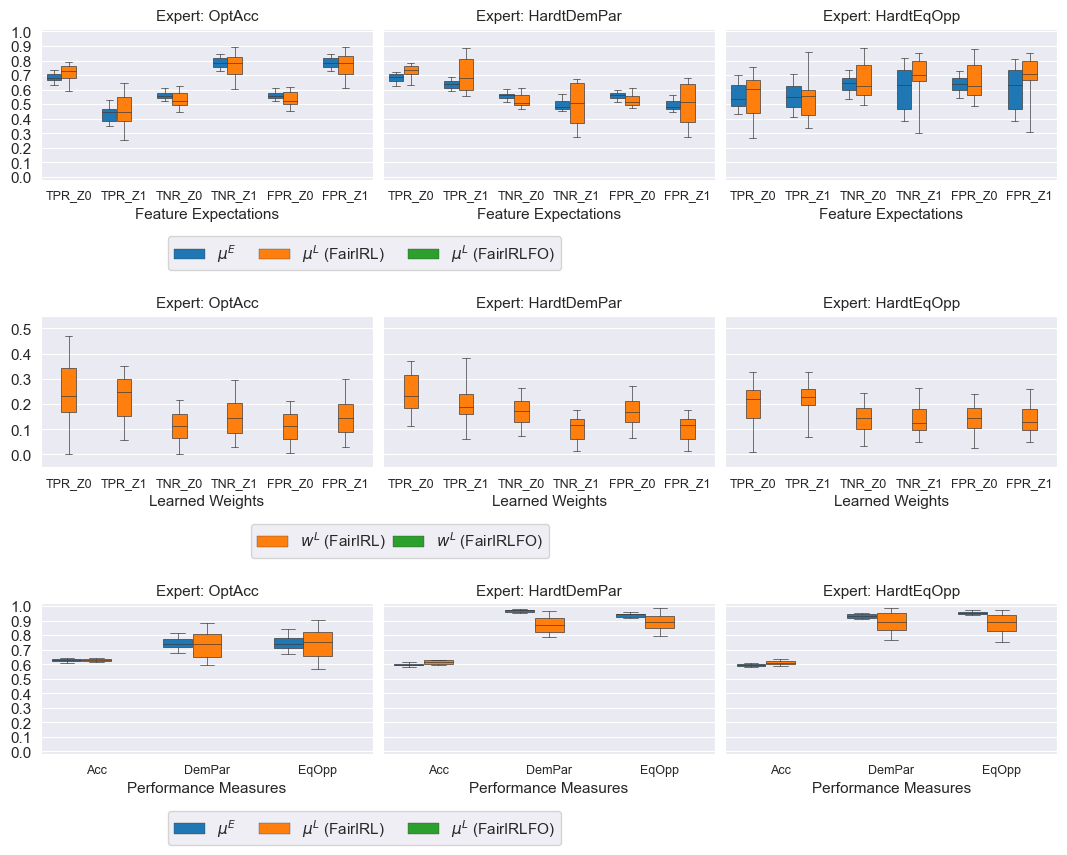

In [604]:
plt.rc('axes', titlesize=11)     # fontsize of the axes title
plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=9)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('figure', titlesize=11)  # fontsize of the figure title

fig, axes, mu_dfs, w_dfs, perf_dfs = plot_results_source_domain_only(
    feat_objective_set_names=base_exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
    perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    expert_algos=[
        'OptAcc',
        'HardtDemPar',
        'HardtEqOpp',
    ],
    dataset=base_exp_info['DATASET'],
    mu_noise_factor=.01,
    perf_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    perf_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
#     min_mu_value=.25,
#     max_mu_value=1,
#     min_w_value=-1,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    perf_yticks=np.linspace(0, 1, 11).round(1),
    mu_ylim=(-.02, 1.02),
    perf_ylim=(-.02, 1.02),
    mu_whis=[1, 99],
    w_yticks = np.linspace(0, .5, 6).round(2),
    w_ylim=(-.05, .55),
    w_whis=[5, 95]
)

# Compare results with target domain

KeyError: 'OBJECTIVE_NAMES'

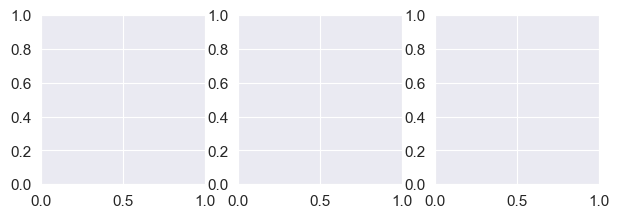

In [746]:
## plt.rc('axes', titlesize=11)     # fontsize of the axes title
plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=10.5)    # legend fontsize
plt.rc('figure', titlesize=11)  # fontsize of the figure title

mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algos=['OptAcc', 'HardtDemPar', 'HardtEqOpp'],
    source_dataset=base_exp_info['DATASET'],
    target_dataset=base_exp_info['TARGET_DATASET'],
    mu_noise_factor=.05,
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
    min_mu_value=.5,
#     mu_yticks=[.6, .7, .8, .9, 1],
    mu_yticks=[.4, .5, .6, .7, .8, .9, 1],
    mu_ylim=(.45, 1.02),
    mu_whis=[5, 95],
)

# Scratch

In [420]:
exp_info = dict(base_exp_info)
exp_info['FEAT_EXP_OBJECTIVE_NAMES'] = [
    'TPR_Z0', 'TPR_Z1',
#     'TNR_Z0', 'TNR_Z1',
    'FPR_Z0', 'FPR_Z1',
#     'FNR_Z0', 'FNR_Z1',
#     'Acc',
#     'DemPar',
#     'EqOpp',
#     'PredPar',
]
exp_info['RESTRICT_Y_ACTION'] = True

X, y, ft = generate_compas_dataset(20_000)
# X, y, ft = generate_adult_dataset(20_000)

# Initiate objectives
objectives = []
for obj_name in exp_info['FEAT_EXP_OBJECTIVE_NAMES']:
    objectives.append(OBJ_LOOKUP_BY_NAME[obj_name]())
feat_obj_set = ObjectiveSet(objectives)
del objectives
# Reset the objective set since they get fitted in each trial run
feat_obj_set.reset()


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
)
del X, y


# Fit a classifier that predicts `y` from `X`.
clf = sklearn_clf_pipeline(
    feature_types=ft,
    clf_inst=RandomForestClassifier(),
)
clf.fit(X_train, y_train)

# Initiate variables needed to run IRL Loop
x_cols = (
    ft['boolean']
    + ft['categoric']
    + ft['continuous']
)
x_cols.remove('z')

# wi = [.2, .3, -.15, -.2]  # .598, .881, .906
# wi = [.195, .22, -.205, -.17]  # .608, .984, .994
wi = [.2, .3, .15, .2]  # .598, .881, .906
# wi = [.9, .02, .02]


reward_weights = { obj.name: wi[j] for j, obj in enumerate(feat_obj_set.objectives) }

test_df = X_test.copy()
test_df['y'] = y_test
# test_df = X_train.copy()
# test_df['y'] = y_train
# test_df['y'] = clf.predict(X_test)

clf_pol = compute_optimal_policy(
    clf_df=test_df,  # NOT the dataset used to train the C_{Y_Z,X} clf
    clf=clf,
    x_cols=x_cols,
    obj_set=feat_obj_set,
    reward_weights=reward_weights,
    skip_error_terms=True,
    method=exp_info['METHOD'],
    min_freq_fill_pct=exp_info['MIN_FREQ_FILL_PCT'],
)

demo = generate_demo(clf_pol, X_train, y_train, can_observe_y=False)
muj = feat_obj_set.compute_demo_feature_exp(demo)
print(f"\t\t muL = {np.round(muj, 3)}")


print('Acc', AccuracyObjective().compute_feat_exp(demo).round(3))
print('DemPar', DemographicParityObjective().compute_feat_exp(demo).round(3))
print('EqOpp', EqualOpportunityObjective().compute_feat_exp(demo).round(3))

display(demo.groupby(['z', 'y'])[['yhat']].agg(['count', 'mean', 'sum']))
display(demo.groupby(['z'])[['yhat']].agg(['count', 'mean', 'sum']))

		 muL = [0.739 0.842 0.5   0.31 ]
Acc 0.594
DemPar 0.866
EqOpp 0.898


yhat                  
    count      mean     sum
z y                        
0 0  4604  0.500434  2304.0
  1  4748  0.739259  3510.0
1 0  2641  0.690269  1823.0
  1  2003  0.841737  1686.0

yhat                  
  count      mean     sum
z                        
0  9352  0.621685  5814.0
1  4644  0.755599  3509.0